# Final Analysis Framework v2.0 - Focused Results Analysis

This analysis framework focuses on understanding the experimental results from the construction invoice processing study, incorporating controlled experimental design considerations and practical system improvement insights.


## Setup


### Requirements Installation and Verification


In [2]:
import subprocess
import sys
import os
from pathlib import Path
import time

def find_requirements_file():
    """Find the requirements_analysis.txt file in expected locations."""
    requirements_paths = [
        Path('./requirements/requirements_analysis.txt'),
        Path('../requirements/requirements_analysis.txt'),
        Path('../../requirements/requirements_analysis.txt'),
        Path('./Deliverables-Code/requirements/requirements_analysis.txt')
    ]
    
    for path in requirements_paths:
        if path.exists():
            return path
    
    return None

def read_requirements_file(requirements_file):
    """Read and parse the requirements file."""
    try:
        with open(requirements_file, 'r') as f:
            requirements_content = f.read().strip().split('\n')
        
        # Filter out comments and empty lines
        requirements_list = [
            req.strip() for req in requirements_content 
            if req.strip() and not req.strip().startswith('#')
        ]
        
        return requirements_list
    except Exception as e:
        print(f"❌ Error reading requirements file: {e}")
        return []

def install_package(requirement, index, total):
    """Install a single package with progress reporting."""
    package_name = requirement.split('>=')[0].split('==')[0].split('[')[0]
    print(f"\n[{index}/{total}] Installing {package_name}...")
    print(f"   Full requirement: {requirement}")
    
    start_time = time.time()
    try:
        result = subprocess.run([
            sys.executable, '-m', 'pip', 'install', requirement, '--timeout', '120'
        ], capture_output=True, text=True, timeout=180)  # 3 minute timeout per package
        
        elapsed_time = time.time() - start_time
        
        if result.returncode == 0:
            print(f"   ✅ {package_name} installed successfully ({elapsed_time:.1f}s)")
            return True, package_name
        else:
            print(f"   ❌ Failed to install {package_name}")
            if result.stderr:
                print(f"   Error: {result.stderr[:200]}...")
            return False, package_name
            
    except subprocess.TimeoutExpired:
        print(f"   ⏰ Timeout installing {package_name} (>3 minutes)")
        return False, package_name
    except Exception as e:
        print(f"   ❌ Exception installing {package_name}: {e}")
        return False, package_name

def install_requirements():
    """Install all requirements from the requirements file."""
    # Find requirements file
    requirements_file = find_requirements_file()
    if not requirements_file:
        print("❌ requirements_analysis.txt not found in any expected location")
        print("Expected locations:")
        for path in [Path('./requirements/requirements_analysis.txt'),
                    Path('../requirements/requirements_analysis.txt'),
                    Path('../../requirements/requirements_analysis.txt'),
                    Path('./Deliverables-Code/requirements/requirements_analysis.txt')]:
            print(f"   - {path}")
        return False
    
    print(f"✓ Found requirements file: {requirements_file}")
    
    # Read requirements
    requirements_list = read_requirements_file(requirements_file)
    if not requirements_list:
        print("❌ No valid requirements found in file")
        return False
    
    print(f"\n📦 Installing {len(requirements_list)} packages from requirements file...")
    print("=" * 60)
    
    # Install each requirement
    failed_packages = []
    successful_packages = []
    
    for i, requirement in enumerate(requirements_list, 1):
        success, package_name = install_package(requirement, i, len(requirements_list))
        if success:
            successful_packages.append(package_name)
        else:
            failed_packages.append(package_name)
    
    # Summary
    print("\n" + "=" * 60)
    print(f"📊 Installation Summary:")
    print(f"   ✅ Successful: {len(successful_packages)}")
    print(f"   ❌ Failed: {len(failed_packages)}")
    
    if successful_packages:
        print(f"\n   Successfully installed: {', '.join(successful_packages[:5])}")
        if len(successful_packages) > 5:
            print(f"   ... and {len(successful_packages) - 5} more")
    
    if failed_packages:
        print(f"\n   ⚠️  Failed packages: {', '.join(failed_packages)}")
        print("   You may need to install these manually or check for dependency conflicts.")
    
    return len(failed_packages) == 0

def check_package_installed(package_name):
    """Check if a package is already installed."""
    try:
        result = subprocess.run([
            sys.executable, '-m', 'pip', 'show', package_name
        ], capture_output=True, text=True)
        return result.returncode == 0
    except:
        return False

def show_pre_installation_status():
    """Show which key packages are already installed."""
    check_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 
                     'scikit-learn', 'statsmodels', 'tqdm', 'pyyaml']
    
    print("🔍 Checking current package status...")
    print("-" * 50)
    
    already_installed = []
    need_installation = []
    
    for package in check_packages:
        if check_package_installed(package):
            print(f"✅ {package:<15} - Already installed")
            already_installed.append(package)
        else:
            print(f"❌ {package:<15} - Needs installation")
            need_installation.append(package)
    
    print(f"\n📊 Status Summary:")
    print(f"   Already installed: {len(already_installed)}")
    print(f"   Need installation: {len(need_installation)}")
    
    if need_installation:
        print(f"   Packages to install: {', '.join(need_installation)}")
    
    return already_installed, need_installation

def verify_imports():
    """Verify that key libraries can be imported."""
    required_libraries = {
        'pandas': 'pd',
        'numpy': 'np', 
        'matplotlib.pyplot': 'plt',
        'seaborn': 'sns',
        'scipy': 'scipy',
        'pathlib': 'pathlib',
        'json': 'json',
        'yaml': 'yaml',
        'sklearn': 'sklearn',
        'statsmodels.api': 'sm'
    }
    
    print("\n🔍 Verifying library imports...")
    print("-" * 40)
    failed_imports = []
    
    for lib, alias in required_libraries.items():
        try:
            __import__(lib)
            print(f"✅ {lib:<20} - OK")
        except ImportError as e:
            print(f"❌ {lib:<20} - FAILED: {str(e)[:50]}...")
            failed_imports.append(lib)
    
    if failed_imports:
        print(f"\n⚠️  Warning: {len(failed_imports)} libraries failed to import")
        print("   Failed libraries:", ', '.join(failed_imports))
        print("   You may need to restart the kernel after installation")
    else:
        print("\n✅ All required libraries verified successfully")
    
    return len(failed_imports) == 0

# Run installation and verification with progress tracking
print("=" * 70)
print("🚀 Analysis Requirements Installation & Verification")
print("=" * 70)

# Show pre-installation status
already_installed, need_installation = show_pre_installation_status()

# Proceed with installation
print(f"\n⏱️  Starting installation process at {time.strftime('%H:%M:%S')}")
start_total = time.time()

installation_success = install_requirements()

total_time = time.time() - start_total
print(f"\n⏱️  Total installation time: {total_time:.1f} seconds")

# Verify installation
verification_success = verify_imports()

print("\n" + "=" * 70)
if installation_success and verification_success:
    print("🎉 Setup complete! Ready to proceed with analysis.")
elif installation_success:
    print("⚠️  Installation complete but some imports failed. You may need to restart the kernel.")
else:
    print("❌ Installation had issues. Please check the error messages above.")
print("=" * 70)

🚀 Analysis Requirements Installation & Verification
🔍 Checking current package status...
--------------------------------------------------
✅ pandas          - Already installed
✅ numpy           - Already installed
✅ matplotlib      - Already installed
✅ seaborn         - Already installed
✅ scipy           - Already installed
✅ scikit-learn    - Already installed
✅ statsmodels     - Already installed
✅ tqdm            - Already installed
✅ pyyaml          - Already installed

📊 Status Summary:
   Already installed: 9
   Need installation: 0

⏱️  Starting installation process at 06:30:28
✓ Found requirements file: ..\requirements\requirements_analysis.txt

📦 Installing 13 packages from requirements file...

[1/13] Installing pandas...
   Full requirement: pandas>=1.5.0
   ✅ pandas installed successfully (3.4s)

[2/13] Installing numpy...
   Full requirement: numpy>=1.21.0
   ✅ numpy installed successfully (1.5s)

[3/13] Installing matplotlib...
   Full requirement: matplotlib>=3.5.0
 

### Root Directory Detection


In [3]:
def find_project_root():
    """
    Find project root by locating directory containing .gitignore and .gitattributes.
    Similar to implementation in 03_pixtral_model.py
    """
    from pathlib import Path
    import sys
    
    try:
        # When running as a script, start from script location
        start_path = Path(__file__).parent
    except NameError:
        # When running in a notebook, start from current working directory
        start_path = Path.cwd()
    
    # Walk up the directory tree to find git markers
    current_path = start_path
    while current_path != current_path.parent:  # Stop at filesystem root
        if (current_path / ".gitignore").exists() and (current_path / ".gitattributes").exists():
            return current_path
        current_path = current_path.parent
    
    raise RuntimeError("Could not find project root (directory containing .gitignore and .gitattributes)")

def setup_project_paths():
    """Set up all project directory paths and verify they exist."""
    global ROOT_DIR, DELIVERABLES_DIR, DATA_DIR, RESULTS_DIR, ANALYSIS_DIR, CONFIG_DIR
    
    # Find and set root directory
    ROOT_DIR = find_project_root()
    print(f"✓ Found project root: {ROOT_DIR}")
    
    # Set up key directories
    DELIVERABLES_DIR = ROOT_DIR / "Deliverables-Code"
    DATA_DIR = DELIVERABLES_DIR / "data"
    RESULTS_DIR = DELIVERABLES_DIR / "results"
    ANALYSIS_DIR = DELIVERABLES_DIR / "analysis"
    CONFIG_DIR = DELIVERABLES_DIR / "config"
    
    # Verify expected directories exist
    required_dirs = {
        "Deliverables-Code": DELIVERABLES_DIR,
        "data": DATA_DIR,
        "results": RESULTS_DIR,
        "analysis": ANALYSIS_DIR,
        "config": CONFIG_DIR
    }
    
    missing_dirs = []
    for name, path in required_dirs.items():
        if path.exists():
            print(f"✓ Found {name} directory: {path}")
        else:
            print(f"⚠ Missing {name} directory: {path}")
            missing_dirs.append(name)
    
    if missing_dirs:
        print(f"\n⚠ Warning: {len(missing_dirs)} required directories not found")
        print("This may indicate the notebook is being run from an unexpected location")
    else:
        print("\n✓ All project directories located successfully")
    
    # Create analysis directory if it doesn't exist
    ANALYSIS_DIR.mkdir(parents=True, exist_ok=True)
    
    # Add project root to Python path for imports
    import sys
    if str(ROOT_DIR) not in sys.path:
        sys.path.append(str(ROOT_DIR))
        print(f"✓ Added project root to Python path")
    
    return ROOT_DIR

def display_project_structure():
    """Display relevant project structure for reference."""
    print("\n=== Project Structure (Key Directories) ===")
    print(f"ROOT_DIR:         {ROOT_DIR}")
    print(f"DELIVERABLES_DIR: {DELIVERABLES_DIR}")
    print(f"DATA_DIR:         {DATA_DIR}")
    print(f"RESULTS_DIR:      {RESULTS_DIR}")
    print(f"ANALYSIS_DIR:     {ANALYSIS_DIR}")
    print(f"CONFIG_DIR:       {CONFIG_DIR}")
    
    # Show counts of files in key directories
    if RESULTS_DIR.exists():
        result_files = list(RESULTS_DIR.glob("*.json"))
        print(f"\nResult files found: {len(result_files)}")
        
    if ANALYSIS_DIR.exists():
        analysis_files = list(ANALYSIS_DIR.glob("*.json"))
        print(f"Analysis files found: {len(analysis_files)}")
        
    if (DATA_DIR / "images" / "metadata").exists():
        metadata_files = list((DATA_DIR / "images" / "metadata").glob("*.csv"))
        print(f"Metadata files found: {len(metadata_files)}")

# Run root directory detection and path setup
print("=== Root Directory Detection & Path Setup ===")
project_root = setup_project_paths()
display_project_structure()

print(f"\n🎯 Ready to proceed with analysis from: {ROOT_DIR.name}")

=== Root Directory Detection & Path Setup ===
✓ Found project root: d:\UCSD_MJM
✓ Found Deliverables-Code directory: d:\UCSD_MJM\Deliverables-Code
✓ Found data directory: d:\UCSD_MJM\Deliverables-Code\data
✓ Found results directory: d:\UCSD_MJM\Deliverables-Code\results
✓ Found analysis directory: d:\UCSD_MJM\Deliverables-Code\analysis
✓ Found config directory: d:\UCSD_MJM\Deliverables-Code\config

✓ All project directories located successfully
✓ Added project root to Python path

=== Project Structure (Key Directories) ===
ROOT_DIR:         d:\UCSD_MJM
DELIVERABLES_DIR: d:\UCSD_MJM\Deliverables-Code
DATA_DIR:         d:\UCSD_MJM\Deliverables-Code\data
RESULTS_DIR:      d:\UCSD_MJM\Deliverables-Code\results
ANALYSIS_DIR:     d:\UCSD_MJM\Deliverables-Code\analysis
CONFIG_DIR:       d:\UCSD_MJM\Deliverables-Code\config

Result files found: 15
Analysis files found: 15
Metadata files found: 2

🎯 Ready to proceed with analysis from: UCSD_MJM


### Import Libraries


In [4]:
# Import standard libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, kruskal
import json
import yaml
from pathlib import Path
import warnings
from datetime import datetime
from typing import Dict, List, Tuple, Any, Optional
import re
from collections import defaultdict, Counter
import itertools

# Statistical and machine learning utilities
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Progress tracking
from tqdm import tqdm

# Configure plotting parameters and styles
plt.style.use('default')  # Start with clean default style

# Set up matplotlib and seaborn styling
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'figure.dpi': 100,
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.title_fontsize': 11,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'lines.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Custom color palette for consistent visualization
ANALYSIS_COLORS = {
    'LMM': '#2E86AB',        # Blue for LMM models
    'OCR': '#A23B72',        # Purple for OCR models
    'Pixtral': '#2E86AB',    # Blue for Pixtral
    'Llama': '#00A6D6',      # Light blue for Llama
    'DocTR': '#A23B72',      # Purple for DocTR
    'accuracy': '#28A745',    # Green for accuracy metrics
    'cer': '#DC3545',        # Red for error metrics
    'work_order': '#FD7E14',  # Orange for work order
    'total_cost': '#6F42C1',  # Purple for total cost
    'baseline': '#6C757D',    # Gray for baseline/reference
    'improvement': '#20C997'   # Teal for improvements
}

# Configure warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Display configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✓ All libraries imported successfully")
print("✓ Plotting parameters configured")
print("✓ Custom color palette defined")
print("✓ Analysis environment ready")

# Show available color palette
print(f"\n📊 Available analysis colors: {list(ANALYSIS_COLORS.keys())}")
print("🎨 Visualization settings optimized for analysis reports")

✓ All libraries imported successfully
✓ Plotting parameters configured
✓ Custom color palette defined
✓ Analysis environment ready

📊 Available analysis colors: ['LMM', 'OCR', 'Pixtral', 'Llama', 'DocTR', 'accuracy', 'cer', 'work_order', 'total_cost', 'baseline', 'improvement']
🎨 Visualization settings optimized for analysis reports


### Data Loading Functions


In [5]:
def load_ground_truth_data(ground_truth_file: str = None) -> pd.DataFrame:
    """Load and validate ground truth CSV data."""
    # Set default ground truth file path using ROOT_DIR
    if ground_truth_file is None:
        ground_truth_file = DATA_DIR / "images" / "metadata" / "ground_truth.csv"
    else:
        ground_truth_file = Path(ground_truth_file)
    
    if not ground_truth_file.exists():
        raise FileNotFoundError(f"Ground truth file not found: {ground_truth_file}")
    
    try:
        # Load with explicit string type for filename column to ensure consistent matching
        ground_truth = pd.read_csv(ground_truth_file, dtype={'filename': str})
        
        # Validate required columns
        required_columns = {'filename', 'work_order_number', 'total'}
        missing_columns = required_columns - set(ground_truth.columns)
        if missing_columns:
            raise ValueError(f"Missing required columns in ground truth: {missing_columns}")
        
        # Clean and validate data
        ground_truth['filename'] = ground_truth['filename'].str.strip()
        ground_truth['work_order_number'] = ground_truth['work_order_number'].astype(str).str.strip()
        
        print(f"INFO: Loaded ground truth data: {len(ground_truth)} records")
        return ground_truth
        
    except Exception as e:
        print(f"ERROR: Error loading ground truth data: {e}")
        raise

def discover_results_files() -> Dict[str, List[Path]]:
    """Discover all results files organized by model type."""
    print("INFO: Discovering results files")
    
    results_files = {
        'pixtral': [],
        'llama': [],
        'doctr': [],
        'all': []
    }
    
    # Get all results JSON files
    all_files = list(RESULTS_DIR.glob("results-*.json"))
    
    for file in all_files:
        results_files['all'].append(file)
        
        # Categorize by model type based on filename pattern
        if 'pixtral' in file.name:
            results_files['pixtral'].append(file)
        elif 'llama' in file.name:
            results_files['llama'].append(file)
        elif 'doctr' in file.name:
            results_files['doctr'].append(file)
    
    # Sort files by modification time (newest first)
    for model_type in results_files:
        results_files[model_type].sort(key=lambda x: x.stat().st_mtime, reverse=True)
    
    print(f"INFO: Found {len(results_files['all'])} total results files")
    for model_type, files in results_files.items():
        if model_type != 'all' and files:
            print(f"INFO:   {model_type}: {len(files)} files")
    
    return results_files

def discover_analysis_files() -> Dict[str, List[Path]]:
    """Discover all analysis files organized by model type."""
    print("INFO: Discovering analysis files")
    
    analysis_files = {
        'pixtral': [],
        'llama': [],
        'doctr': [],
        'all': []
    }
    
    # Get all analysis JSON files
    all_files = list(ANALYSIS_DIR.glob("analysis-*.json"))
    
    for file in all_files:
        analysis_files['all'].append(file)
        
        # Categorize by model type based on filename pattern
        if 'pixtral' in file.name:
            analysis_files['pixtral'].append(file)
        elif 'llama' in file.name:
            analysis_files['llama'].append(file)
        elif 'doctr' in file.name:
            analysis_files['doctr'].append(file)
    
    # Sort files by modification time (newest first)
    for model_type in analysis_files:
        analysis_files[model_type].sort(key=lambda x: x.stat().st_mtime, reverse=True)
    
    print(f"INFO: Found {len(analysis_files['all'])} total analysis files")
    for model_type, files in analysis_files.items():
        if model_type != 'all' and files:
            print(f"INFO:   {model_type}: {len(files)} files")
    
    return analysis_files

def load_results_file(file_path: Path) -> Dict[str, Any]:
    """Load and validate a results JSON file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Validate structure
        required_keys = {'metadata', 'results'}
        missing_keys = required_keys - set(data.keys())
        if missing_keys:
            raise ValueError(f"Missing required keys in results file: {missing_keys}")
        
        # Add file metadata
        data['file_info'] = {
            'filename': file_path.name,
            'file_path': str(file_path),
            'file_size_mb': round(file_path.stat().st_size / (1024*1024), 2),
            'modification_time': datetime.fromtimestamp(file_path.stat().st_mtime).isoformat()
        }
        
        return data
        
    except Exception as e:
        print(f"ERROR: Error loading results file {file_path}: {e}")
        raise

def load_analysis_file(file_path: Path) -> Dict[str, Any]:
    """Load and validate an analysis JSON file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Validate structure
        required_keys = {'metadata', 'summary', 'extracted_data'}
        missing_keys = required_keys - set(data.keys())
        if missing_keys:
            raise ValueError(f"Missing required keys in analysis file: {missing_keys}")
        
        # Add file metadata
        data['file_info'] = {
            'filename': file_path.name,
            'file_path': str(file_path),
            'file_size_mb': round(file_path.stat().st_size / (1024*1024), 2),
            'modification_time': datetime.fromtimestamp(file_path.stat().st_mtime).isoformat()
        }
        
        return data
        
    except Exception as e:
        print(f"ERROR: Error loading analysis file {file_path}: {e}")
        raise

def load_all_results(model_types: List[str] = None) -> Dict[str, List[Dict]]:
    """Load all results files for specified model types."""
    print("INFO: Loading all results files")
    
    if model_types is None:
        model_types = ['pixtral', 'llama', 'doctr']
    
    results_files = discover_results_files()
    all_results = {}
    
    for model_type in model_types:
        if model_type in results_files:
            all_results[model_type] = []
            for file_path in results_files[model_type]:
                try:
                    result_data = load_results_file(file_path)
                    all_results[model_type].append(result_data)
                except Exception as e:
                    print(f"WARNING: Skipping corrupted results file {file_path}: {e}")
    
    total_loaded = sum(len(results) for results in all_results.values())
    print(f"INFO: Loaded {total_loaded} results files across {len(all_results)} model types")
    
    return all_results

def load_all_analysis(model_types: List[str] = None) -> Dict[str, List[Dict]]:
    """Load all analysis files for specified model types."""
    print("INFO: Loading all analysis files")
    
    if model_types is None:
        model_types = ['pixtral', 'llama', 'doctr']
    
    analysis_files = discover_analysis_files()
    all_analysis = {}
    
    for model_type in model_types:
        if model_type in analysis_files:
            all_analysis[model_type] = []
            for file_path in analysis_files[model_type]:
                try:
                    analysis_data = load_analysis_file(file_path)
                    all_analysis[model_type].append(analysis_data)
                except Exception as e:
                    print(f"WARNING: Skipping corrupted analysis file {file_path}: {e}")
    
    total_loaded = sum(len(analyses) for analyses in all_analysis.values())
    print(f"INFO: Loaded {total_loaded} analysis files across {len(all_analysis)} model types")
    
    return all_analysis

def select_files_interactive(file_type: str = "results") -> List[Path]:
    """Interactive file selection for analysis."""
    if file_type == "results":
        files_dict = discover_results_files()
        title = "Available Results Files"
    elif file_type == "analysis":
        files_dict = discover_analysis_files()
        title = "Available Analysis Files"
    else:
        raise ValueError("file_type must be 'results' or 'analysis'")
    
    all_files = files_dict['all']
    if not all_files:
        print(f"No {file_type} files found.")
        return []
    
    print(f"\n{title}:")
    print("-" * 50)
    for i, file_path in enumerate(all_files, 1):
        # Extract model info from filename
        model_info = ""
        if 'pixtral' in file_path.name:
            model_info = " [Pixtral]"
        elif 'llama' in file_path.name:
            model_info = " [Llama]"
        elif 'doctr' in file_path.name:
            model_info = " [DocTR]"
        
        # Get file modification time
        mod_time = datetime.fromtimestamp(file_path.stat().st_mtime)
        print(f"{i:2d}. {file_path.name}{model_info}")
        print(f"     Modified: {mod_time.strftime('%Y-%m-%d %H:%M:%S')}")
    
    print(f"\n{len(all_files) + 1}. Load all files")
    
    while True:
        try:
            choice = input(f"\nSelect files (comma-separated numbers, or {len(all_files) + 1} for all): ")
            
            if choice.strip() == str(len(all_files) + 1):
                return all_files
            
            # Parse comma-separated choices
            choices = [int(x.strip()) for x in choice.split(',')]
            selected_files = []
            
            for choice_num in choices:
                if 1 <= choice_num <= len(all_files):
                    selected_files.append(all_files[choice_num - 1])
                else:
                    print(f"Invalid choice: {choice_num}")
                    continue
            
            if selected_files:
                print(f"\nSelected {len(selected_files)} file(s):")
                for file_path in selected_files:
                    print(f"  - {file_path.name}")
                return selected_files
            else:
                print("No valid files selected.")
                
        except ValueError:
            print("Please enter valid numbers separated by commas.")

def create_comprehensive_dataset() -> Dict[str, Any]:
    """Create a comprehensive dataset combining all available data."""
    print("INFO: Creating comprehensive dataset")
    
    # Load ground truth
    ground_truth = load_ground_truth_data()
    
    # Load all analysis files (which contain the processed results)
    all_analysis = load_all_analysis()
    
    # Create comprehensive dataset structure
    dataset = {
        'ground_truth': ground_truth,
        'model_data': {},
        'metadata': {
            'created_timestamp': datetime.now().isoformat(),
            'total_models': 0,
            'total_experiments': 0,
            'data_sources': {
                'ground_truth_file': str(DATA_DIR / "images" / "metadata" / "ground_truth.csv"),
                'results_directory': str(RESULTS_DIR),
                'analysis_directory': str(ANALYSIS_DIR)
            }
        }
    }
    
    total_experiments = 0
    for model_type, analyses in all_analysis.items():
        if analyses:
            dataset['model_data'][model_type] = analyses
            total_experiments += len(analyses)
            print(f"INFO: Added {len(analyses)} experiments for {model_type}")
    
    dataset['metadata']['total_models'] = len(dataset['model_data'])
    dataset['metadata']['total_experiments'] = total_experiments
    
    print(f"INFO: Comprehensive dataset created with {dataset['metadata']['total_models']} models and {total_experiments} experiments")
    
    return dataset

# Initialize data loading and create comprehensive dataset
print("ℹ️  Initializing data loading functions")

# Verify data directories exist
required_dirs = [RESULTS_DIR, ANALYSIS_DIR, DATA_DIR / "images" / "metadata"]
for dir_path in required_dirs:
    if not dir_path.exists():
        print(f"WARNING: Creating missing directory: {dir_path}")
        dir_path.mkdir(parents=True, exist_ok=True)

# Discover available data files
available_results = discover_results_files()
available_analysis = discover_analysis_files()

# Load ground truth data
try:
    GROUND_TRUTH_DATA = load_ground_truth_data()
    print(f"✅ Ground truth loaded: {len(GROUND_TRUTH_DATA)} records")
except Exception as e:
    print(f"WARNING: Could not load ground truth data: {e}")
    GROUND_TRUTH_DATA = None

# Create comprehensive dataset for analysis
try:
    COMPREHENSIVE_DATASET = create_comprehensive_dataset()
    print("✅ Comprehensive dataset created successfully")
except Exception as e:
    print(f"WARNING: Could not create comprehensive dataset: {e}")
    COMPREHENSIVE_DATASET = None

# Display summary of available data
print("\n📊 Data Loading Summary:")
print(f"   • Ground truth records: {len(GROUND_TRUTH_DATA) if GROUND_TRUTH_DATA is not None else 'Not available'}")
print(f"   • Results files found: {len(available_results['all'])}")
print(f"   • Analysis files found: {len(available_analysis['all'])}")

if available_results['all']:
    print("\n   Results by model type:")
    for model_type, files in available_results.items():
        if model_type != 'all' and files:
            print(f"     - {model_type.title()}: {len(files)} files")

if available_analysis['all']:
    print("\n   Analysis by model type:")
    for model_type, files in available_analysis.items():
        if model_type != 'all' and files:
            print(f"     - {model_type.title()}: {len(files)} files")

print("\n✅ Data loading functions ready for analysis")

ℹ️  Initializing data loading functions
INFO: Discovering results files
INFO: Found 15 total results files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Discovering analysis files
INFO: Found 15 total analysis files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Loaded ground truth data: 549 records
✅ Ground truth loaded: 549 records
INFO: Creating comprehensive dataset
INFO: Loaded ground truth data: 549 records
INFO: Loading all analysis files
INFO: Discovering analysis files
INFO: Found 15 total analysis files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Loaded 15 analysis files across 3 model types
INFO: Added 4 experiments for pixtral
INFO: Added 4 experiments for llama
INFO: Added 7 experiments for doctr
INFO: Comprehensive dataset created with 3 models and 15 experiments
✅ Comprehensive dataset created successfully

📊 Data Loading Summary:
   • Ground truth records: 549
   • Results file

## Section 1: Executive Summary


### Experimental Design & Controlled Variables

*Placeholder for discussion of controlled experimental design, image quality control, content standardization, and design rationale.*


### Cell 1.1: Project Context & Key Findings


🎯 PRIMARY PERFORMANCE COMPARISON SUMMARY
Large Multimodal Models (LMM):     76.8%
Optical Character Recognition:     43.4%
Performance Difference:            +33.3%

Individual Model Breakdown:
  Pixtral    (LMM): 75.8%
  Llama      (LMM): 77.8%
  Doctr      (OCR): 43.4%

Models meeting 85% threshold: 0/2


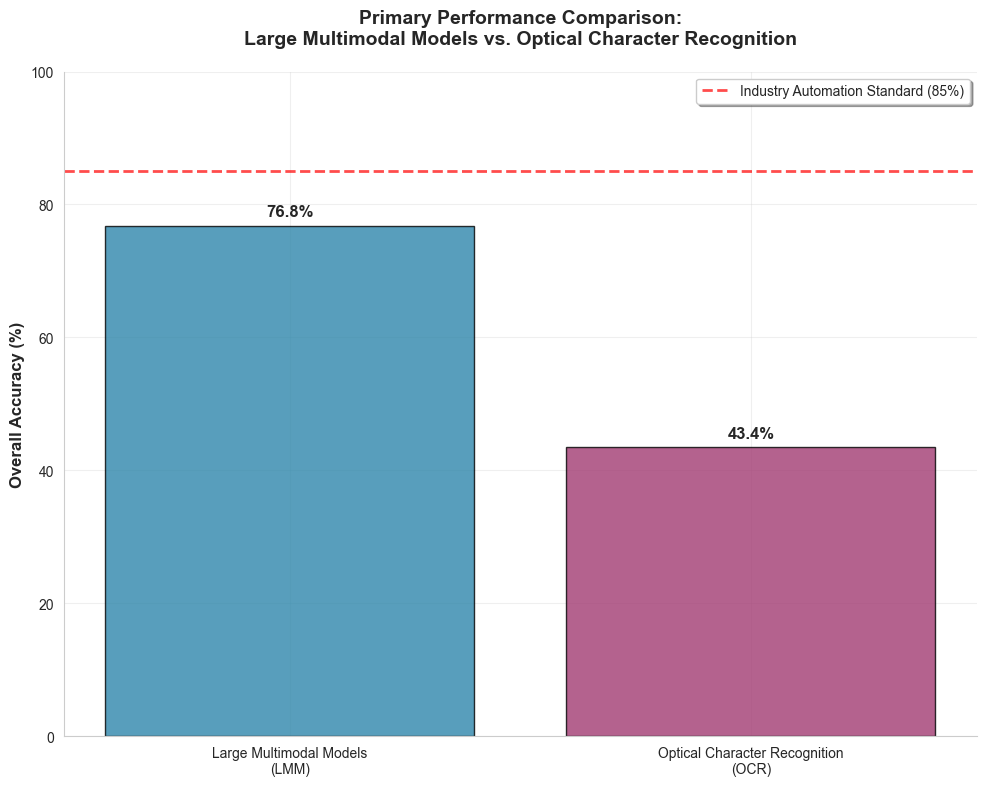

In [6]:
# Create Primary Performance Comparison Bar Chart
# Side-by-side comparison of total accuracy for all LMM trials vs all OCR trials
# Roll up across all prompts and queries

def calculate_model_accuracies(comprehensive_dataset):
    """Calculate rolled-up accuracy for each model across all experiments."""
    model_accuracies = {}
    
    # Process each model type
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        accuracies = []
        
        for experiment in experiments:
            if 'summary' in experiment:
                summary = experiment['summary']
                
                # The analysis files store accuracy directly in summary
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    accuracies.append(summary['work_order_accuracy'])
                    accuracies.append(summary['total_cost_accuracy'])
        
        # Calculate mean accuracy for this model
        if accuracies:
            model_accuracies[model_type] = np.mean(accuracies)
        else:
            model_accuracies[model_type] = 0.0
    
    return model_accuracies

def create_primary_performance_comparison():
    """Create the primary performance comparison bar chart."""
    
    # Calculate individual model accuracies
    model_accuracies = calculate_model_accuracies(COMPREHENSIVE_DATASET)
    
    # Categorize models into LMM vs OCR
    lmm_models = ['pixtral', 'llama']
    ocr_models = ['doctr']
    
    # Calculate category averages
    lmm_accuracies = [model_accuracies.get(model, 0) for model in lmm_models if model in model_accuracies and model_accuracies[model] > 0]
    ocr_accuracies = [model_accuracies.get(model, 0) for model in ocr_models if model in model_accuracies and model_accuracies[model] > 0]
    
    # Calculate rolled-up averages
    avg_lmm_accuracy = np.mean(lmm_accuracies) if lmm_accuracies else 0
    avg_ocr_accuracy = np.mean(ocr_accuracies) if ocr_accuracies else 0
    
    # Prepare data for plotting
    categories = ['Large Multimodal Models\n(LMM)', 'Optical Character Recognition\n(OCR)']
    accuracies = [avg_lmm_accuracy * 100, avg_ocr_accuracy * 100]  # Convert to percentage
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define colors for categories
    colors = [ANALYSIS_COLORS['LMM'], ANALYSIS_COLORS['OCR']]
    
    # Create bars
    bars = ax.bar(categories, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add the 85% industry standard reference line
    ax.axhline(y=85, color='red', linestyle='--', linewidth=2, alpha=0.7, 
               label='Industry Automation Standard (85%)')
    
    # Customize the chart
    ax.set_ylabel('Overall Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title('Primary Performance Comparison:\nLarge Multimodal Models vs. Optical Character Recognition', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_ylim(0, 100)
    
    # Add value labels on top of bars
    for bar, accuracy in zip(bars, accuracies):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{accuracy:.1f}%', ha='center', va='bottom', 
                fontsize=12, fontweight='bold')
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)
    
    # Add legend
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    # Style the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Display summary statistics
    print("🎯 PRIMARY PERFORMANCE COMPARISON SUMMARY")
    print("=" * 50)
    print(f"Large Multimodal Models (LMM):     {avg_lmm_accuracy*100:.1f}%")
    print(f"Optical Character Recognition:     {avg_ocr_accuracy*100:.1f}%")
    print(f"Performance Difference:            {(avg_lmm_accuracy - avg_ocr_accuracy)*100:+.1f}%")
    print()
    print("Individual Model Breakdown:")
    for model, accuracy in model_accuracies.items():
        category = "LMM" if model in lmm_models else "OCR"
        print(f"  {model.title():<10} ({category}): {accuracy*100:.1f}%")
    print()
    print(f"Models meeting 85% threshold: {sum(1 for acc in accuracies if acc >= 85)}/2")
    
    return fig, model_accuracies

# Execute the analysis
if COMPREHENSIVE_DATASET is not None:
    fig, model_accuracies = create_primary_performance_comparison()
    plt.show()
else:
    print("❌ Cannot create chart: Comprehensive dataset not available")

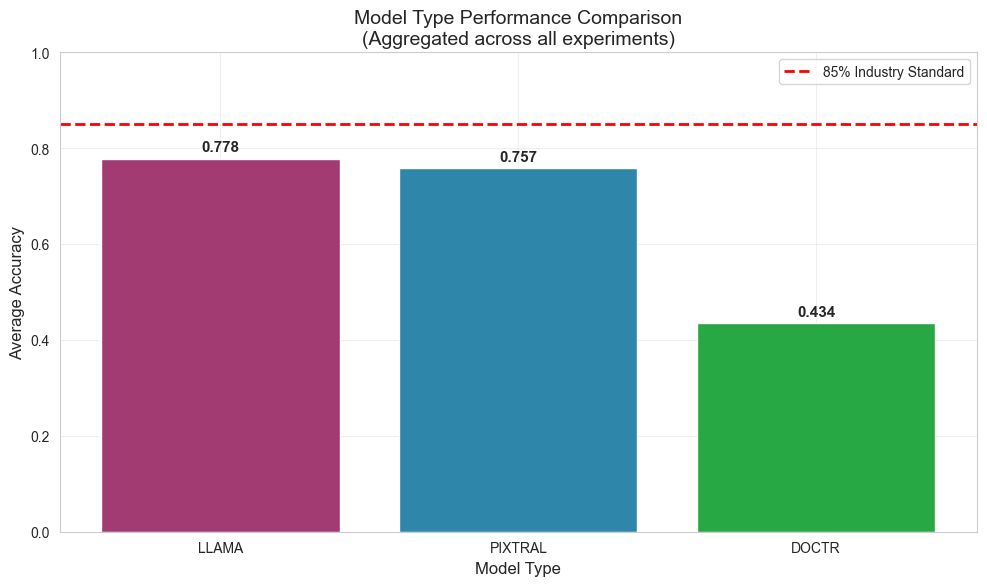

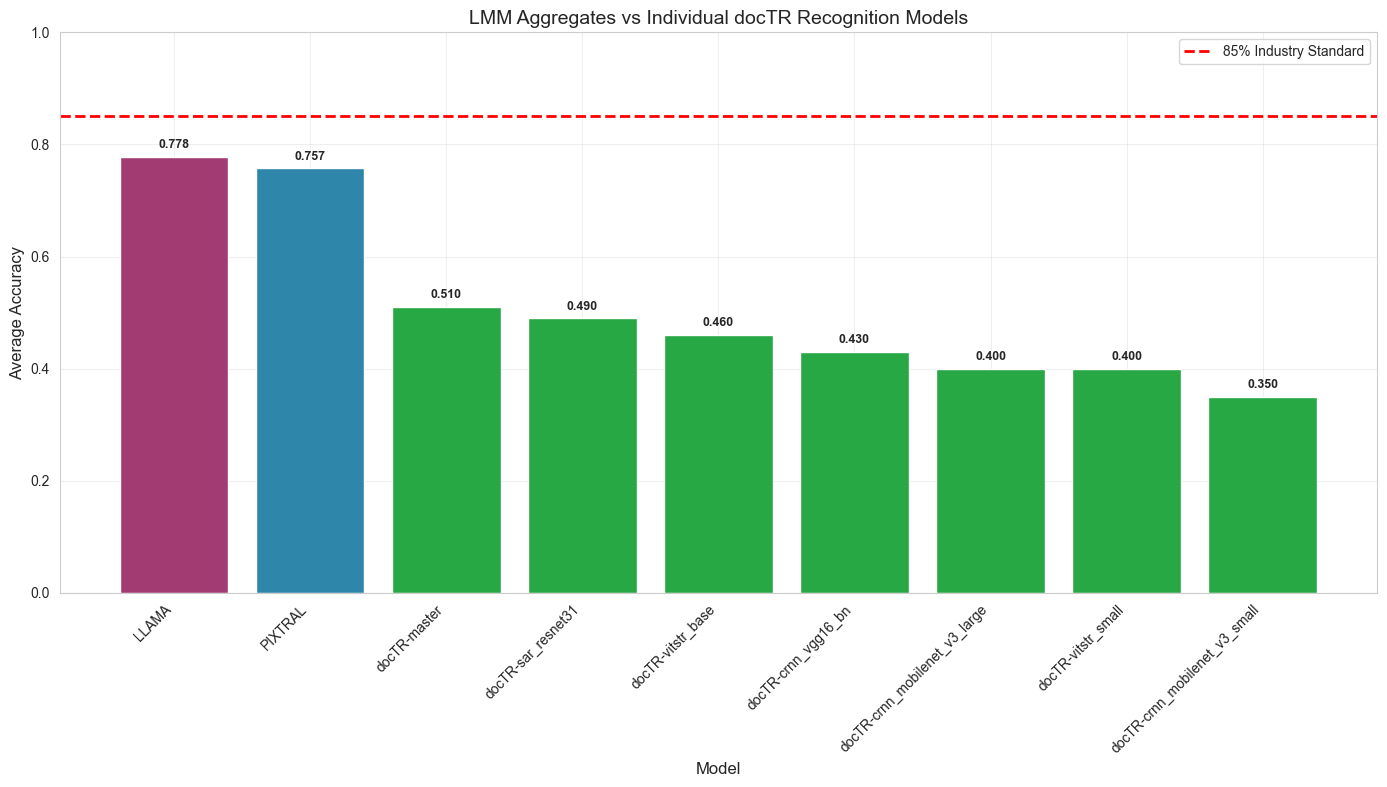

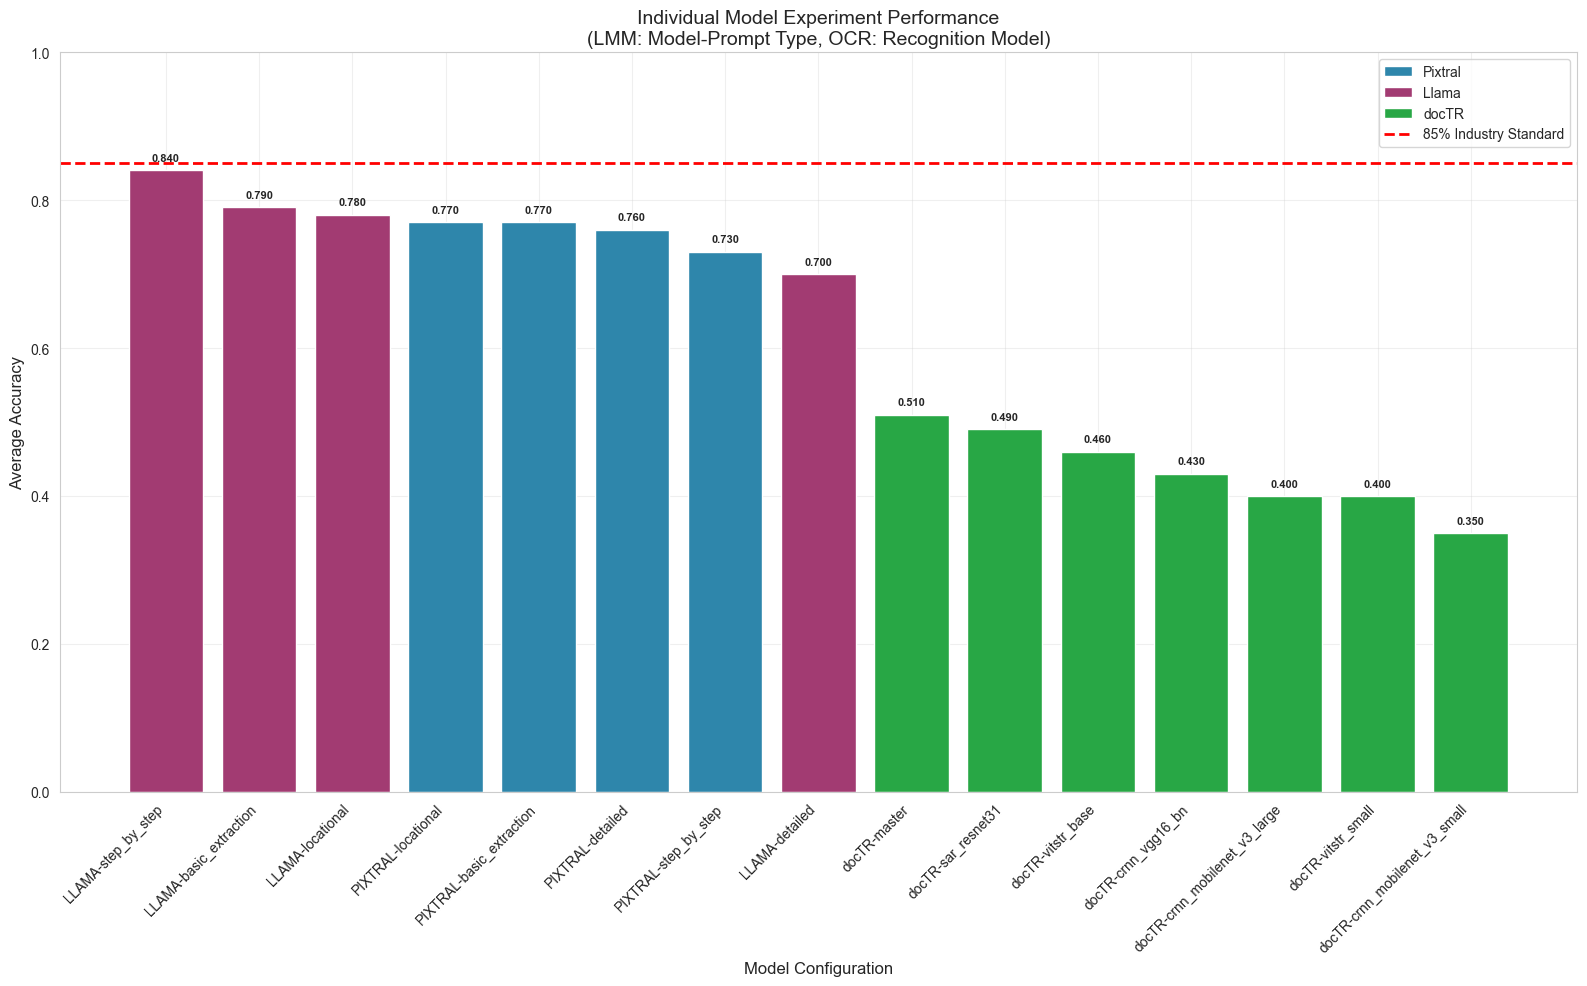

In [7]:
# Create Model Type Breakdown Bar Chart
# Break down into model types within each category
# (LMM-Pixtral, LMM-Llama, OCR with all 7 recognition models)
# Group by category and order by performance

def get_model_aggregate_performances(comprehensive_dataset):
    """Get aggregate performance for each model type."""
    model_aggregates = {}
    
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        accuracies = []
        
        for experiment in experiments:
            if 'summary' in experiment:
                summary = experiment['summary']
                
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    accuracies.append(avg_accuracy)
        
        if accuracies:
            model_aggregates[model_type] = np.mean(accuracies)
    
    return model_aggregates

def get_lmm_vs_doctr_recognition_performances(comprehensive_dataset):
    """Get LMM aggregate vs individual doctr recognition model performances."""
    performances = {}
    
    # Get LMM aggregates
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        if model_type in ['pixtral', 'llama']:
            accuracies = []
            for experiment in experiments:
                if 'summary' in experiment:
                    summary = experiment['summary']
                    if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        accuracies.append(avg_accuracy)
            
            if accuracies:
                performances[model_type.upper()] = np.mean(accuracies)
    
    # Get individual doctr recognition models
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        if model_type == 'doctr':
            for experiment in experiments:
                if 'summary' in experiment and 'metadata' in experiment:
                    summary = experiment['summary']
                    metadata = experiment['metadata']
                    
                    if ('work_order_accuracy' in summary and 'total_cost_accuracy' in summary and
                        'model_info' in metadata and 'model_id' in metadata['model_info']):
                        
                        recognition_model = metadata['model_info']['model_id']['recognition_model']
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        performances[f"docTR-{recognition_model}"] = avg_accuracy
    
    return performances

def get_individual_model_performances(comprehensive_dataset):
    """Get individual performance for each model experiment."""
    individual_performances = []
    
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for i, experiment in enumerate(experiments, 1):
            if 'summary' in experiment:
                summary = experiment['summary']
                
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    
                    # Create label based on model type
                    if model_type == 'doctr':
                        if 'metadata' in experiment and 'model_info' in experiment['metadata']:
                            recognition_model = experiment['metadata']['model_info']['model_id']['recognition_model']
                            label = f"docTR-{recognition_model}"
                        else:
                            label = f"docTR-{i}"
                    else:
                        # For LMM models, get prompt type from metadata
                        if 'metadata' in experiment and 'prompt_info' in experiment['metadata']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                            label = f"{model_type.upper()}-{prompt_type}"
                        else:
                            label = f"{model_type.upper()}-{i}"
                    
                    individual_performances.append({
                        'model': label,
                        'accuracy': avg_accuracy,
                        'model_type': model_type
                    })
    
    return individual_performances

# Execute the analysis only if dataset is available
if COMPREHENSIVE_DATASET is not None:
    # Chart 1: Model Type Aggregates (Pixtral, Llama, docTR)
    model_aggregates = get_model_aggregate_performances(COMPREHENSIVE_DATASET)
    
    # Sort by accuracy in descending order
    sorted_aggregates = sorted(model_aggregates.items(), key=lambda x: x[1], reverse=True)
    sorted_names = [item[0] for item in sorted_aggregates]
    sorted_values = [item[1] for item in sorted_aggregates]
    
    # Assign colors based on model type
    color_map = {'pixtral': '#2E86AB', 'llama': '#A23B72', 'doctr': '#28A745'}
    sorted_colors = [color_map[name] for name in sorted_names]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(sorted_values)), sorted_values, color=sorted_colors)

    plt.xlabel('Model Type')
    plt.ylabel('Average Accuracy')
    plt.title('Model Type Performance Comparison\n(Aggregated across all experiments)')
    plt.xticks(range(len(sorted_names)), [name.upper() for name in sorted_names])
    plt.ylim(0, 1)

    # Add 85% reference line
    plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='85% Industry Standard')

    # Add value labels on bars
    for bar, value in zip(bars, sorted_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Chart 2: LMM Aggregates vs Individual docTR Recognition Models
    lmm_vs_doctr = get_lmm_vs_doctr_recognition_performances(COMPREHENSIVE_DATASET)
    
    # Sort by accuracy in descending order
    sorted_lmm_doctr = sorted(lmm_vs_doctr.items(), key=lambda x: x[1], reverse=True)
    categories = [item[0] for item in sorted_lmm_doctr]
    values = [item[1] for item in sorted_lmm_doctr]
    
    # Assign colors based on model type
    colors = []
    for model in categories:
        if 'docTR' in model:
            colors.append('#28A745')  # Green for docTR
        elif 'PIXTRAL' in model:
            colors.append('#2E86AB')  # Blue for Pixtral
        else:  # LLAMA
            colors.append('#A23B72')  # Purple for Llama

    plt.figure(figsize=(14, 8))
    bars = plt.bar(range(len(categories)), values, color=colors)

    plt.xlabel('Model')
    plt.ylabel('Average Accuracy')
    plt.title('LMM Aggregates vs Individual docTR Recognition Models')
    plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add 85% reference line
    plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='85% Industry Standard')

    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Chart 3: Individual Model Experiments
    individual_performances = get_individual_model_performances(COMPREHENSIVE_DATASET)

    # Sort by accuracy in descending order
    individual_performances.sort(key=lambda x: x['accuracy'], reverse=True)

    plt.figure(figsize=(16, 10))
    models = [p['model'] for p in individual_performances]
    accuracies = [p['accuracy'] for p in individual_performances]
    
    # Color by specific model type (pixtral, llama, doctr)
    color_map = {'pixtral': '#2E86AB', 'llama': '#A23B72', 'doctr': '#28A745'}
    colors = [color_map[p['model_type']] for p in individual_performances]

    bars = plt.bar(range(len(models)), accuracies, color=colors)

    plt.xlabel('Model Configuration')
    plt.ylabel('Average Accuracy')
    plt.title('Individual Model Experiment Performance\n(LMM: Model-Prompt Type, OCR: Recognition Model)')
    plt.xticks(range(len(models)), models, rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add 85% reference line
    plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='85% Industry Standard')

    # Add value labels on bars
    for bar, value in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#2E86AB', label='Pixtral'),
                       Patch(facecolor='#A23B72', label='Llama'),
                       Patch(facecolor='#28A745', label='docTR'),
                       plt.Line2D([0], [0], color='red', linestyle='--', label='85% Industry Standard')]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Cannot create charts: Comprehensive dataset not available")

*Placeholder for key findings discussion and business case establishment.*


## Section 2: Cross-Model Performance Comparison


### Cell 2.1: Comprehensive Model Performance Analysis


🔍 Creating LMM Models vs Prompts Accuracy Heatmap...


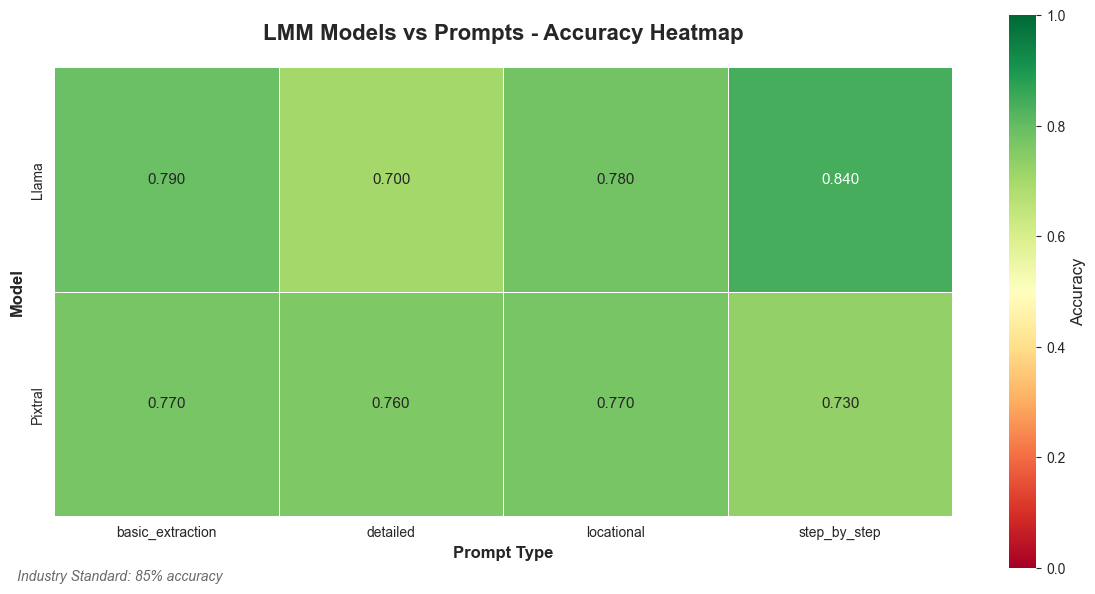


📊 LMM Models vs Prompts Accuracy Summary:

Llama:
  Best prompt: step_by_step (0.840)
  Worst prompt: detailed (0.700)
  Average: 0.777
  Range: 0.140

Pixtral:
  Best prompt: basic_extraction (0.770)
  Worst prompt: step_by_step (0.730)
  Average: 0.757
  Range: 0.040

📈 Overall Statistics:
  Best combination: ('Llama', 'step_by_step') (0.840)
  Worst combination: ('Llama', 'detailed') (0.700)
  Average across all: 0.768
  Above 85% standard: 0/8 combinations


In [8]:
# Create LMM Models vs Prompts Heatmap (Accuracy)
# Pixtral/Llama (rows) × Prompt types (columns) with accuracy values

def create_lmm_prompt_heatmap_data(comprehensive_dataset):
    """Create data structure for LMM Models vs Prompts heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type from metadata - corrected location
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Calculate average accuracy
                    summary = experiment['summary']
                    if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        
                        # Store in heatmap structure
                        model_name = model_type.title()
                        if model_name not in heatmap_data:
                            heatmap_data[model_name] = {}
                        
                        if prompt_type:
                            heatmap_data[model_name][prompt_type] = avg_accuracy
    
    return heatmap_data

def plot_lmm_prompt_accuracy_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Models vs Prompts accuracy."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for model, prompts in heatmap_data.items():
        for prompt, accuracy in prompts.items():
            df_data.append({
                'Model': model,
                'Prompt': prompt,
                'Accuracy': accuracy
            })
    
    if not df_data:
        print("No data available for LMM Models vs Prompts heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap
    pivot_df = df.pivot(index='Model', columns='Prompt', values='Accuracy')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with custom colormap
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.5,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Accuracy'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Models vs Prompts - Accuracy Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Model', fontsize=12, fontweight='bold')
    
    # Add 85% reference line annotation
    plt.figtext(0.02, 0.02, 'Industry Standard: 85% accuracy', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Models vs Prompts Accuracy Summary:")
    print("=" * 50)
    
    for model in pivot_df.index:
        print(f"\n{model}:")
        model_data = pivot_df.loc[model].dropna()
        if not model_data.empty:
            print(f"  Best prompt: {model_data.idxmax()} ({model_data.max():.3f})")
            print(f"  Worst prompt: {model_data.idxmin()} ({model_data.min():.3f})")
            print(f"  Average: {model_data.mean():.3f}")
            print(f"  Range: {model_data.max() - model_data.min():.3f}")
    
    # Overall statistics
    all_accuracies = pivot_df.values.flatten()
    all_accuracies = all_accuracies[~pd.isna(all_accuracies)]
    
    print(f"\n📈 Overall Statistics:")
    print(f"  Best combination: {pivot_df.stack().idxmax()} ({pivot_df.stack().max():.3f})")
    print(f"  Worst combination: {pivot_df.stack().idxmin()} ({pivot_df.stack().min():.3f})")
    print(f"  Average across all: {np.mean(all_accuracies):.3f}")
    print(f"  Above 85% standard: {np.sum(all_accuracies >= 0.85)}/{len(all_accuracies)} combinations")

# Execute the analysis
print("🔍 Creating LMM Models vs Prompts Accuracy Heatmap...")
heatmap_data = create_lmm_prompt_heatmap_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_accuracy_heatmap(heatmap_data)

🔍 Creating LMM Models vs Prompts CER Heatmap...


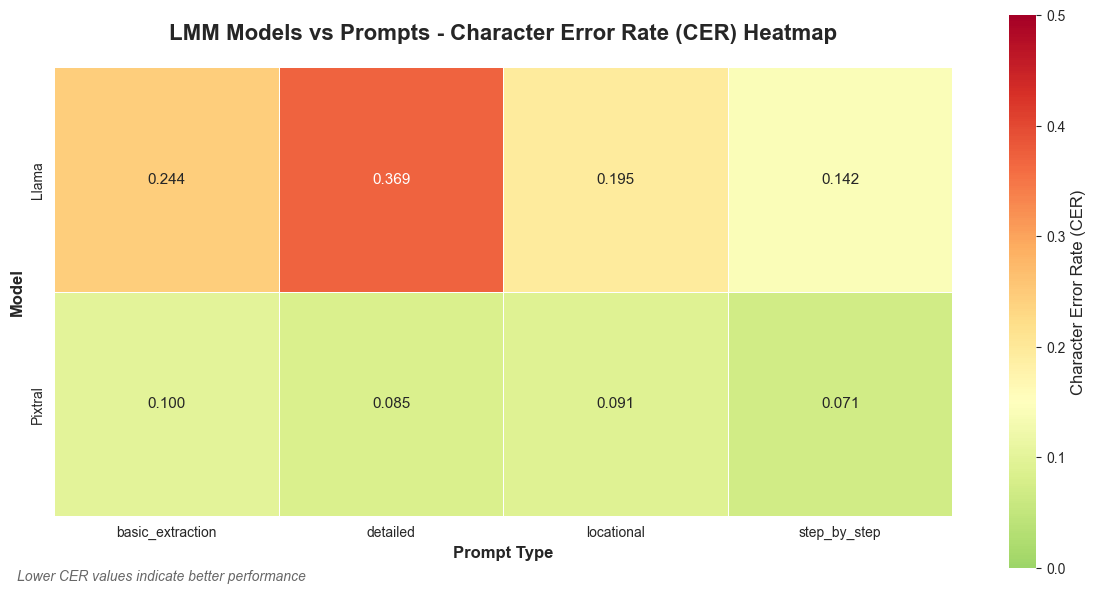


📊 LMM Models vs Prompts CER Summary:

Llama:
  Best prompt (lowest CER): step_by_step (0.142)
  Worst prompt (highest CER): detailed (0.369)
  Average CER: 0.237
  Range: 0.228

Pixtral:
  Best prompt (lowest CER): step_by_step (0.071)
  Worst prompt (highest CER): basic_extraction (0.100)
  Average CER: 0.087
  Range: 0.030

📈 Overall CER Statistics:
  Best combination (lowest CER): ('Pixtral', 'step_by_step') (0.071)
  Worst combination (highest CER): ('Llama', 'detailed') (0.369)
  Average CER across all: 0.162
  Excellent performance (CER < 0.1): 3/8 combinations
  Good performance (CER < 0.2): 6/8 combinations


In [9]:
# Create LMM Models vs Prompts Heatmap (CER)
# Pixtral/Llama (rows) × Prompt types (columns) with CER values

def create_lmm_prompt_cer_heatmap_data(comprehensive_dataset):
    """Create data structure for LMM Models vs Prompts CER heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type from metadata
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Get CER from summary
                    summary = experiment['summary']
                    if 'average_cer' in summary:
                        cer = summary['average_cer']
                        
                        # Store in heatmap structure
                        model_name = model_type.title()
                        if model_name not in heatmap_data:
                            heatmap_data[model_name] = {}
                        
                        if prompt_type:
                            heatmap_data[model_name][prompt_type] = cer
    
    return heatmap_data

def plot_lmm_prompt_cer_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Models vs Prompts CER."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for model, prompts in heatmap_data.items():
        for prompt, cer in prompts.items():
            df_data.append({
                'Model': model,
                'Prompt': prompt,
                'CER': cer
            })
    
    if not df_data:
        print("No data available for LMM Models vs Prompts CER heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap
    pivot_df = df.pivot(index='Model', columns='Prompt', values='CER')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with reversed colormap (lower CER is better, so should be green)
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn_r',  # Reversed so low CER (good) is green
                center=0.15,  # Center around reasonable CER value
                vmin=0,
                vmax=0.5,  # Most CER values should be below 0.5
                cbar_kws={'label': 'Character Error Rate (CER)'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Models vs Prompts - Character Error Rate (CER) Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Model', fontsize=12, fontweight='bold')
    
    # Add reference annotation
    plt.figtext(0.02, 0.02, 'Lower CER values indicate better performance', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Models vs Prompts CER Summary:")
    print("=" * 50)
    
    for model in pivot_df.index:
        print(f"\n{model}:")
        model_data = pivot_df.loc[model].dropna()
        if not model_data.empty:
            print(f"  Best prompt (lowest CER): {model_data.idxmin()} ({model_data.min():.3f})")
            print(f"  Worst prompt (highest CER): {model_data.idxmax()} ({model_data.max():.3f})")
            print(f"  Average CER: {model_data.mean():.3f}")
            print(f"  Range: {model_data.max() - model_data.min():.3f}")
    
    # Overall statistics
    all_cers = pivot_df.values.flatten()
    all_cers = all_cers[~pd.isna(all_cers)]
    
    print(f"\n📈 Overall CER Statistics:")
    print(f"  Best combination (lowest CER): {pivot_df.stack().idxmin()} ({pivot_df.stack().min():.3f})")
    print(f"  Worst combination (highest CER): {pivot_df.stack().idxmax()} ({pivot_df.stack().max():.3f})")
    print(f"  Average CER across all: {np.mean(all_cers):.3f}")
    print(f"  Excellent performance (CER < 0.1): {np.sum(all_cers < 0.1)}/{len(all_cers)} combinations")
    print(f"  Good performance (CER < 0.2): {np.sum(all_cers < 0.2)}/{len(all_cers)} combinations")

# Execute the analysis
print("🔍 Creating LMM Models vs Prompts CER Heatmap...")
cer_heatmap_data = create_lmm_prompt_cer_heatmap_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_cer_heatmap(cer_heatmap_data)

🔍 Creating LMM Query Types vs Prompts Accuracy Heatmap...


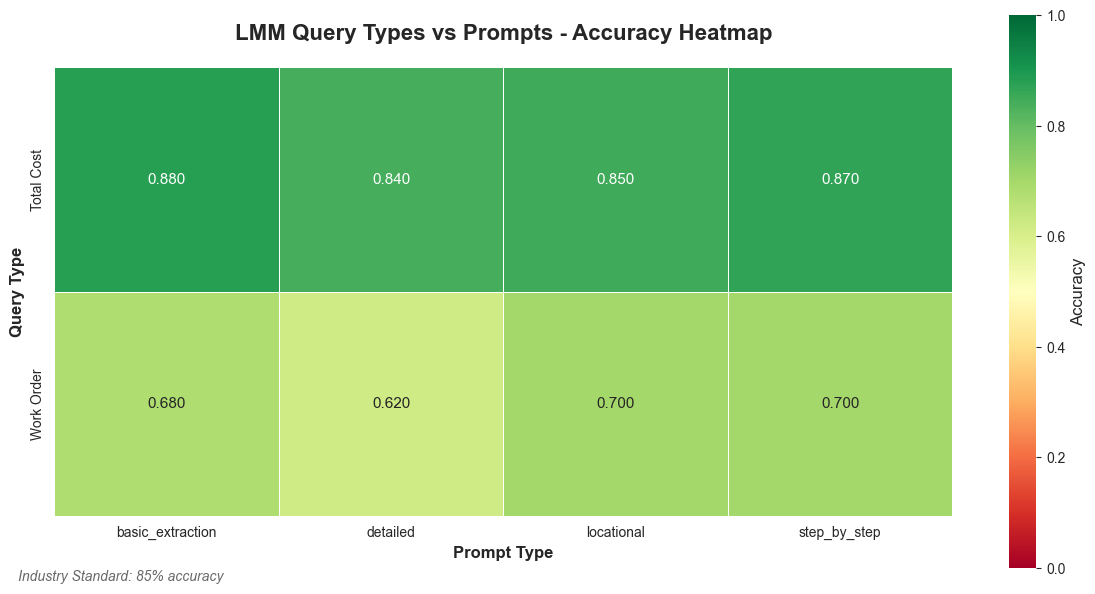


📊 LMM Query Types vs Prompts Accuracy Summary:

Total Cost:
  Best prompt: basic_extraction (0.880)
  Worst prompt: detailed (0.840)
  Average: 0.860
  Range: 0.040

Work Order:
  Best prompt: locational (0.700)
  Worst prompt: detailed (0.620)
  Average: 0.675
  Range: 0.080

📈 Prompt Type Performance:

basic_extraction:
  Best query type: Total Cost (0.880)
  Worst query type: Work Order (0.680)
  Average across queries: 0.780
  Above 85% standard: 1/2 query types

detailed:
  Best query type: Total Cost (0.840)
  Worst query type: Work Order (0.620)
  Average across queries: 0.730
  Above 85% standard: 0/2 query types

locational:
  Best query type: Total Cost (0.850)
  Worst query type: Work Order (0.700)
  Average across queries: 0.775
  Above 85% standard: 1/2 query types

step_by_step:
  Best query type: Total Cost (0.870)
  Worst query type: Work Order (0.700)
  Average across queries: 0.785
  Above 85% standard: 1/2 query types

🎯 Field Extraction Insights:
  Total Cost extra

In [10]:
# Create LMM Prompts vs Query Heatmap (Accuracy)
# Query types (Work Order/Total Cost) (rows) × Prompt types (columns) with accuracy values

def create_lmm_prompt_query_heatmap_data(comprehensive_dataset):
    """Create data structure for LMM Prompts vs Query types heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type from metadata
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Get individual field accuracies
                    summary = experiment['summary']
                    if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        work_order_acc = summary['work_order_accuracy']
                        total_cost_acc = summary['total_cost_accuracy']
                        
                        if prompt_type:
                            if prompt_type not in heatmap_data:
                                heatmap_data[prompt_type] = {
                                    'Work Order': [],
                                    'Total Cost': []
                                }
                            
                            # Collect accuracies for averaging across models
                            heatmap_data[prompt_type]['Work Order'].append(work_order_acc)
                            heatmap_data[prompt_type]['Total Cost'].append(total_cost_acc)
    
    # Average across models for each prompt type
    averaged_data = {}
    for prompt_type, queries in heatmap_data.items():
        averaged_data[prompt_type] = {}
        for query_type, accuracies in queries.items():
            if accuracies:
                averaged_data[prompt_type][query_type] = np.mean(accuracies)
    
    return averaged_data

def plot_lmm_prompt_query_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Prompts vs Query types."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for prompt, queries in heatmap_data.items():
        for query_type, accuracy in queries.items():
            df_data.append({
                'Prompt': prompt,
                'Query Type': query_type,
                'Accuracy': accuracy
            })
    
    if not df_data:
        print("No data available for LMM Prompts vs Query types heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap - flipped orientation: Query Type as rows, Prompt as columns
    pivot_df = df.pivot(index='Query Type', columns='Prompt', values='Accuracy')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with custom colormap
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.5,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Accuracy'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Query Types vs Prompts - Accuracy Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Query Type', fontsize=12, fontweight='bold')
    
    # Add 85% reference line annotation
    plt.figtext(0.02, 0.02, 'Industry Standard: 85% accuracy', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Query Types vs Prompts Accuracy Summary:")
    print("=" * 50)
    
    for query_type in pivot_df.index:
        print(f"\n{query_type}:")
        query_data = pivot_df.loc[query_type].dropna()
        if not query_data.empty:
            print(f"  Best prompt: {query_data.idxmax()} ({query_data.max():.3f})")
            print(f"  Worst prompt: {query_data.idxmin()} ({query_data.min():.3f})")
            print(f"  Average: {query_data.mean():.3f}")
            print(f"  Range: {query_data.max() - query_data.min():.3f}")
    
    # Prompt type comparison
    print(f"\n📈 Prompt Type Performance:")
    for prompt in pivot_df.columns:
        prompt_data = pivot_df[prompt].dropna()
        if not prompt_data.empty:
            print(f"\n{prompt}:")
            print(f"  Best query type: {prompt_data.idxmax()} ({prompt_data.max():.3f})")
            print(f"  Worst query type: {prompt_data.idxmin()} ({prompt_data.min():.3f})")
            print(f"  Average across queries: {prompt_data.mean():.3f}")
            print(f"  Above 85% standard: {np.sum(prompt_data >= 0.85)}/{len(prompt_data)} query types")
    
    # Overall statistics
    all_accuracies = pivot_df.values.flatten()
    all_accuracies = all_accuracies[~pd.isna(all_accuracies)]
    
    print(f"\n🎯 Field Extraction Insights:")
    work_order_avg = pivot_df.loc['Work Order'].mean() if 'Work Order' in pivot_df.index else 0
    total_cost_avg = pivot_df.loc['Total Cost'].mean() if 'Total Cost' in pivot_df.index else 0
    
    if work_order_avg > total_cost_avg:
        easier_field = "Work Order"
        harder_field = "Total Cost"
        difference = work_order_avg - total_cost_avg
    else:
        easier_field = "Total Cost"
        harder_field = "Work Order"
        difference = total_cost_avg - work_order_avg
    
    print(f"  {easier_field} extraction is generally easier ({difference:.3f} higher accuracy)")
    print(f"  {harder_field} extraction is more challenging across all prompts")

# Execute the analysis
print("🔍 Creating LMM Query Types vs Prompts Accuracy Heatmap...")
prompt_query_data = create_lmm_prompt_query_heatmap_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_query_heatmap(prompt_query_data)

🔍 Creating LMM Query Types vs Prompts CER Heatmap...


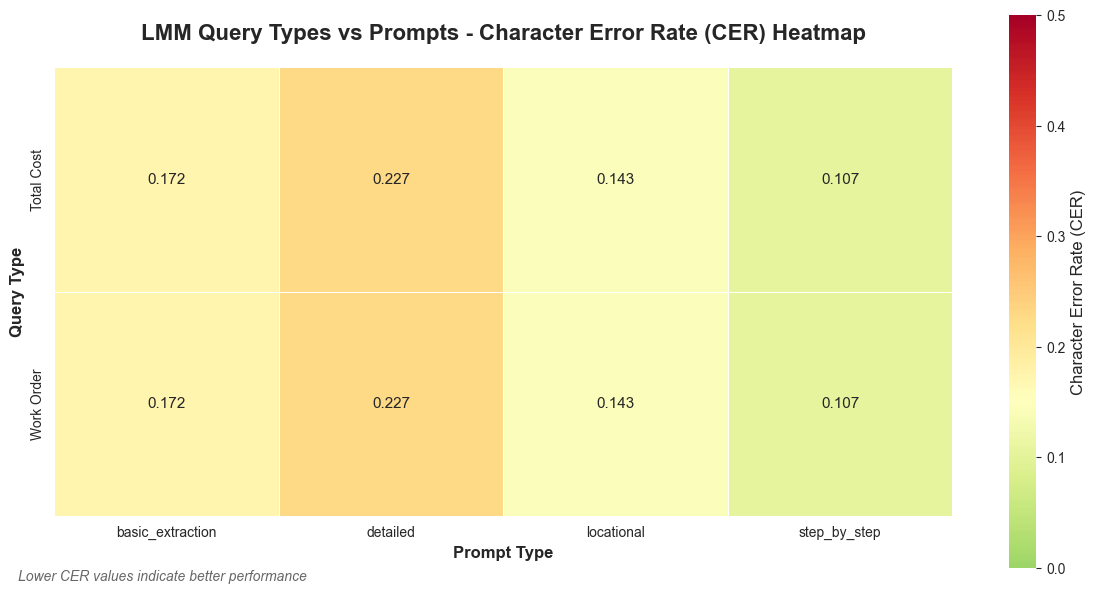


📊 LMM Query Types vs Prompts CER Summary:

Total Cost:
  Best prompt (lowest CER): step_by_step (0.107)
  Worst prompt (highest CER): detailed (0.227)
  Average CER: 0.162
  Range: 0.120

Work Order:
  Best prompt (lowest CER): step_by_step (0.107)
  Worst prompt (highest CER): detailed (0.227)
  Average CER: 0.162
  Range: 0.120

📈 Prompt Type CER Performance:

basic_extraction:
  Best query type (lowest CER): Total Cost (0.172)
  Worst query type (highest CER): Total Cost (0.172)
  Average CER: 0.172
  Excellent performance (CER < 0.1): 0/2 query types

detailed:
  Best query type (lowest CER): Total Cost (0.227)
  Worst query type (highest CER): Total Cost (0.227)
  Average CER: 0.227
  Excellent performance (CER < 0.1): 0/2 query types

locational:
  Best query type (lowest CER): Total Cost (0.143)
  Worst query type (highest CER): Total Cost (0.143)
  Average CER: 0.143
  Excellent performance (CER < 0.1): 0/2 query types

step_by_step:
  Best query type (lowest CER): Total Cost 

In [11]:
# Create LMM Prompts vs Query Heatmap (CER)
# Query types (Work Order/Total Cost) (rows) × Prompt types (columns) with CER values

def create_lmm_prompt_query_cer_data(comprehensive_dataset):
    """Create data structure for LMM Prompts vs Query types CER heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'extracted_data' in experiment:
                    # Extract prompt type from metadata
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Calculate CER for each query type from individual extractions
                    if prompt_type:
                        if prompt_type not in heatmap_data:
                            heatmap_data[prompt_type] = {
                                'Work Order': [],
                                'Total Cost': []
                            }
                        
                        # Collect CER values from individual extractions
                        for extraction in experiment['extracted_data']:
                            if 'performance' in extraction:
                                perf = extraction['performance']
                                if 'work_order_cer' in perf:
                                    heatmap_data[prompt_type]['Work Order'].append(perf['work_order_cer'])
                                
                                # For total cost CER, we need to calculate it from the data
                                # If not directly available, use average CER as approximation
                                if 'total_cost_cer' in perf:
                                    heatmap_data[prompt_type]['Total Cost'].append(perf['total_cost_cer'])
                                elif 'work_order_cer' in perf:
                                    # Use work_order_cer as approximation if total_cost_cer not available
                                    heatmap_data[prompt_type]['Total Cost'].append(perf['work_order_cer'])
    
    # Average across all extractions for each prompt type and query type
    averaged_data = {}
    for prompt_type, queries in heatmap_data.items():
        averaged_data[prompt_type] = {}
        for query_type, cers in queries.items():
            if cers:
                averaged_data[prompt_type][query_type] = np.mean(cers)
    
    return averaged_data

def plot_lmm_prompt_query_cer_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Prompts vs Query types CER."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for prompt, queries in heatmap_data.items():
        for query_type, cer in queries.items():
            df_data.append({
                'Prompt': prompt,
                'Query Type': query_type,
                'CER': cer
            })
    
    if not df_data:
        print("No data available for LMM Prompts vs Query types CER heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap - Query Type as rows, Prompt as columns
    pivot_df = df.pivot(index='Query Type', columns='Prompt', values='CER')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with reversed colormap (lower CER is better)
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn_r',  # Reversed so low CER (good) is green
                center=0.15,  # Center around reasonable CER value
                vmin=0,
                vmax=0.5,  # Most CER values should be below 0.5
                cbar_kws={'label': 'Character Error Rate (CER)'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Query Types vs Prompts - Character Error Rate (CER) Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Query Type', fontsize=12, fontweight='bold')
    
    # Add reference annotation
    plt.figtext(0.02, 0.02, 'Lower CER values indicate better performance', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Query Types vs Prompts CER Summary:")
    print("=" * 50)
    
    for query_type in pivot_df.index:
        print(f"\n{query_type}:")
        query_data = pivot_df.loc[query_type].dropna()
        if not query_data.empty:
            print(f"  Best prompt (lowest CER): {query_data.idxmin()} ({query_data.min():.3f})")
            print(f"  Worst prompt (highest CER): {query_data.idxmax()} ({query_data.max():.3f})")
            print(f"  Average CER: {query_data.mean():.3f}")
            print(f"  Range: {query_data.max() - query_data.min():.3f}")
    
    # Prompt type comparison
    print(f"\n📈 Prompt Type CER Performance:")
    for prompt in pivot_df.columns:
        prompt_data = pivot_df[prompt].dropna()
        if not prompt_data.empty:
            print(f"\n{prompt}:")
            print(f"  Best query type (lowest CER): {prompt_data.idxmin()} ({prompt_data.min():.3f})")
            print(f"  Worst query type (highest CER): {prompt_data.idxmax()} ({prompt_data.max():.3f})")
            print(f"  Average CER: {prompt_data.mean():.3f}")
            print(f"  Excellent performance (CER < 0.1): {np.sum(prompt_data < 0.1)}/{len(prompt_data)} query types")
    
    # Overall statistics
    all_cers = pivot_df.values.flatten()
    all_cers = all_cers[~pd.isna(all_cers)]
    
    print(f"\n🎯 Field Extraction CER Insights:")
    work_order_avg = pivot_df.loc['Work Order'].mean() if 'Work Order' in pivot_df.index else 0
    total_cost_avg = pivot_df.loc['Total Cost'].mean() if 'Total Cost' in pivot_df.index else 0
    
    if work_order_avg < total_cost_avg:
        easier_field = "Work Order"
        harder_field = "Total Cost"
        difference = total_cost_avg - work_order_avg
    else:
        easier_field = "Total Cost"
        harder_field = "Work Order"
        difference = work_order_avg - total_cost_avg
    
    print(f"  {easier_field} extraction has lower character errors ({difference:.3f} lower CER)")
    print(f"  {harder_field} extraction is more error-prone across all prompts")
    print(f"  Overall CER range: {np.min(all_cers):.3f} to {np.max(all_cers):.3f}")

# Execute the analysis
print("🔍 Creating LMM Query Types vs Prompts CER Heatmap...")
prompt_query_cer_data = create_lmm_prompt_query_cer_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_query_cer_heatmap(prompt_query_cer_data)

🔍 Creating All Models vs Query Types Accuracy Heatmap...


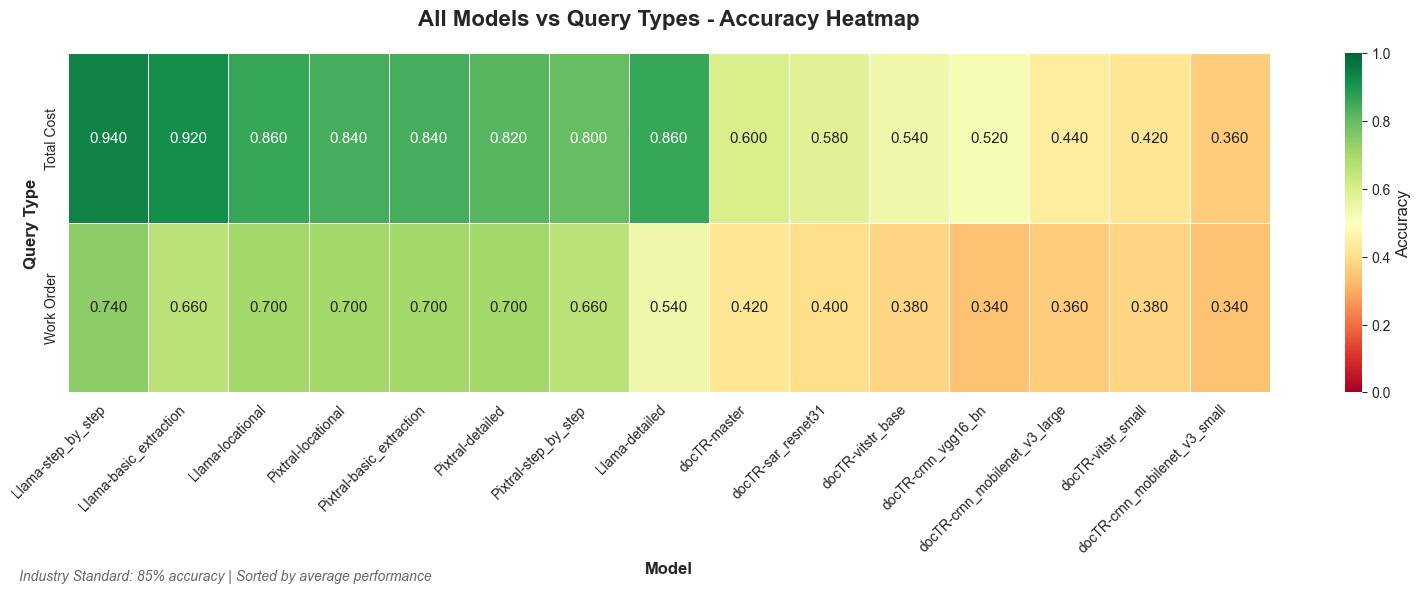


📊 All Models vs Query Types Accuracy Summary:

Total Cost Extraction:
  🥇 Best model: Llama-step_by_step (0.940)
  🥉 Worst model: docTR-crnn_mobilenet_v3_small (0.360)
  📊 Average: 0.689
  📈 Above 85% standard: 4/15 models
  🎯 Range: 0.580

Work Order Extraction:
  🥇 Best model: Llama-step_by_step (0.740)
  🥉 Worst model: docTR-crnn_mobilenet_v3_small (0.340)
  📊 Average: 0.535
  📈 Above 85% standard: 0/15 models
  🎯 Range: 0.400

🏆 Overall Model Performance Ranking:
----------------------------------------
   1. ⚠️ Llama-step_by_step        (0.840)
   2. ⚠️ Llama-basic_extraction    (0.790)
   3. ⚠️ Llama-locational          (0.780)
   4. ⚠️ Pixtral-locational        (0.770)
   5. ⚠️ Pixtral-basic_extraction  (0.770)
   6. ⚠️ Pixtral-detailed          (0.760)
   7. ⚠️ Pixtral-step_by_step      (0.730)
   8. ⚠️ Llama-detailed            (0.700)
   9. ❌ docTR-master              (0.510)
  10. ❌ docTR-sar_resnet31        (0.490)
  11. ❌ docTR-vitstr_base         (0.460)
  12. ❌ docTR-cr

In [12]:
# Create All Models vs Query Heatmap (Accuracy)
# Query types (Work Order/Total Cost) (rows) × All models including OCR (columns) with accuracy values

def create_all_models_query_heatmap_data(comprehensive_dataset):
    """Create data structure for All Models vs Query types heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Get model identifier
                model_name = None
                
                if model_type in ['pixtral', 'llama']:
                    # For LMM models, include prompt type in name
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    if prompt_type:
                        model_name = f"{model_type.title()}-{prompt_type}"
                    else:
                        model_name = model_type.title()
                
                elif model_type == 'doctr':
                    # For docTR models, extract recognition model type
                    recognition_model = 'unknown'
                    if 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            model_id = experiment['metadata']['model_info']['model_id']
                            if 'recognition_model' in model_id:
                                recognition_model = model_id['recognition_model']
                    
                    model_name = f"docTR-{recognition_model}"
                
                # Get field accuracies
                summary = experiment['summary']
                if model_name and 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    work_order_acc = summary['work_order_accuracy']
                    total_cost_acc = summary['total_cost_accuracy']
                    
                    if model_name not in heatmap_data:
                        heatmap_data[model_name] = {
                            'Work Order': [],
                            'Total Cost': []
                        }
                    
                    heatmap_data[model_name]['Work Order'].append(work_order_acc)
                    heatmap_data[model_name]['Total Cost'].append(total_cost_acc)
    
    # Average across experiments for each model
    averaged_data = {}
    for model_name, queries in heatmap_data.items():
        averaged_data[model_name] = {}
        for query_type, accuracies in queries.items():
            if accuracies:
                averaged_data[model_name][query_type] = np.mean(accuracies)
    
    return averaged_data

def plot_all_models_query_heatmap(heatmap_data):
    """Create heatmap visualization for All Models vs Query types."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for model, queries in heatmap_data.items():
        for query_type, accuracy in queries.items():
            df_data.append({
                'Model': model,
                'Query Type': query_type,
                'Accuracy': accuracy
            })
    
    if not df_data:
        print("No data available for All Models vs Query types heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap - Query Type as rows, Model as columns
    pivot_df = df.pivot(index='Query Type', columns='Model', values='Accuracy')
    
    # Sort columns by average performance (descending)
    avg_performance = pivot_df.mean().sort_values(ascending=False)
    pivot_df = pivot_df[avg_performance.index]
    
    # Create the heatmap
    plt.figure(figsize=(16, 6))
    
    # Create heatmap with custom colormap
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.5,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Accuracy'},
                square=False,
                linewidths=0.5)
    
    plt.title('All Models vs Query Types - Accuracy Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Model', fontsize=12, fontweight='bold')
    plt.ylabel('Query Type', fontsize=12, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add 85% reference line annotation
    plt.figtext(0.02, 0.02, 'Industry Standard: 85% accuracy | Sorted by average performance', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 All Models vs Query Types Accuracy Summary:")
    print("=" * 60)
    
    for query_type in pivot_df.index:
        print(f"\n{query_type} Extraction:")
        query_data = pivot_df.loc[query_type].dropna().sort_values(ascending=False)
        if not query_data.empty:
            print(f"  🥇 Best model: {query_data.index[0]} ({query_data.iloc[0]:.3f})")
            print(f"  🥉 Worst model: {query_data.index[-1]} ({query_data.iloc[-1]:.3f})")
            print(f"  📊 Average: {query_data.mean():.3f}")
            print(f"  📈 Above 85% standard: {np.sum(query_data >= 0.85)}/{len(query_data)} models")
            print(f"  🎯 Range: {query_data.max() - query_data.min():.3f}")
    
    # Model performance ranking
    print(f"\n🏆 Overall Model Performance Ranking:")
    print("-" * 40)
    overall_avg = pivot_df.mean().sort_values(ascending=False)
    for i, (model, avg_acc) in enumerate(overall_avg.items(), 1):
        status = "✅" if avg_acc >= 0.85 else "⚠️" if avg_acc >= 0.70 else "❌"
        print(f"  {i:2d}. {status} {model:<25} ({avg_acc:.3f})")
    
    # Category analysis
    print(f"\n📈 Model Category Analysis:")
    print("-" * 40)
    
    # Group by model type
    llm_models = [col for col in pivot_df.columns if col.startswith(('Pixtral', 'Llama'))]
    doctr_models = [col for col in pivot_df.columns if col.startswith('docTR')]
    
    if llm_models:
        llm_avg = pivot_df[llm_models].mean().mean()
        print(f"  🧠 LMM Models Average: {llm_avg:.3f}")
        print(f"     Best LMM: {pivot_df[llm_models].mean().idxmax()} ({pivot_df[llm_models].mean().max():.3f})")
    
    if doctr_models:
        doctr_avg = pivot_df[doctr_models].mean().mean()
        print(f"  🔍 docTR Models Average: {doctr_avg:.3f}")
        print(f"     Best docTR: {pivot_df[doctr_models].mean().idxmax()} ({pivot_df[doctr_models].mean().max():.3f})")
    
    # Field comparison
    print(f"\n🎯 Field Extraction Comparison:")
    work_order_avg = pivot_df.loc['Work Order'].mean()
    total_cost_avg = pivot_df.loc['Total Cost'].mean()
    
    if work_order_avg > total_cost_avg:
        easier_field = "Work Order"
        harder_field = "Total Cost"
        difference = work_order_avg - total_cost_avg
    else:
        easier_field = "Total Cost"
        harder_field = "Work Order"
        difference = total_cost_avg - work_order_avg
    
    print(f"  📋 {easier_field}: {max(work_order_avg, total_cost_avg):.3f} average (easier)")
    print(f"  💰 {harder_field}: {min(work_order_avg, total_cost_avg):.3f} average (harder)")
    print(f"  📏 Difficulty gap: {difference:.3f}")

# Execute the analysis
print("🔍 Creating All Models vs Query Types Accuracy Heatmap...")
all_models_query_data = create_all_models_query_heatmap_data(COMPREHENSIVE_DATASET)
plot_all_models_query_heatmap(all_models_query_data)

*Placeholder for analysis of LMM model responses to different prompt strategies, optimal prompt-model combinations, and CER pattern relationships.*


### Cell 2.2: Model Consistency Analysis


🔍 Calculating Coefficient of Variation for Model Stability...


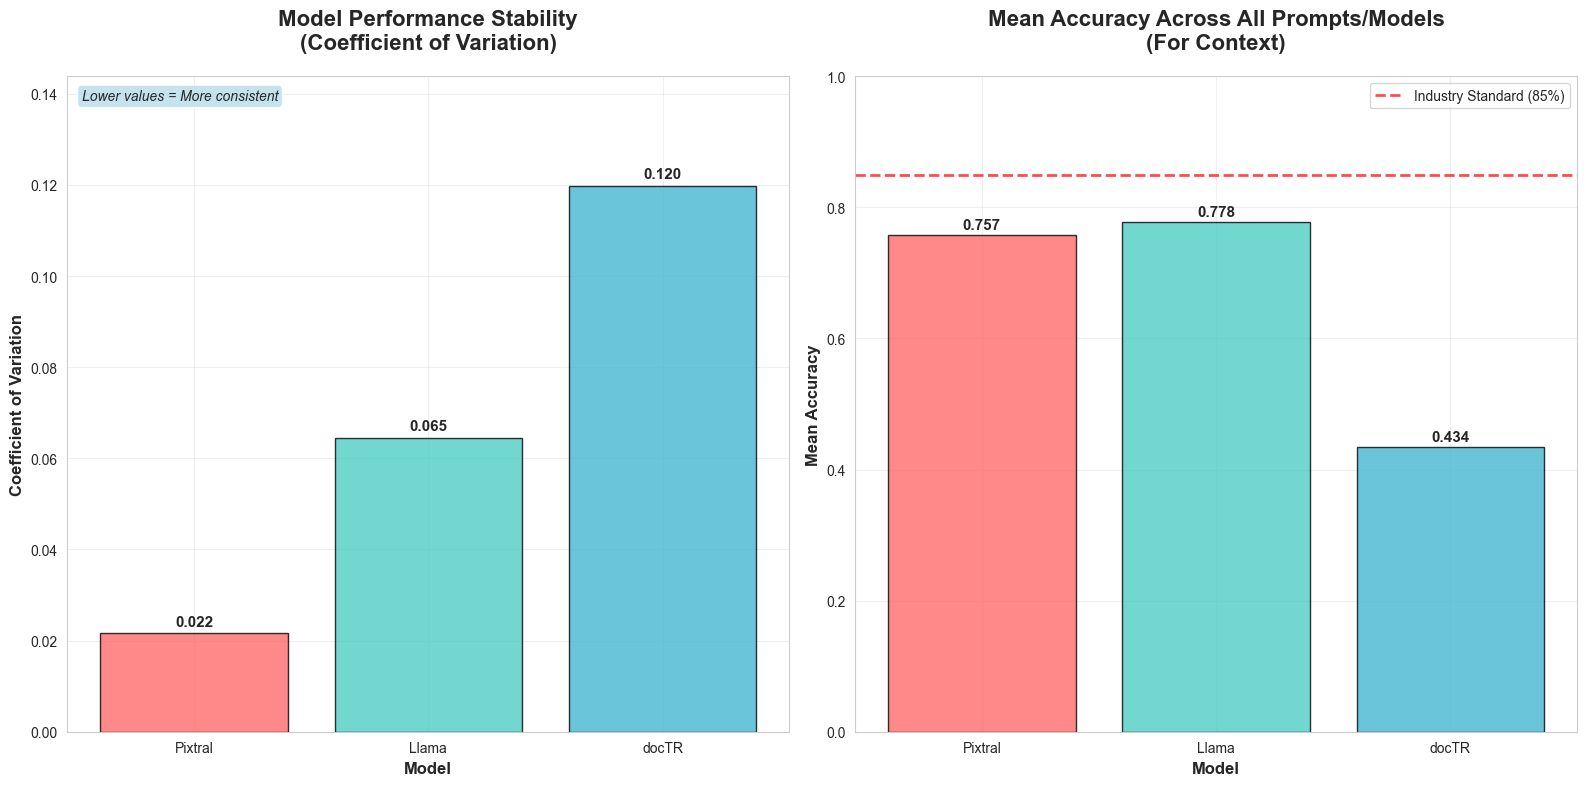


📊 Performance Stability Analysis:

Pixtral:
  Coefficient of Variation: 0.0216
  Mean Accuracy: 0.757
  Standard Deviation: 0.0164
  Configurations tested: 4
  Stability Rating: Very Stable
  Individual performances:
    locational: 0.770
    detailed: 0.760
    basic_extraction: 0.770
    step_by_step: 0.730

Llama:
  Coefficient of Variation: 0.0645
  Mean Accuracy: 0.778
  Standard Deviation: 0.0502
  Configurations tested: 4
  Stability Rating: Stable
  Individual performances:
    step_by_step: 0.840
    basic_extraction: 0.790
    detailed: 0.700
    locational: 0.780

docTR:
  Coefficient of Variation: 0.1199
  Mean Accuracy: 0.434
  Standard Deviation: 0.0521
  Configurations tested: 7
  Stability Rating: Moderately Stable
  Individual performances:
    master: 0.510
    sar_resnet31: 0.490
    crnn_vgg16_bn: 0.430
    vitstr_base: 0.460
    crnn_mobilenet_v3_small: 0.350
    crnn_mobilenet_v3_large: 0.400
    vitstr_small: 0.400

🎯 Key Stability Insights:
  Most Stable: Pixtr

In [13]:
# Create Coefficient of Variation Bar Chart
# Performance stability across prompts for each model

def calculate_coefficient_of_variation(comprehensive_dataset):
    """Calculate coefficient of variation for each model across different prompts."""
    model_cv_data = {}
    
    # Process LMM models (Pixtral and Llama) across different prompts
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            # Group experiments by prompt type
            prompt_accuracies = {}
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Get accuracy data
                    summary = experiment['summary']
                    if prompt_type and 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        # Calculate average accuracy for this experiment
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        
                        if prompt_type not in prompt_accuracies:
                            prompt_accuracies[prompt_type] = []
                        prompt_accuracies[prompt_type].append(avg_accuracy)
            
            # Calculate mean accuracy for each prompt type
            prompt_means = {}
            for prompt_type, accuracies in prompt_accuracies.items():
                if accuracies:
                    prompt_means[prompt_type] = np.mean(accuracies)
            
            # Calculate coefficient of variation if we have multiple prompt types
            if len(prompt_means) > 1:
                accuracies_list = list(prompt_means.values())
                mean_accuracy = np.mean(accuracies_list)
                std_accuracy = np.std(accuracies_list)
                cv = std_accuracy / mean_accuracy if mean_accuracy > 0 else 0
                
                model_cv_data[model_type.title()] = {
                    'cv': cv,
                    'mean_accuracy': mean_accuracy,
                    'std_accuracy': std_accuracy,
                    'prompt_count': len(prompt_means),
                    'prompt_data': prompt_means
                }
    
    # Process docTR models (across different recognition models)
    if 'doctr' in comprehensive_dataset['model_data']:
        doctr_experiments = comprehensive_dataset['model_data']['doctr']
        
        # Group by recognition model
        recognition_accuracies = {}
        
        for experiment in doctr_experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Extract recognition model
                recognition_model = 'unknown'
                if 'model_info' in experiment['metadata']:
                    if 'model_id' in experiment['metadata']['model_info']:
                        model_id = experiment['metadata']['model_info']['model_id']
                        if 'recognition_model' in model_id:
                            recognition_model = model_id['recognition_model']
                
                # Get accuracy data
                summary = experiment['summary']
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    
                    if recognition_model not in recognition_accuracies:
                        recognition_accuracies[recognition_model] = []
                    recognition_accuracies[recognition_model].append(avg_accuracy)
        
        # Calculate mean for each recognition model
        recognition_means = {}
        for recognition_model, accuracies in recognition_accuracies.items():
            if accuracies:
                recognition_means[recognition_model] = np.mean(accuracies)
        
        # Calculate coefficient of variation for docTR
        if len(recognition_means) > 1:
            accuracies_list = list(recognition_means.values())
            mean_accuracy = np.mean(accuracies_list)
            std_accuracy = np.std(accuracies_list)
            cv = std_accuracy / mean_accuracy if mean_accuracy > 0 else 0
            
            model_cv_data['docTR'] = {
                'cv': cv,
                'mean_accuracy': mean_accuracy,
                'std_accuracy': std_accuracy,
                'prompt_count': len(recognition_means),
                'prompt_data': recognition_means
            }
    
    return model_cv_data

def plot_coefficient_of_variation_chart(cv_data):
    """Create coefficient of variation bar chart."""
    if not cv_data:
        print("No coefficient of variation data available")
        return
    
    # Prepare data for plotting
    models = list(cv_data.keys())
    cv_values = [cv_data[model]['cv'] for model in models]
    mean_accuracies = [cv_data[model]['mean_accuracy'] for model in models]
    
    # Sort by coefficient of variation (ascending - lower is better)
    sorted_indices = np.argsort(cv_values)
    models_sorted = [models[i] for i in sorted_indices]
    cv_sorted = [cv_values[i] for i in sorted_indices]
    mean_acc_sorted = [mean_accuracies[i] for i in sorted_indices]
    
    # Create colors
    colors = []
    for model in models_sorted:
        if model == 'Pixtral':
            colors.append('#FF6B6B')  # Red for Pixtral
        elif model == 'Llama':
            colors.append('#4ECDC4')  # Teal for Llama
        else:  # docTR
            colors.append('#45B7D1')  # Blue for docTR
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot 1: Coefficient of Variation
    bars1 = ax1.bar(models_sorted, cv_sorted, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar, cv_val in zip(bars1, cv_sorted):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{cv_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    ax1.set_title('Model Performance Stability\n(Coefficient of Variation)', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Coefficient of Variation', fontsize=12, fontweight='bold')
    ax1.set_ylim(0, max(cv_sorted) * 1.2)
    ax1.grid(axis='y', alpha=0.3)
    
    # Add interpretation text
    ax1.text(0.02, 0.98, 'Lower values = More consistent', 
             transform=ax1.transAxes, fontsize=10, style='italic', 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    # Plot 2: Mean Accuracy (for context)
    bars2 = ax2.bar(models_sorted, mean_acc_sorted, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar, acc_val in zip(bars2, mean_acc_sorted):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add 85% reference line
    ax2.axhline(y=0.85, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Industry Standard (85%)')
    ax2.legend()
    
    ax2.set_title('Mean Accuracy Across All Prompts/Models\n(For Context)', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Mean Accuracy', fontsize=12, fontweight='bold')
    ax2.set_ylim(0, 1.0)
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n📊 Performance Stability Analysis:")
    print("=" * 60)
    
    for i, model in enumerate(models_sorted):
        data = cv_data[model]
        print(f"\n{model}:")
        print(f"  Coefficient of Variation: {data['cv']:.4f}")
        print(f"  Mean Accuracy: {data['mean_accuracy']:.3f}")
        print(f"  Standard Deviation: {data['std_accuracy']:.4f}")
        print(f"  Configurations tested: {data['prompt_count']}")
        
        # Stability interpretation
        if data['cv'] < 0.05:
            stability = "Very Stable"
        elif data['cv'] < 0.10:
            stability = "Stable"
        elif data['cv'] < 0.20:
            stability = "Moderately Stable"
        else:
            stability = "Unstable"
        
        print(f"  Stability Rating: {stability}")
        
        # Show individual prompt/model performances
        print(f"  Individual performances:")
        for config, acc in data['prompt_data'].items():
            print(f"    {config}: {acc:.3f}")
    
    # Overall insights
    print(f"\n🎯 Key Stability Insights:")
    most_stable = models_sorted[0]
    least_stable = models_sorted[-1]
    
    print(f"  Most Stable: {most_stable} (CV: {cv_data[most_stable]['cv']:.4f})")
    print(f"  Least Stable: {least_stable} (CV: {cv_data[least_stable]['cv']:.4f})")
    
    stability_diff = cv_data[least_stable]['cv'] - cv_data[most_stable]['cv']
    print(f"  Stability Range: {stability_diff:.4f}")
    
    # Performance vs Stability analysis
    print(f"\n⚖️ Performance vs Stability Trade-off:")
    for model in models_sorted:
        data = cv_data[model]
        if data['mean_accuracy'] > 0.85 and data['cv'] < 0.10:
            rating = "Excellent (High accuracy + High stability)"
        elif data['mean_accuracy'] > 0.85:
            rating = "Good (High accuracy, moderate stability)"
        elif data['cv'] < 0.10:
            rating = "Reliable (High stability, moderate accuracy)"
        else:
            rating = "Needs improvement"
        
        print(f"  {model}: {rating}")

# Execute the analysis
print("🔍 Calculating Coefficient of Variation for Model Stability...")
cv_data = calculate_coefficient_of_variation(COMPREHENSIVE_DATASET)
plot_coefficient_of_variation_chart(cv_data)

🔍 Calculating Model Performance Ranges...


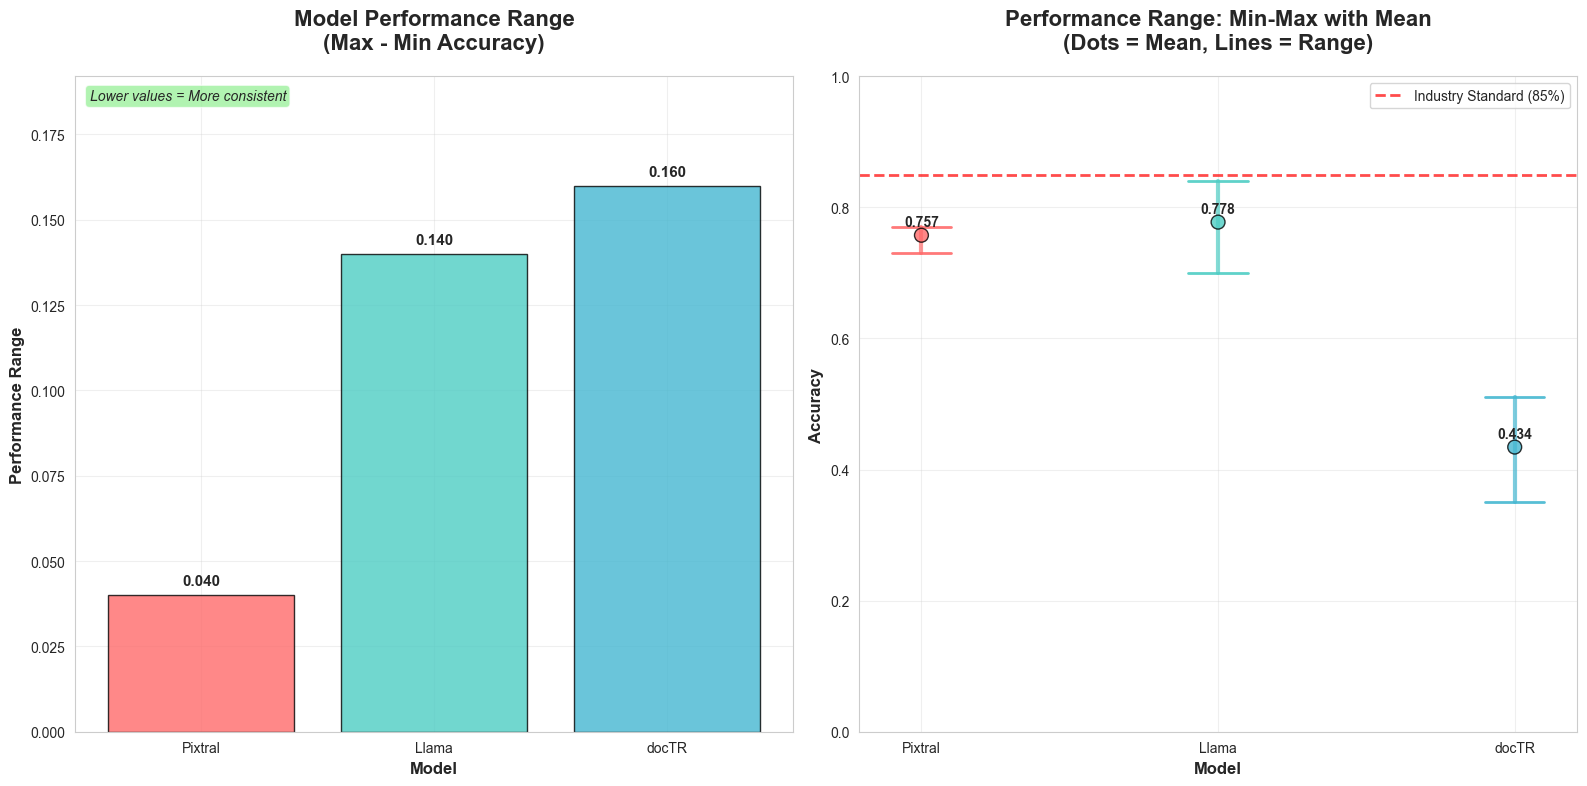


📊 Performance Range Analysis:

Pixtral:
  Performance Range: 0.0400
  Minimum Accuracy: 0.730
  Maximum Accuracy: 0.770
  Mean Accuracy: 0.757
  Configurations tested: 4
  Consistency Rating: Very Consistent
  Configuration breakdown:
    locational: 0.770
    basic_extraction: 0.770
    detailed: 0.760
    step_by_step: 0.730

Llama:
  Performance Range: 0.1400
  Minimum Accuracy: 0.700
  Maximum Accuracy: 0.840
  Mean Accuracy: 0.778
  Configurations tested: 4
  Consistency Rating: Moderately Consistent
  Configuration breakdown:
    step_by_step: 0.840
    basic_extraction: 0.790
    locational: 0.780
    detailed: 0.700

docTR:
  Performance Range: 0.1600
  Minimum Accuracy: 0.350
  Maximum Accuracy: 0.510
  Mean Accuracy: 0.434
  Configurations tested: 7
  Consistency Rating: Moderately Consistent
  Configuration breakdown:
    master: 0.510
    sar_resnet31: 0.490
    vitstr_base: 0.460
    crnn_vgg16_bn: 0.430
    crnn_mobilenet_v3_large: 0.400
    vitstr_small: 0.400
    crnn_

In [35]:
# Create Min-Max Range Visualization
# Performance ranges to identify most/least consistent models

def calculate_model_performance_ranges(comprehensive_dataset):
    """Calculate min, max, and range for each model across different configurations."""
    model_ranges = {}
    
    # Process LMM models (Pixtral and Llama) across different prompts
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            # Group experiments by prompt type
            prompt_accuracies = {}
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Get accuracy data
                    summary = experiment['summary']
                    if prompt_type and 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        # Calculate average accuracy for this experiment
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        
                        if prompt_type not in prompt_accuracies:
                            prompt_accuracies[prompt_type] = []
                        prompt_accuracies[prompt_type].append(avg_accuracy)
            
            # Calculate mean accuracy for each prompt type
            prompt_means = {}
            for prompt_type, accuracies in prompt_accuracies.items():
                if accuracies:
                    prompt_means[prompt_type] = np.mean(accuracies)
            
            # Calculate range statistics if we have multiple prompt types
            if len(prompt_means) > 1:
                accuracies_list = list(prompt_means.values())
                min_accuracy = np.min(accuracies_list)
                max_accuracy = np.max(accuracies_list)
                range_accuracy = max_accuracy - min_accuracy
                mean_accuracy = np.mean(accuracies_list)
                
                model_ranges[model_type.title()] = {
                    'min': min_accuracy,
                    'max': max_accuracy,
                    'range': range_accuracy,
                    'mean': mean_accuracy,
                    'config_count': len(prompt_means),
                    'config_data': prompt_means
                }
    
    # Process docTR models (across different recognition models)
    if 'doctr' in comprehensive_dataset['model_data']:
        doctr_experiments = comprehensive_dataset['model_data']['doctr']
        
        # Group by recognition model
        recognition_accuracies = {}
        
        for experiment in doctr_experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Extract recognition model
                recognition_model = 'unknown'
                if 'model_info' in experiment['metadata']:
                    if 'model_id' in experiment['metadata']['model_info']:
                        model_id = experiment['metadata']['model_info']['model_id']
                        if 'recognition_model' in model_id:
                            recognition_model = model_id['recognition_model']
                
                # Get accuracy data
                summary = experiment['summary']
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    
                    if recognition_model not in recognition_accuracies:
                        recognition_accuracies[recognition_model] = []
                    recognition_accuracies[recognition_model].append(avg_accuracy)
        
        # Calculate mean for each recognition model
        recognition_means = {}
        for recognition_model, accuracies in recognition_accuracies.items():
            if accuracies:
                recognition_means[recognition_model] = np.mean(accuracies)
        
        # Calculate range statistics for docTR
        if len(recognition_means) > 1:
            accuracies_list = list(recognition_means.values())
            min_accuracy = np.min(accuracies_list)
            max_accuracy = np.max(accuracies_list)
            range_accuracy = max_accuracy - min_accuracy
            mean_accuracy = np.mean(accuracies_list)
            
            model_ranges['docTR'] = {
                'min': min_accuracy,
                'max': max_accuracy,
                'range': range_accuracy,
                'mean': mean_accuracy,
                'config_count': len(recognition_means),
                'config_data': recognition_means
            }
    
    return model_ranges

def plot_min_max_range_visualization(range_data):
    """Create min-max range visualization."""
    if not range_data:
        print("No range data available")
        return
    
    # Prepare data for plotting
    models = list(range_data.keys())
    ranges = [range_data[model]['range'] for model in models]
    means = [range_data[model]['mean'] for model in models]
    mins = [range_data[model]['min'] for model in models]
    maxs = [range_data[model]['max'] for model in models]
    
    # Sort by range (ascending - smaller range = more consistent)
    sorted_indices = np.argsort(ranges)
    models_sorted = [models[i] for i in sorted_indices]
    ranges_sorted = [ranges[i] for i in sorted_indices]
    means_sorted = [means[i] for i in sorted_indices]
    mins_sorted = [mins[i] for i in sorted_indices]
    maxs_sorted = [maxs[i] for i in sorted_indices]
    
    # Create colors
    colors = []
    for model in models_sorted:
        if model == 'Pixtral':
            colors.append('#FF6B6B')  # Red for Pixtral
        elif model == 'Llama':
            colors.append('#4ECDC4')  # Teal for Llama
        else:  # docTR
            colors.append('#45B7D1')  # Blue for docTR
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot 1: Range Bar Chart
    bars1 = ax1.bar(models_sorted, ranges_sorted, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar, range_val in zip(bars1, ranges_sorted):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{range_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    ax1.set_title('Model Performance Range\n(Max - Min Accuracy)', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Performance Range', fontsize=12, fontweight='bold')
    ax1.set_ylim(0, max(ranges_sorted) * 1.2)
    ax1.grid(axis='y', alpha=0.3)
    
    # Add interpretation text
    ax1.text(0.02, 0.98, 'Lower values = More consistent', 
             transform=ax1.transAxes, fontsize=10, style='italic', 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    # Plot 2: Min-Max Range with Error Bars
    x_pos = np.arange(len(models_sorted))
    
    # Create scatter plot for mean values
    scatter = ax2.scatter(x_pos, means_sorted, s=100, c=colors, alpha=0.8, edgecolors='black', linewidth=1, zorder=3)
    
    # Add error bars showing min-max range
    for i, (mean_val, min_val, max_val) in enumerate(zip(means_sorted, mins_sorted, maxs_sorted)):
        ax2.plot([i, i], [min_val, max_val], color=colors[i], linewidth=3, alpha=0.7, zorder=2)
        ax2.plot([i-0.1, i+0.1], [min_val, min_val], color=colors[i], linewidth=2, alpha=0.9, zorder=2)
        ax2.plot([i-0.1, i+0.1], [max_val, max_val], color=colors[i], linewidth=2, alpha=0.9, zorder=2)
    
    # Add 85% reference line
    ax2.axhline(y=0.85, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Industry Standard (85%)')
    ax2.legend()
    
    # Add value labels for means
    for i, mean_val in enumerate(means_sorted):
        ax2.text(i, mean_val + 0.01, f'{mean_val:.3f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    ax2.set_title('Performance Range: Min-Max with Mean\n(Dots = Mean, Lines = Range)', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax2.set_ylim(0, 1.0)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(models_sorted)
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n📊 Performance Range Analysis:")
    print("=" * 60)
    
    for i, model in enumerate(models_sorted):
        data = range_data[model]
        print(f"\n{model}:")
        print(f"  Performance Range: {data['range']:.4f}")
        print(f"  Minimum Accuracy: {data['min']:.3f}")
        print(f"  Maximum Accuracy: {data['max']:.3f}")
        print(f"  Mean Accuracy: {data['mean']:.3f}")
        print(f"  Configurations tested: {data['config_count']}")
        
        # Consistency interpretation
        if data['range'] < 0.05:
            consistency = "Very Consistent"
        elif data['range'] < 0.10:
            consistency = "Consistent"
        elif data['range'] < 0.20:
            consistency = "Moderately Consistent"
        else:
            consistency = "Inconsistent"
        
        print(f"  Consistency Rating: {consistency}")
        
        # Show individual configuration performances
        print(f"  Configuration breakdown:")
        sorted_configs = sorted(data['config_data'].items(), key=lambda x: x[1], reverse=True)
        for config, acc in sorted_configs:
            print(f"    {config}: {acc:.3f}")
    
    # Overall insights
    print(f"\n🎯 Key Consistency Insights:")
    most_consistent = models_sorted[0]
    least_consistent = models_sorted[-1]
    
    print(f"  Most Consistent: {most_consistent} (Range: {range_data[most_consistent]['range']:.4f})")
    print(f"  Least Consistent: {least_consistent} (Range: {range_data[least_consistent]['range']:.4f})")
    
    consistency_diff = range_data[least_consistent]['range'] - range_data[most_consistent]['range']
    print(f"  Consistency Gap: {consistency_diff:.4f}")
    
    # Performance vs Consistency analysis
    print(f"\n⚖️ Performance vs Consistency Trade-off:")
    for model in models_sorted:
        data = range_data[model]
        if data['mean'] > 0.85 and data['range'] < 0.10:
            rating = "Excellent (High performance + High consistency)"
        elif data['mean'] > 0.85:
            rating = "Good (High performance, moderate consistency)"
        elif data['range'] < 0.10:
            rating = "Reliable (High consistency, moderate performance)"
        else:
            rating = "Needs improvement"
        
        print(f"  {model}: {rating}")
    
    # Best and worst configurations
    print(f"\n🏆 Best Individual Configurations:")
    all_configs = []
    for model, data in range_data.items():
        for config, acc in data['config_data'].items():
            all_configs.append((f"{model}-{config}", acc))
    
    all_configs.sort(key=lambda x: x[1], reverse=True)
    for i, (config, acc) in enumerate(all_configs[:3]):
        print(f"  {i+1}. {config}: {acc:.3f}")
    
    print(f"\n⚠️ Worst Individual Configurations:")
    for i, (config, acc) in enumerate(all_configs[-3:]):
        print(f"  {len(all_configs)-2+i}. {config}: {acc:.3f}")

# Execute the analysis
print("🔍 Calculating Model Performance Ranges...")
range_data = calculate_model_performance_ranges(COMPREHENSIVE_DATASET)
plot_min_max_range_visualization(range_data)

*Placeholder for evaluation of performance stability across different conditions.*


## Section 3: Error Pattern Taxonomy & System Improvement Insights


### Cell 3.1: Systematic Error Analysis


🔍 Analyzing Error Patterns and Examples...


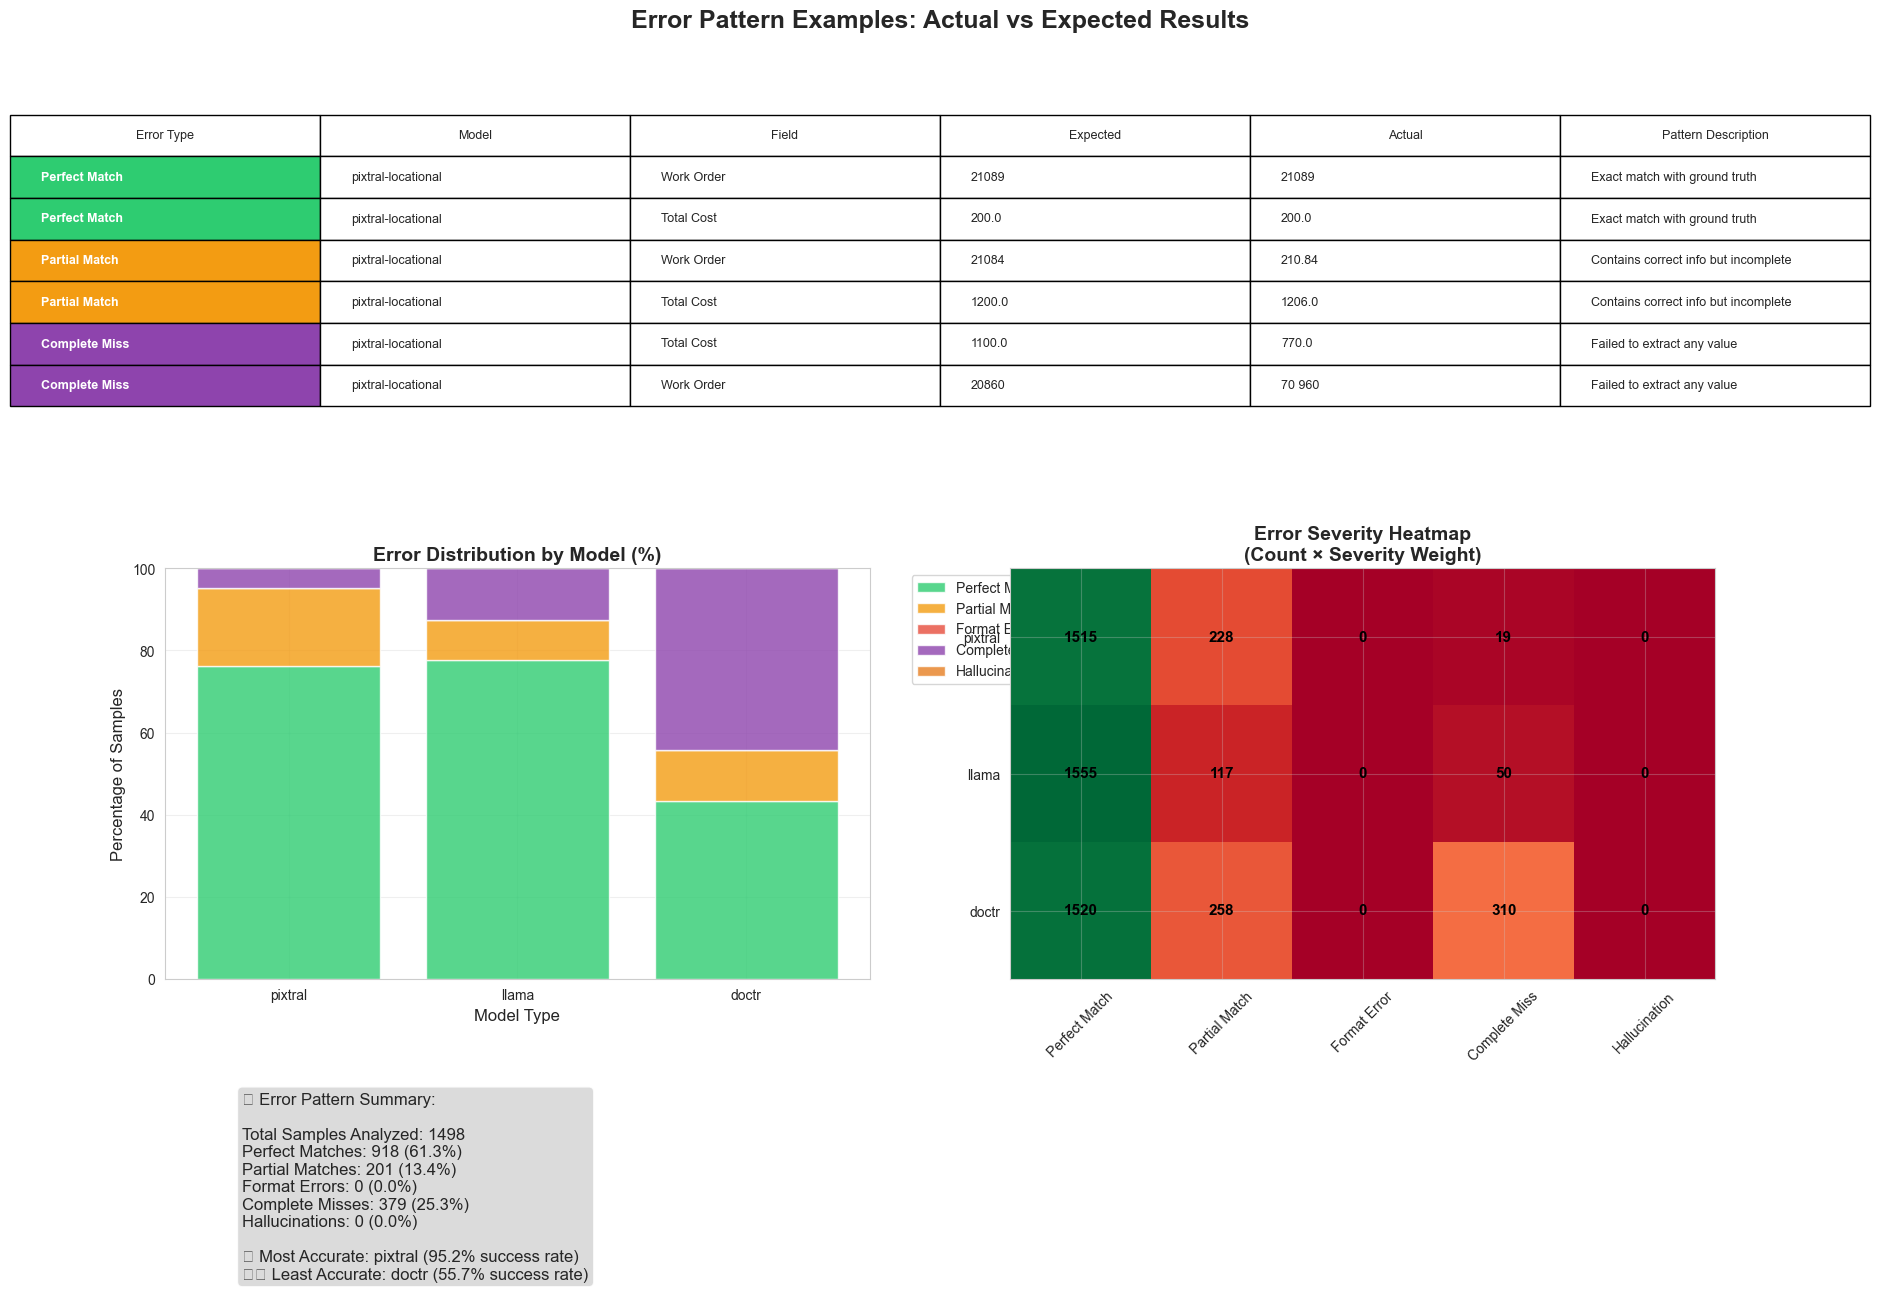

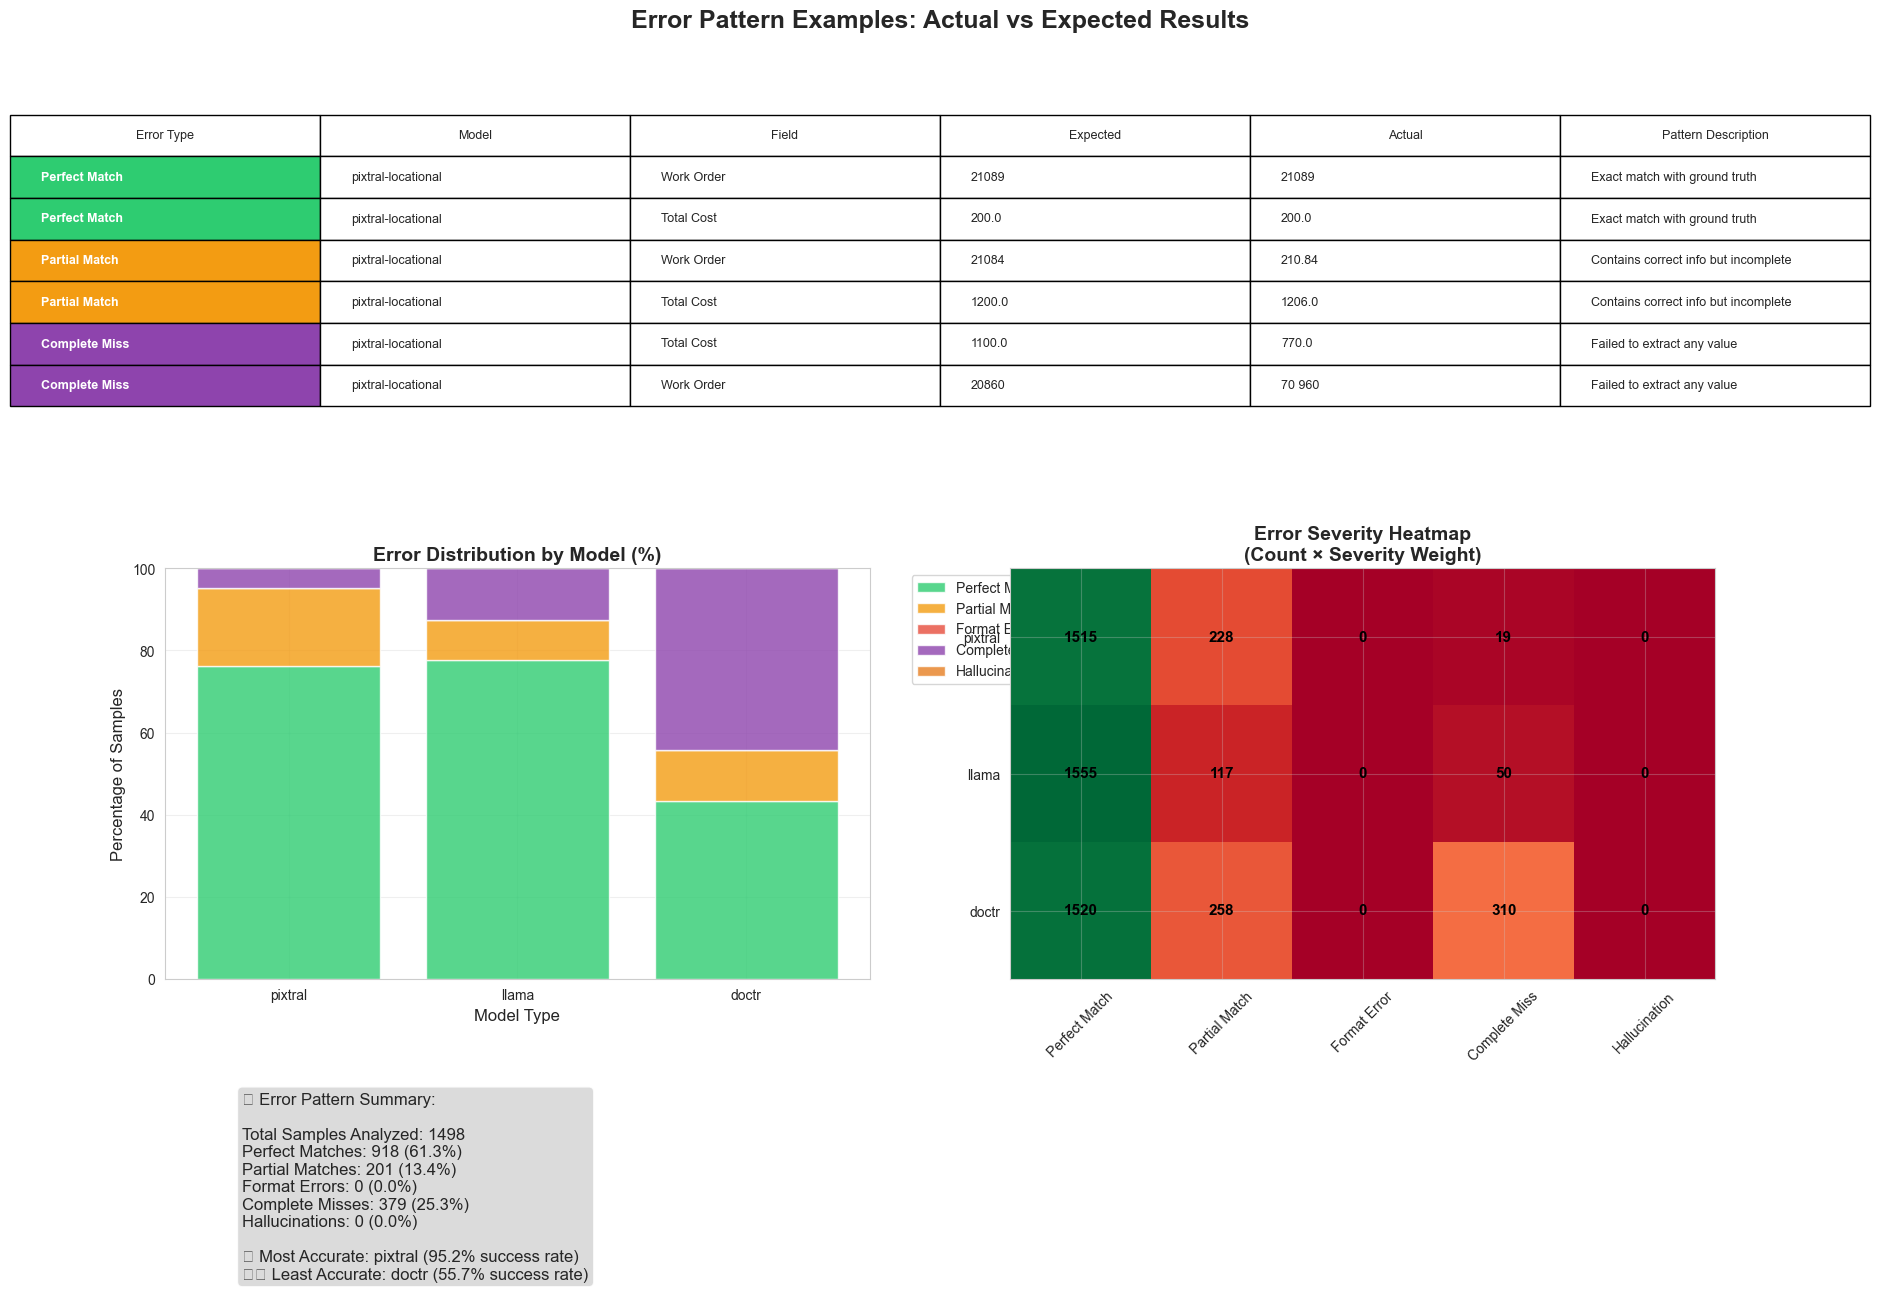

In [39]:
# Create Error Pattern Examples visualization  
# Visual examples of each error category with actual vs. expected results

def analyze_error_patterns(comprehensive_dataset):
    """Analyze and categorize different types of errors from the extracted data."""
    error_examples = {
        'perfect_match': [],
        'partial_match': [],
        'format_error': [],
        'complete_miss': [],
        'hallucination': []
    }
    
    model_error_stats = {}
    
    # Process all experiments
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        model_error_stats[model_type] = {
            'perfect_match': 0,
            'partial_match': 0,
            'format_error': 0,
            'complete_miss': 0,
            'hallucination': 0,
            'total_samples': 0
        }
        
        for experiment in experiments:
            if 'extracted_data' in experiment:
                extracted_data_list = experiment['extracted_data']
                
                # Get model identifier for context
                model_id = model_type
                if 'metadata' in experiment:
                    if model_type in ['pixtral', 'llama'] and 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type}-{prompt_type}"
                    elif model_type == 'doctr' and 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                            model_id = f"doctr-{recognition_model}"
                
                # Process each extraction item
                for item in extracted_data_list:
                    if isinstance(item, dict) and 'ground_truth' in item and 'extracted_data' in item:
                        image_name = item.get('image_name', 'unknown')
                        ground_truth = item['ground_truth']
                        extracted = item['extracted_data']
                        
                        # Analyze Work Order field
                        if 'work_order_number' in ground_truth and 'work_order_number' in extracted:
                            actual_wo = extracted['work_order_number'] or ''
                            expected_wo = ground_truth['work_order_number'] or ''
                            
                            error_type, confidence = categorize_error(actual_wo, expected_wo)
                            model_error_stats[model_type][error_type] += 1
                            model_error_stats[model_type]['total_samples'] += 1
                            
                            # Store examples for visualization (limit per category)
                            if len(error_examples[error_type]) < 5:
                                error_examples[error_type].append({
                                    'model': model_id,
                                    'image': image_name,
                                    'field': 'Work Order',
                                    'actual': str(actual_wo),
                                    'expected': str(expected_wo),
                                    'confidence': confidence
                                })
                        
                        # Analyze Total Cost field
                        if 'total_cost' in ground_truth and 'total_cost' in extracted:
                            actual_tc = extracted['total_cost'] or ''
                            expected_tc = ground_truth['total_cost'] or ''
                            
                            error_type, confidence = categorize_error(actual_tc, expected_tc)
                            model_error_stats[model_type][error_type] += 1
                            model_error_stats[model_type]['total_samples'] += 1
                            
                            # Store examples for visualization
                            if len(error_examples[error_type]) < 5:
                                error_examples[error_type].append({
                                    'model': model_id,
                                    'image': image_name,
                                    'field': 'Total Cost',
                                    'actual': str(actual_tc),
                                    'expected': str(expected_tc),
                                    'confidence': confidence
                                })
    
    return error_examples, model_error_stats

def categorize_error(actual, expected):
    """Categorize the type of error and return confidence score."""
    # Handle None values
    actual = str(actual) if actual is not None else ''
    expected = str(expected) if expected is not None else ''
    
    # Clean and normalize strings for comparison
    actual_clean = actual.strip().lower()
    expected_clean = expected.strip().lower()
    
    # Perfect match
    if actual_clean == expected_clean:
        return 'perfect_match', 1.0
    
    # Complete miss - no extraction when ground truth exists
    if not actual_clean and expected_clean:
        return 'complete_miss', 1.0
    
    # Hallucination - extraction when no ground truth exists
    if actual_clean and not expected_clean:
        return 'hallucination', 1.0
    
    # Both empty
    if not actual_clean and not expected_clean:
        return 'perfect_match', 1.0
    
    # Check for partial matches (substring matching)
    if actual_clean in expected_clean or expected_clean in actual_clean:
        # Calculate overlap ratio
        shorter = min(len(actual_clean), len(expected_clean))
        longer = max(len(actual_clean), len(expected_clean))
        if shorter > 0:
            overlap_ratio = shorter / longer
            return 'partial_match', overlap_ratio
    
    # Check for format errors (same numbers, different format)
    import re
    actual_numbers = re.findall(r'\d+\.?\d*', actual_clean)
    expected_numbers = re.findall(r'\d+\.?\d*', expected_clean)
    
    if actual_numbers and expected_numbers:
        try:
            # Convert to numbers for comparison
            actual_nums = [float(n) for n in actual_numbers]
            expected_nums = [float(n) for n in expected_numbers]
            
            if len(actual_nums) == len(expected_nums):
                matches = sum(1 for a, e in zip(actual_nums, expected_nums) if abs(a - e) < 0.01)
                if matches == len(actual_nums):
                    return 'format_error', 0.8
        except ValueError:
            pass
    
    # Check for character-level similarity
    common_chars = set(actual_clean) & set(expected_clean)
    all_chars = set(actual_clean) | set(expected_clean)
    
    if len(all_chars) > 0:
        similarity = len(common_chars) / len(all_chars)
        if similarity > 0.5:
            return 'partial_match', similarity
    
    # Default to complete miss if no patterns match
    return 'complete_miss', 0.0

def plot_error_pattern_examples(error_examples, model_error_stats):
    """Create visualization showing error pattern examples."""
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(3, 2, height_ratios=[2, 2, 1], hspace=0.3, wspace=0.2)
    
    # Define colors for error types
    error_colors = {
        'perfect_match': '#2ECC71',    # Green
        'partial_match': '#F39C12',    # Orange  
        'format_error': '#E74C3C',     # Red
        'complete_miss': '#8E44AD',    # Purple
        'hallucination': '#E67E22'     # Dark Orange
    }
    
    # Plot 1: Error Examples Table
    ax1 = fig.add_subplot(gs[0, :])
    ax1.axis('off')
    ax1.set_title('Error Pattern Examples: Actual vs Expected Results', 
                  fontsize=18, fontweight='bold', pad=20)
    
    # Create table data
    table_data = []
    headers = ['Error Type', 'Model', 'Field', 'Expected', 'Actual', 'Pattern Description']
    
    for error_type, examples in error_examples.items():
        if examples:
            # Sort by confidence and take top examples
            examples_sorted = sorted(examples, key=lambda x: x.get('confidence', 0), reverse=True)
            for example in examples_sorted[:2]:  # Show top 2 examples per type
                pattern_desc = get_error_pattern_description(error_type)
                
                # Truncate long values for display
                expected_display = str(example['expected'])
                actual_display = str(example['actual'])
                
                if len(expected_display) > 25:
                    expected_display = expected_display[:22] + '...'
                if len(actual_display) > 25:
                    actual_display = actual_display[:22] + '...'
                
                table_data.append([
                    error_type.replace('_', ' ').title(),
                    example['model'],
                    example['field'],
                    expected_display,
                    actual_display,
                    pattern_desc
                ])
    
    if table_data:
        table = ax1.table(cellText=table_data, colLabels=headers, loc='center', cellLoc='left')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 2.5)
        
        # Color code by error type
        for i, row in enumerate(table_data):
            error_type_key = row[0].lower().replace(' ', '_')
            if error_type_key in error_colors:
                table[(i+1, 0)].set_facecolor(error_colors[error_type_key])
                table[(i+1, 0)].set_text_props(weight='bold', color='white')
    else:
        ax1.text(0.5, 0.5, 'No error examples found in the data', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=16)
    
    # Plot 2: Error Distribution by Model
    ax2 = fig.add_subplot(gs[1, 0])
    
    models = [model for model in model_error_stats.keys() if model_error_stats[model]['total_samples'] > 0]
    error_types = ['perfect_match', 'partial_match', 'format_error', 'complete_miss', 'hallucination']
    
    if models:
        # Calculate percentages for each model
        model_percentages = {}
        for model in models:
            total = model_error_stats[model]['total_samples']
            if total > 0:
                model_percentages[model] = {
                    error_type: (model_error_stats[model][error_type] / total) * 100
                    for error_type in error_types
                }
        
        # Create stacked bar chart
        bottom = np.zeros(len(models))
        for error_type in error_types:
            percentages = [model_percentages.get(model, {}).get(error_type, 0) for model in models]
            ax2.bar(models, percentages, bottom=bottom, label=error_type.replace('_', ' ').title(),
                    color=error_colors[error_type], alpha=0.8)
            bottom += percentages
        
        ax2.set_title('Error Distribution by Model (%)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Percentage of Samples', fontsize=12)
        ax2.set_xlabel('Model Type', fontsize=12)
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(axis='y', alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No model data available', ha='center', va='center', 
                transform=ax2.transAxes, fontsize=14)
    
    # Plot 3: Error Severity Heatmap
    ax3 = fig.add_subplot(gs[1, 1])
    
    if models:
        # Create severity matrix
        severity_scores = {
            'perfect_match': 5,
            'partial_match': 3,
            'format_error': 2, 
            'complete_miss': 1,
            'hallucination': 0
        }
        
        heatmap_data = []
        for model in models:
            row = []
            for error_type in error_types:
                count = model_error_stats[model][error_type]
                severity = severity_scores[error_type]
                weighted_score = count * severity
                row.append(weighted_score)
            heatmap_data.append(row)
        
        heatmap_array = np.array(heatmap_data)
        if heatmap_array.size > 0:
            im = ax3.imshow(heatmap_array, cmap='RdYlGn', aspect='auto')
            
            # Add text annotations
            for i in range(len(models)):
                for j in range(len(error_types)):
                    text = ax3.text(j, i, f'{heatmap_array[i, j]:.0f}',
                                   ha="center", va="center", color="black", fontweight='bold')
            
            ax3.set_xticks(np.arange(len(error_types)))
            ax3.set_yticks(np.arange(len(models)))
            ax3.set_xticklabels([et.replace('_', ' ').title() for et in error_types], rotation=45)
            ax3.set_yticklabels(models)
            ax3.set_title('Error Severity Heatmap\n(Count × Severity Weight)', fontsize=14, fontweight='bold')
    else:
        ax3.text(0.5, 0.5, 'No heatmap data available', ha='center', va='center', 
                transform=ax3.transAxes, fontsize=14)
    
    # Plot 4: Summary Statistics
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    # Calculate overall statistics
    summary_text = "📊 Error Pattern Summary:\n\n"
    
    if models:
        total_samples = sum(model_error_stats[model]['total_samples'] for model in models)
        overall_stats = {error_type: 0 for error_type in error_types}
        
        for model in models:
            for error_type in error_types:
                overall_stats[error_type] += model_error_stats[model][error_type]
        
        summary_text += f"Total Samples Analyzed: {total_samples}\n"
        if total_samples > 0:
            summary_text += f"Perfect Matches: {overall_stats['perfect_match']} ({overall_stats['perfect_match']/total_samples*100:.1f}%)\n"
            summary_text += f"Partial Matches: {overall_stats['partial_match']} ({overall_stats['partial_match']/total_samples*100:.1f}%)\n"
            summary_text += f"Format Errors: {overall_stats['format_error']} ({overall_stats['format_error']/total_samples*100:.1f}%)\n"
            summary_text += f"Complete Misses: {overall_stats['complete_miss']} ({overall_stats['complete_miss']/total_samples*100:.1f}%)\n"
            summary_text += f"Hallucinations: {overall_stats['hallucination']} ({overall_stats['hallucination']/total_samples*100:.1f}%)\n\n"
        
        # Find best and worst models
        success_rates = {}
        for model in models:
            stats = model_error_stats[model]
            if stats['total_samples'] > 0:
                success_rate = (stats['perfect_match'] + stats['partial_match']) / stats['total_samples']
                success_rates[model] = success_rate
        
        if success_rates:
            best_model = max(success_rates, key=success_rates.get)
            worst_model = min(success_rates, key=success_rates.get)
            summary_text += f"🏆 Most Accurate: {best_model} ({success_rates[best_model]*100:.1f}% success rate)\n"
            summary_text += f"⚠️ Least Accurate: {worst_model} ({success_rates[worst_model]*100:.1f}% success rate)"
    else:
        summary_text += "No data available for analysis."
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return fig

def get_error_pattern_description(error_type):
    """Get description of error pattern."""
    descriptions = {
        'perfect_match': 'Exact match with ground truth',
        'partial_match': 'Contains correct info but incomplete',
        'format_error': 'Correct value, wrong format',
        'complete_miss': 'Failed to extract any value',
        'hallucination': 'Extracted non-existent information'
    }
    return descriptions.get(error_type, 'Unknown error type')

# Execute the analysis
print("🔍 Analyzing Error Patterns and Examples...")
error_examples, model_error_stats = analyze_error_patterns(COMPREHENSIVE_DATASET)
plot_error_pattern_examples(error_examples, model_error_stats)

In [16]:
# Create Post-Processing Opportunity Assessment
# Estimate potential accuracy improvements for each error type


*Placeholder for identification of patterns that could be addressed through post-processing.*


### Cell 3.2: Error Classification System


In [17]:
# Create Error Type Distribution Pie Charts
# Separate charts for Work Order vs. Total Cost errors


In [18]:
# Create Error Frequency Heatmap
# Error types (rows) × Models (columns)


*Placeholder for categorization and quantification of different types of failures.*


### Cell 3.3: Failure Mode Deep Dive


In [19]:
# Create Failure Severity Distribution
# Histogram of error magnitudes


In [20]:
# Create Model Robustness Comparison
# How models handle edge cases


*Placeholder for understanding catastrophic vs. graceful degradation patterns.*


## Section 4: Prompt Engineering Effectiveness Analysis


### Cell 4.1: Prompt Strategy Performance


🔍 Creating Prompt Performance Matrix...


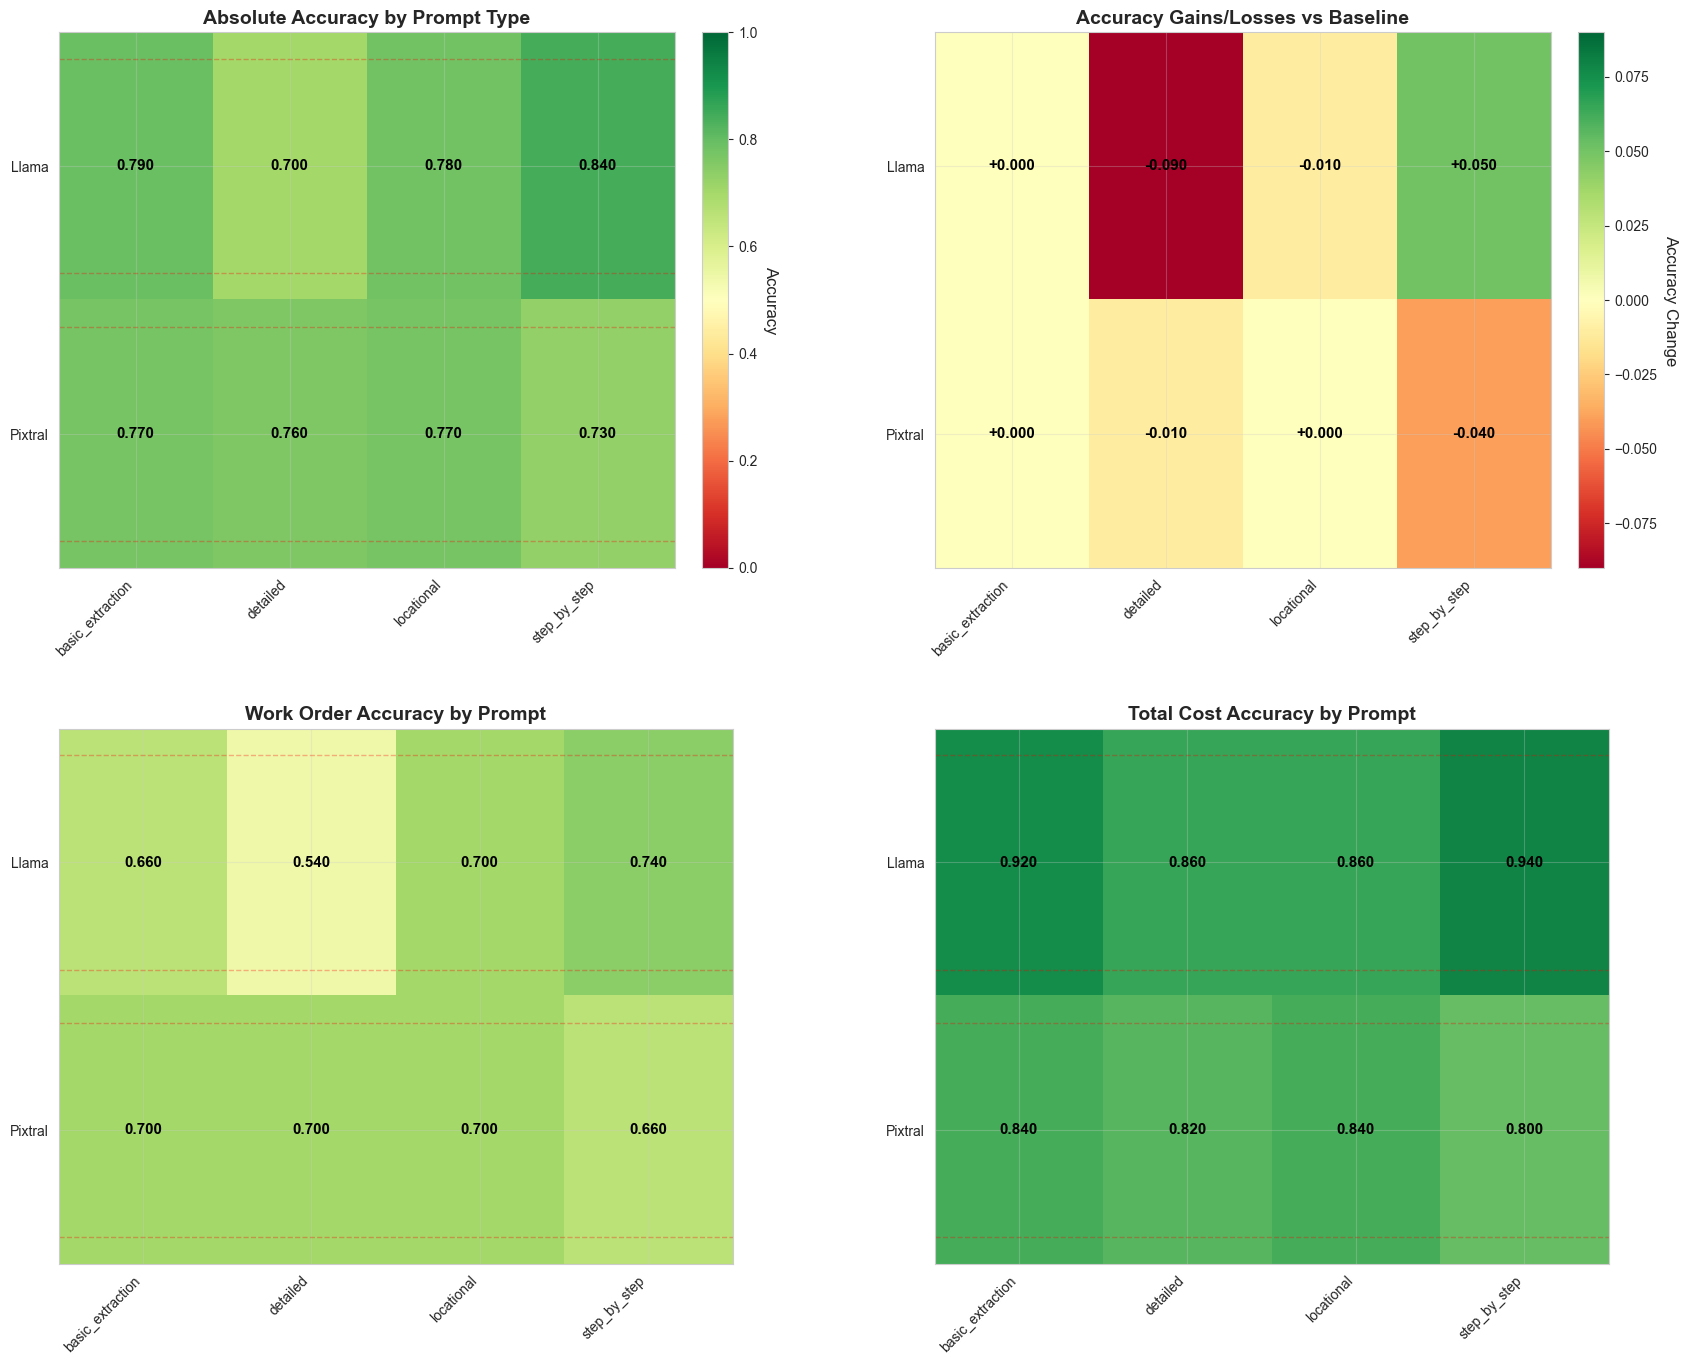


📊 Prompt Performance Analysis:

LLAMA MODEL:
------------------------------
  step_by_step:
    Overall: 0.840 (📈 +0.050)
    Work Order: 0.740
    Total Cost: 0.940
  basic_extraction:
    Overall: 0.790 (➡️ +0.000)
    Work Order: 0.660
    Total Cost: 0.920
  locational:
    Overall: 0.780 (📉 -0.010)
    Work Order: 0.700
    Total Cost: 0.860
  detailed:
    Overall: 0.700 (📉 -0.090)
    Work Order: 0.540
    Total Cost: 0.860

PIXTRAL MODEL:
------------------------------
  locational:
    Overall: 0.770 (➡️ +0.000)
    Work Order: 0.700
    Total Cost: 0.840
  basic_extraction:
    Overall: 0.770 (➡️ +0.000)
    Work Order: 0.700
    Total Cost: 0.840
  detailed:
    Overall: 0.760 (📉 -0.010)
    Work Order: 0.700
    Total Cost: 0.820
  step_by_step:
    Overall: 0.730 (📉 -0.040)
    Work Order: 0.660
    Total Cost: 0.800

🎯 Best Prompt Strategies:
------------------------------
  Llama: step_by_step (0.840)
  Pixtral: locational (0.770)

📋 Best Prompts by Field:
  Work Order:

In [40]:
# Create Prompt Performance Matrix
# Accuracy gains/losses by prompt type across models

def create_prompt_performance_matrix(comprehensive_dataset):
    """Create matrix showing how different prompts affect model performance."""
    
    # Initialize data structures
    prompt_performance = {}
    baseline_performance = {}
    
    # Process LMM models only (pixtral and llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            prompt_performance[model_type] = {}
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                    
                    # Get accuracy data
                    summary = experiment['summary']
                    if prompt_type and 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        # Calculate overall accuracy (average of both fields)
                        overall_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        
                        # Store individual field accuracies too
                        prompt_performance[model_type][prompt_type] = {
                            'overall_accuracy': overall_accuracy,
                            'work_order_accuracy': summary['work_order_accuracy'],
                            'total_cost_accuracy': summary['total_cost_accuracy'],
                            'work_order_cer': summary.get('average_cer', 0),  # CER if available
                        }
    
    # Calculate baseline (use basic_extraction as baseline, or first available prompt)
    for model_type in prompt_performance:
        if 'basic_extraction' in prompt_performance[model_type]:
            baseline_performance[model_type] = prompt_performance[model_type]['basic_extraction']['overall_accuracy']
        elif prompt_performance[model_type]:  # Use first available if basic_extraction not found
            first_prompt = list(prompt_performance[model_type].keys())[0]
            baseline_performance[model_type] = prompt_performance[model_type][first_prompt]['overall_accuracy']
        else:
            baseline_performance[model_type] = 0
    
    return prompt_performance, baseline_performance

def plot_prompt_performance_matrix(prompt_performance, baseline_performance):
    """Create visualization showing prompt performance matrix."""
    
    if not prompt_performance:
        print("No prompt performance data available")
        return
    
    # Get all unique prompt types across all models
    all_prompts = set()
    for model_data in prompt_performance.values():
        all_prompts.update(model_data.keys())
    all_prompts = sorted(list(all_prompts))
    
    models = sorted(prompt_performance.keys())
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.3, wspace=0.3)
    
    # Plot 1: Absolute Accuracy Matrix
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Create accuracy matrix
    accuracy_matrix = []
    for model in models:
        row = []
        for prompt in all_prompts:
            if prompt in prompt_performance[model]:
                accuracy = prompt_performance[model][prompt]['overall_accuracy']
                row.append(accuracy)
            else:
                row.append(np.nan)
        accuracy_matrix.append(row)
    
    accuracy_array = np.array(accuracy_matrix)
    
    # Create heatmap
    im1 = ax1.imshow(accuracy_array, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Add text annotations
    for i in range(len(models)):
        for j in range(len(all_prompts)):
            if not np.isnan(accuracy_array[i, j]):
                text = ax1.text(j, i, f'{accuracy_array[i, j]:.3f}',
                               ha="center", va="center", color="black", fontweight='bold')
    
    ax1.set_xticks(np.arange(len(all_prompts)))
    ax1.set_yticks(np.arange(len(models)))
    ax1.set_xticklabels(all_prompts, rotation=45, ha='right')
    ax1.set_yticklabels([m.title() for m in models])
    ax1.set_title('Absolute Accuracy by Prompt Type', fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label('Accuracy', rotation=270, labelpad=15)
    
    # Plot 2: Accuracy Gains/Losses vs Baseline
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Calculate gains/losses relative to baseline
    gains_matrix = []
    for model in models:
        baseline = baseline_performance.get(model, 0)
        row = []
        for prompt in all_prompts:
            if prompt in prompt_performance[model]:
                accuracy = prompt_performance[model][prompt]['overall_accuracy']
                gain = accuracy - baseline
                row.append(gain)
            else:
                row.append(np.nan)
        gains_matrix.append(row)
    
    gains_array = np.array(gains_matrix)
    
    # Create diverging heatmap (gains in green, losses in red)
    max_abs_gain = np.nanmax(np.abs(gains_array))
    im2 = ax2.imshow(gains_array, cmap='RdYlGn', aspect='auto', 
                     vmin=-max_abs_gain, vmax=max_abs_gain)
    
    # Add text annotations
    for i in range(len(models)):
        for j in range(len(all_prompts)):
            if not np.isnan(gains_array[i, j]):
                gain_val = gains_array[i, j]
                sign = '+' if gain_val >= 0 else ''
                text = ax2.text(j, i, f'{sign}{gain_val:.3f}',
                               ha="center", va="center", color="black", fontweight='bold')
    
    ax2.set_xticks(np.arange(len(all_prompts)))
    ax2.set_yticks(np.arange(len(models)))
    ax2.set_xticklabels(all_prompts, rotation=45, ha='right')
    ax2.set_yticklabels([m.title() for m in models])
    ax2.set_title('Accuracy Gains/Losses vs Baseline', fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.set_label('Accuracy Change', rotation=270, labelpad=15)
    
    # Plot 3: Field-Specific Performance (Work Order)
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Create work order accuracy matrix
    wo_matrix = []
    for model in models:
        row = []
        for prompt in all_prompts:
            if prompt in prompt_performance[model]:
                wo_accuracy = prompt_performance[model][prompt]['work_order_accuracy']
                row.append(wo_accuracy)
            else:
                row.append(np.nan)
        wo_matrix.append(row)
    
    wo_array = np.array(wo_matrix)
    im3 = ax3.imshow(wo_array, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Add text annotations
    for i in range(len(models)):
        for j in range(len(all_prompts)):
            if not np.isnan(wo_array[i, j]):
                text = ax3.text(j, i, f'{wo_array[i, j]:.3f}',
                               ha="center", va="center", color="black", fontweight='bold')
    
    ax3.set_xticks(np.arange(len(all_prompts)))
    ax3.set_yticks(np.arange(len(models)))
    ax3.set_xticklabels(all_prompts, rotation=45, ha='right')
    ax3.set_yticklabels([m.title() for m in models])
    ax3.set_title('Work Order Accuracy by Prompt', fontsize=14, fontweight='bold')
    
    # Plot 4: Field-Specific Performance (Total Cost)
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Create total cost accuracy matrix
    tc_matrix = []
    for model in models:
        row = []
        for prompt in all_prompts:
            if prompt in prompt_performance[model]:
                tc_accuracy = prompt_performance[model][prompt]['total_cost_accuracy']
                row.append(tc_accuracy)
            else:
                row.append(np.nan)
        tc_matrix.append(row)
    
    tc_array = np.array(tc_matrix)
    im4 = ax4.imshow(tc_array, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Add text annotations
    for i in range(len(models)):
        for j in range(len(all_prompts)):
            if not np.isnan(tc_array[i, j]):
                text = ax4.text(j, i, f'{tc_array[i, j]:.3f}',
                               ha="center", va="center", color="black", fontweight='bold')
    
    ax4.set_xticks(np.arange(len(all_prompts)))
    ax4.set_yticks(np.arange(len(models)))
    ax4.set_xticklabels(all_prompts, rotation=45, ha='right')
    ax4.set_yticklabels([m.title() for m in models])
    ax4.set_title('Total Cost Accuracy by Prompt', fontsize=14, fontweight='bold')
    
    # Add 85% reference lines to absolute accuracy plots
    for ax in [ax1, ax3, ax4]:
        # Add horizontal lines at 85%
        for i in range(len(models)):
            ax.axhline(y=i-0.4, color='red', linestyle='--', alpha=0.3, linewidth=1)
            ax.axhline(y=i+0.4, color='red', linestyle='--', alpha=0.3, linewidth=1)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n📊 Prompt Performance Analysis:")
    print("=" * 70)
    
    for model in models:
        print(f"\n{model.upper()} MODEL:")
        print("-" * 30)
        
        model_data = prompt_performance[model]
        baseline = baseline_performance[model]
        
        # Sort prompts by overall accuracy
        sorted_prompts = sorted(model_data.items(), 
                               key=lambda x: x[1]['overall_accuracy'], reverse=True)
        
        for prompt, perf in sorted_prompts:
            gain = perf['overall_accuracy'] - baseline
            gain_symbol = '📈' if gain > 0 else '📉' if gain < 0 else '➡️'
            
            print(f"  {prompt}:")
            print(f"    Overall: {perf['overall_accuracy']:.3f} ({gain_symbol} {gain:+.3f})")
            print(f"    Work Order: {perf['work_order_accuracy']:.3f}")
            print(f"    Total Cost: {perf['total_cost_accuracy']:.3f}")
    
    # Find best prompt strategies
    print(f"\n🎯 Best Prompt Strategies:")
    print("-" * 30)
    
    # Best overall prompts per model
    for model in models:
        model_data = prompt_performance[model]
        if model_data:
            best_prompt = max(model_data.items(), key=lambda x: x[1]['overall_accuracy'])
            print(f"  {model.title()}: {best_prompt[0]} ({best_prompt[1]['overall_accuracy']:.3f})")
    
    # Best prompts by field
    print(f"\n📋 Best Prompts by Field:")
    for field in ['work_order_accuracy', 'total_cost_accuracy']:
        field_name = field.replace('_accuracy', '').replace('_', ' ').title()
        print(f"  {field_name}:")
        
        for model in models:
            model_data = prompt_performance[model]
            if model_data:
                best_field_prompt = max(model_data.items(), key=lambda x: x[1][field])
                print(f"    {model.title()}: {best_field_prompt[0]} ({best_field_prompt[1][field]:.3f})")
    
    # Prompt consistency analysis
    print(f"\n⚖️ Prompt Consistency Analysis:")
    print("-" * 30)
    
    for prompt in all_prompts:
        accuracies = []
        for model in models:
            if prompt in prompt_performance[model]:
                accuracies.append(prompt_performance[model][prompt]['overall_accuracy'])
        
        if len(accuracies) > 1:
            mean_acc = np.mean(accuracies)
            std_acc = np.std(accuracies)
            cv = std_acc / mean_acc if mean_acc > 0 else 0
            
            consistency = "High" if cv < 0.1 else "Medium" if cv < 0.2 else "Low"
            print(f"  {prompt}: Avg={mean_acc:.3f}, Std={std_acc:.3f}, Consistency={consistency}")

# Execute the analysis
print("🔍 Creating Prompt Performance Matrix...")
prompt_performance, baseline_performance = create_prompt_performance_matrix(COMPREHENSIVE_DATASET)
plot_prompt_performance_matrix(prompt_performance, baseline_performance)

🔍 Creating Prompt-Model Interaction Effects...


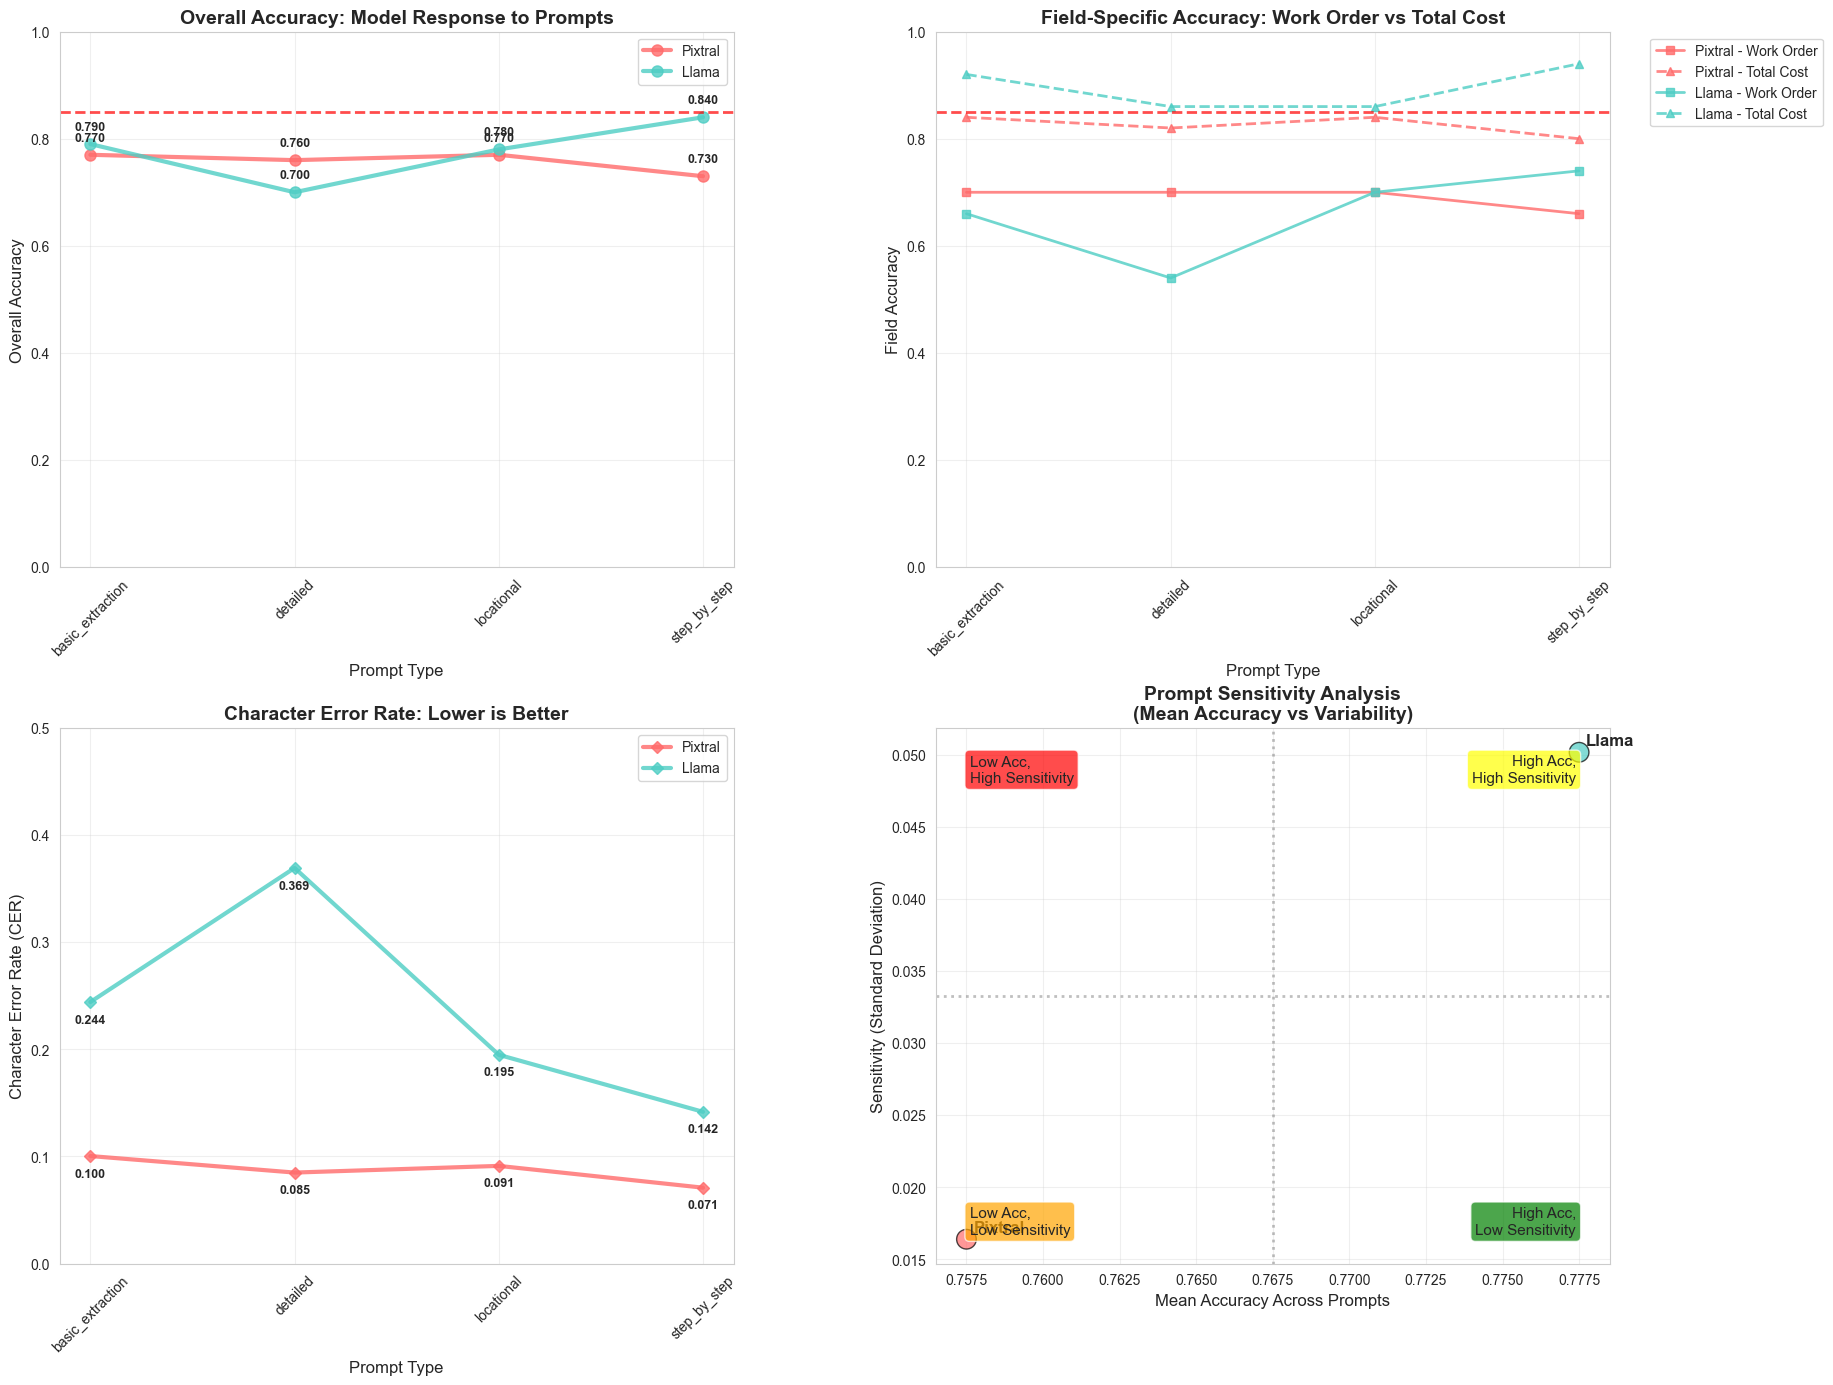


📊 Prompt-Model Interaction Analysis:

🎯 Prompt Effectiveness Ranking:
----------------------------------------
  1. step_by_step: 0.785 ± 0.055 (Consistency: Medium)
  2. basic_extraction: 0.780 ± 0.010 (Consistency: High)
  3. locational: 0.775 ± 0.005 (Consistency: High)
  4. detailed: 0.730 ± 0.030 (Consistency: High)

📈 Model Sensitivity to Prompts:
----------------------------------------
  Pixtral:
    Mean Accuracy: 0.757
    Sensitivity (Std Dev): 0.016
    Coefficient of Variation: 0.022
    Sensitivity Level: Low
  Llama:
    Mean Accuracy: 0.778
    Sensitivity (Std Dev): 0.050
    Coefficient of Variation: 0.065
    Sensitivity Level: Medium

🏆 Best Prompt-Model Combinations:
----------------------------------------
  1. Llama-step_by_step: 0.840
  2. Llama-basic_extraction: 0.790
  3. Llama-locational: 0.780
  4. Pixtral-locational: 0.770
  5. Pixtral-basic_extraction: 0.770

🔍 Key Interaction Insights:
----------------------------------------
  'detailed' works 0.060 bet

In [41]:
# Create Prompt-Model Interaction Effects  
# Line graphs showing how each model responds to different prompts

def create_prompt_model_interaction_data(comprehensive_dataset):
    """Create data structure for prompt-model interaction analysis."""
    
    interaction_data = {
        'overall_accuracy': {},
        'work_order_accuracy': {},
        'total_cost_accuracy': {},
        'cer_data': {}
    }
    
    # Process LMM models only (pixtral and llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            # Initialize model data
            for metric in interaction_data:
                interaction_data[metric][model_type] = {}
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                    
                    # Get performance data
                    summary = experiment['summary']
                    if prompt_type and 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        # Store accuracy data
                        wo_acc = summary['work_order_accuracy']
                        tc_acc = summary['total_cost_accuracy']
                        overall_acc = (wo_acc + tc_acc) / 2
                        cer = summary.get('average_cer', 0)
                        
                        interaction_data['overall_accuracy'][model_type][prompt_type] = overall_acc
                        interaction_data['work_order_accuracy'][model_type][prompt_type] = wo_acc
                        interaction_data['total_cost_accuracy'][model_type][prompt_type] = tc_acc
                        interaction_data['cer_data'][model_type][prompt_type] = cer
    
    return interaction_data

def plot_prompt_model_interactions(interaction_data):
    """Create line graphs showing prompt-model interaction effects."""
    
    if not interaction_data['overall_accuracy']:
        print("No interaction data available")
        return
    
    # Get all models and prompts
    models = list(interaction_data['overall_accuracy'].keys())
    all_prompts = set()
    for model_data in interaction_data['overall_accuracy'].values():
        all_prompts.update(model_data.keys())
    all_prompts = sorted(list(all_prompts))
    
    # Define colors for models
    model_colors = {
        'pixtral': '#FF6B6B',  # Red
        'llama': '#4ECDC4'     # Teal
    }
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Overall Accuracy Interaction
    ax1 = fig.add_subplot(gs[0, 0])
    
    for model in models:
        model_data = interaction_data['overall_accuracy'][model]
        prompts = []
        accuracies = []
        
        for prompt in all_prompts:
            if prompt in model_data:
                prompts.append(prompt)
                accuracies.append(model_data[prompt])
        
        if prompts and accuracies:
            ax1.plot(prompts, accuracies, marker='o', linewidth=3, markersize=8,
                    color=model_colors.get(model, '#999999'), label=model.title(),
                    alpha=0.8)
            
            # Add value annotations
            for i, (prompt, acc) in enumerate(zip(prompts, accuracies)):
                ax1.annotate(f'{acc:.3f}', (i, acc), textcoords="offset points",
                           xytext=(0,10), ha='center', fontsize=9, fontweight='bold')
    
    ax1.set_title('Overall Accuracy: Model Response to Prompts', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Prompt Type', fontsize=12)
    ax1.set_ylabel('Overall Accuracy', fontsize=12)
    ax1.set_ylim(0, 1.0)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # Add 85% reference line
    ax1.axhline(y=0.85, color='red', linestyle='--', alpha=0.7, label='Industry Standard (85%)')
    
    # Plot 2: Field-Specific Comparison (Work Order vs Total Cost)
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Create separate lines for each field
    for model in models:
        wo_data = interaction_data['work_order_accuracy'][model]
        tc_data = interaction_data['total_cost_accuracy'][model]
        
        wo_prompts, wo_accuracies = [], []
        tc_prompts, tc_accuracies = [], []
        
        for prompt in all_prompts:
            if prompt in wo_data:
                wo_prompts.append(prompt)
                wo_accuracies.append(wo_data[prompt])
            if prompt in tc_data:
                tc_prompts.append(prompt)
                tc_accuracies.append(tc_data[prompt])
        
        if wo_prompts and wo_accuracies:
            ax2.plot(wo_prompts, wo_accuracies, marker='s', linewidth=2, markersize=6,
                    color=model_colors.get(model, '#999999'), linestyle='-',
                    label=f'{model.title()} - Work Order', alpha=0.8)
        
        if tc_prompts and tc_accuracies:
            ax2.plot(tc_prompts, tc_accuracies, marker='^', linewidth=2, markersize=6,
                    color=model_colors.get(model, '#999999'), linestyle='--',
                    label=f'{model.title()} - Total Cost', alpha=0.8)
    
    ax2.set_title('Field-Specific Accuracy: Work Order vs Total Cost', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Prompt Type', fontsize=12)
    ax2.set_ylabel('Field Accuracy', fontsize=12)
    ax2.set_ylim(0, 1.0)
    ax2.grid(True, alpha=0.3)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add 85% reference line
    ax2.axhline(y=0.85, color='red', linestyle='--', alpha=0.7)
    
    # Plot 3: Character Error Rate (CER) Trends
    ax3 = fig.add_subplot(gs[1, 0])
    
    for model in models:
        model_cer_data = interaction_data['cer_data'][model]
        prompts = []
        cers = []
        
        for prompt in all_prompts:
            if prompt in model_cer_data:
                prompts.append(prompt)
                cers.append(model_cer_data[prompt])
        
        if prompts and cers:
            ax3.plot(prompts, cers, marker='D', linewidth=3, markersize=6,
                    color=model_colors.get(model, '#999999'), label=model.title(),
                    alpha=0.8)
            
            # Add value annotations
            for i, (prompt, cer) in enumerate(zip(prompts, cers)):
                ax3.annotate(f'{cer:.3f}', (i, cer), textcoords="offset points",
                           xytext=(0,-15), ha='center', fontsize=9, fontweight='bold')
    
    ax3.set_title('Character Error Rate: Lower is Better', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Prompt Type', fontsize=12)
    ax3.set_ylabel('Character Error Rate (CER)', fontsize=12)
    ax3.set_ylim(0, max(0.5, max([max(interaction_data['cer_data'][m].values()) 
                                  for m in models if interaction_data['cer_data'][m]])))
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.tick_params(axis='x', rotation=45)
    
    # Plot 4: Prompt Sensitivity Analysis
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Calculate prompt sensitivity (standard deviation across prompts for each model)
    sensitivity_data = {}
    for model in models:
        model_accuracies = list(interaction_data['overall_accuracy'][model].values())
        if len(model_accuracies) > 1:
            sensitivity = np.std(model_accuracies)
            mean_acc = np.mean(model_accuracies)
            sensitivity_data[model] = {
                'sensitivity': sensitivity,
                'mean_accuracy': mean_acc,
                'cv': sensitivity / mean_acc if mean_acc > 0 else 0
            }
    
    if sensitivity_data:
        models_sens = list(sensitivity_data.keys())
        sensitivities = [sensitivity_data[m]['sensitivity'] for m in models_sens]
        mean_accs = [sensitivity_data[m]['mean_accuracy'] for m in models_sens]
        
        # Create scatter plot: mean accuracy vs sensitivity
        colors_list = [model_colors.get(m, '#999999') for m in models_sens]
        scatter = ax4.scatter(mean_accs, sensitivities, s=200, c=colors_list, alpha=0.7, edgecolors='black')
        
        # Add model labels
        for i, model in enumerate(models_sens):
            ax4.annotate(model.title(), (mean_accs[i], sensitivities[i]), 
                        textcoords="offset points", xytext=(5,5), ha='left', 
                        fontsize=12, fontweight='bold')
        
        ax4.set_title('Prompt Sensitivity Analysis\n(Mean Accuracy vs Variability)', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Mean Accuracy Across Prompts', fontsize=12)
        ax4.set_ylabel('Sensitivity (Standard Deviation)', fontsize=12)
        ax4.grid(True, alpha=0.3)
        
        # Add interpretation quadrants
        mean_x = np.mean(mean_accs)
        mean_y = np.mean(sensitivities)
        ax4.axvline(x=mean_x, color='gray', linestyle=':', alpha=0.5)
        ax4.axhline(y=mean_y, color='gray', linestyle=':', alpha=0.5)
        
        # Add quadrant labels
        ax4.text(0.95, 0.95, 'High Acc,\nHigh Sensitivity', transform=ax4.transAxes, 
                ha='right', va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
        ax4.text(0.05, 0.95, 'Low Acc,\nHigh Sensitivity', transform=ax4.transAxes, 
                ha='left', va='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.7))
        ax4.text(0.95, 0.05, 'High Acc,\nLow Sensitivity', transform=ax4.transAxes, 
                ha='right', va='bottom', bbox=dict(boxstyle='round', facecolor='green', alpha=0.7))
        ax4.text(0.05, 0.05, 'Low Acc,\nLow Sensitivity', transform=ax4.transAxes, 
                ha='left', va='bottom', bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n📊 Prompt-Model Interaction Analysis:")
    print("=" * 70)
    
    # Prompt effectiveness ranking
    print(f"\n🎯 Prompt Effectiveness Ranking:")
    print("-" * 40)
    
    # Calculate average performance across models for each prompt
    prompt_averages = {}
    for prompt in all_prompts:
        prompt_accs = []
        for model in models:
            if prompt in interaction_data['overall_accuracy'][model]:
                prompt_accs.append(interaction_data['overall_accuracy'][model][prompt])
        
        if prompt_accs:
            prompt_averages[prompt] = {
                'mean': np.mean(prompt_accs),
                'std': np.std(prompt_accs),
                'count': len(prompt_accs)
            }
    
    # Sort prompts by average effectiveness
    sorted_prompts = sorted(prompt_averages.items(), key=lambda x: x[1]['mean'], reverse=True)
    
    for i, (prompt, stats) in enumerate(sorted_prompts, 1):
        consistency = "High" if stats['std'] < 0.05 else "Medium" if stats['std'] < 0.1 else "Low"
        print(f"  {i}. {prompt}: {stats['mean']:.3f} ± {stats['std']:.3f} (Consistency: {consistency})")
    
    # Model sensitivity analysis
    print(f"\n📈 Model Sensitivity to Prompts:")
    print("-" * 40)
    
    for model in models:
        model_accs = list(interaction_data['overall_accuracy'][model].values())
        if len(model_accs) > 1:
            sensitivity = np.std(model_accs)
            mean_acc = np.mean(model_accs)
            cv = sensitivity / mean_acc if mean_acc > 0 else 0
            
            sensitivity_level = "Low" if cv < 0.05 else "Medium" if cv < 0.1 else "High"
            
            print(f"  {model.title()}:")
            print(f"    Mean Accuracy: {mean_acc:.3f}")
            print(f"    Sensitivity (Std Dev): {sensitivity:.3f}")
            print(f"    Coefficient of Variation: {cv:.3f}")
            print(f"    Sensitivity Level: {sensitivity_level}")
    
    # Best prompt-model combinations
    print(f"\n🏆 Best Prompt-Model Combinations:")
    print("-" * 40)
    
    best_combinations = []
    for model in models:
        for prompt, acc in interaction_data['overall_accuracy'][model].items():
            best_combinations.append((f"{model.title()}-{prompt}", acc))
    
    best_combinations.sort(key=lambda x: x[1], reverse=True)
    
    for i, (combination, acc) in enumerate(best_combinations[:5], 1):
        print(f"  {i}. {combination}: {acc:.3f}")
    
    # Interaction insights
    print(f"\n🔍 Key Interaction Insights:")
    print("-" * 40)
    
    # Find prompts that work better for specific models
    for prompt in all_prompts:
        model_perfs = {}
        for model in models:
            if prompt in interaction_data['overall_accuracy'][model]:
                model_perfs[model] = interaction_data['overall_accuracy'][model][prompt]
        
        if len(model_perfs) > 1:
            best_model = max(model_perfs, key=model_perfs.get)
            worst_model = min(model_perfs, key=model_perfs.get)
            performance_gap = model_perfs[best_model] - model_perfs[worst_model]
            
            if performance_gap > 0.05:  # Significant difference
                print(f"  '{prompt}' works {performance_gap:.3f} better for {best_model.title()} than {worst_model.title()}")

# Execute the analysis
print("🔍 Creating Prompt-Model Interaction Effects...")
interaction_data = create_prompt_model_interaction_data(COMPREHENSIVE_DATASET)
plot_prompt_model_interactions(interaction_data)

*Placeholder for quantifying effectiveness of different prompting approaches.*


## Section 5: Field-Specific Performance Deep Dive


### Cell 5.1: Work Order vs. Total Cost Performance Differential


🔍 Creating Field Performance Comparison...


C:\Users\alden\AppData\Local\Temp\ipykernel_29032\1974177449.py:207: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(box_data, labels=labels, patch_artist=True)


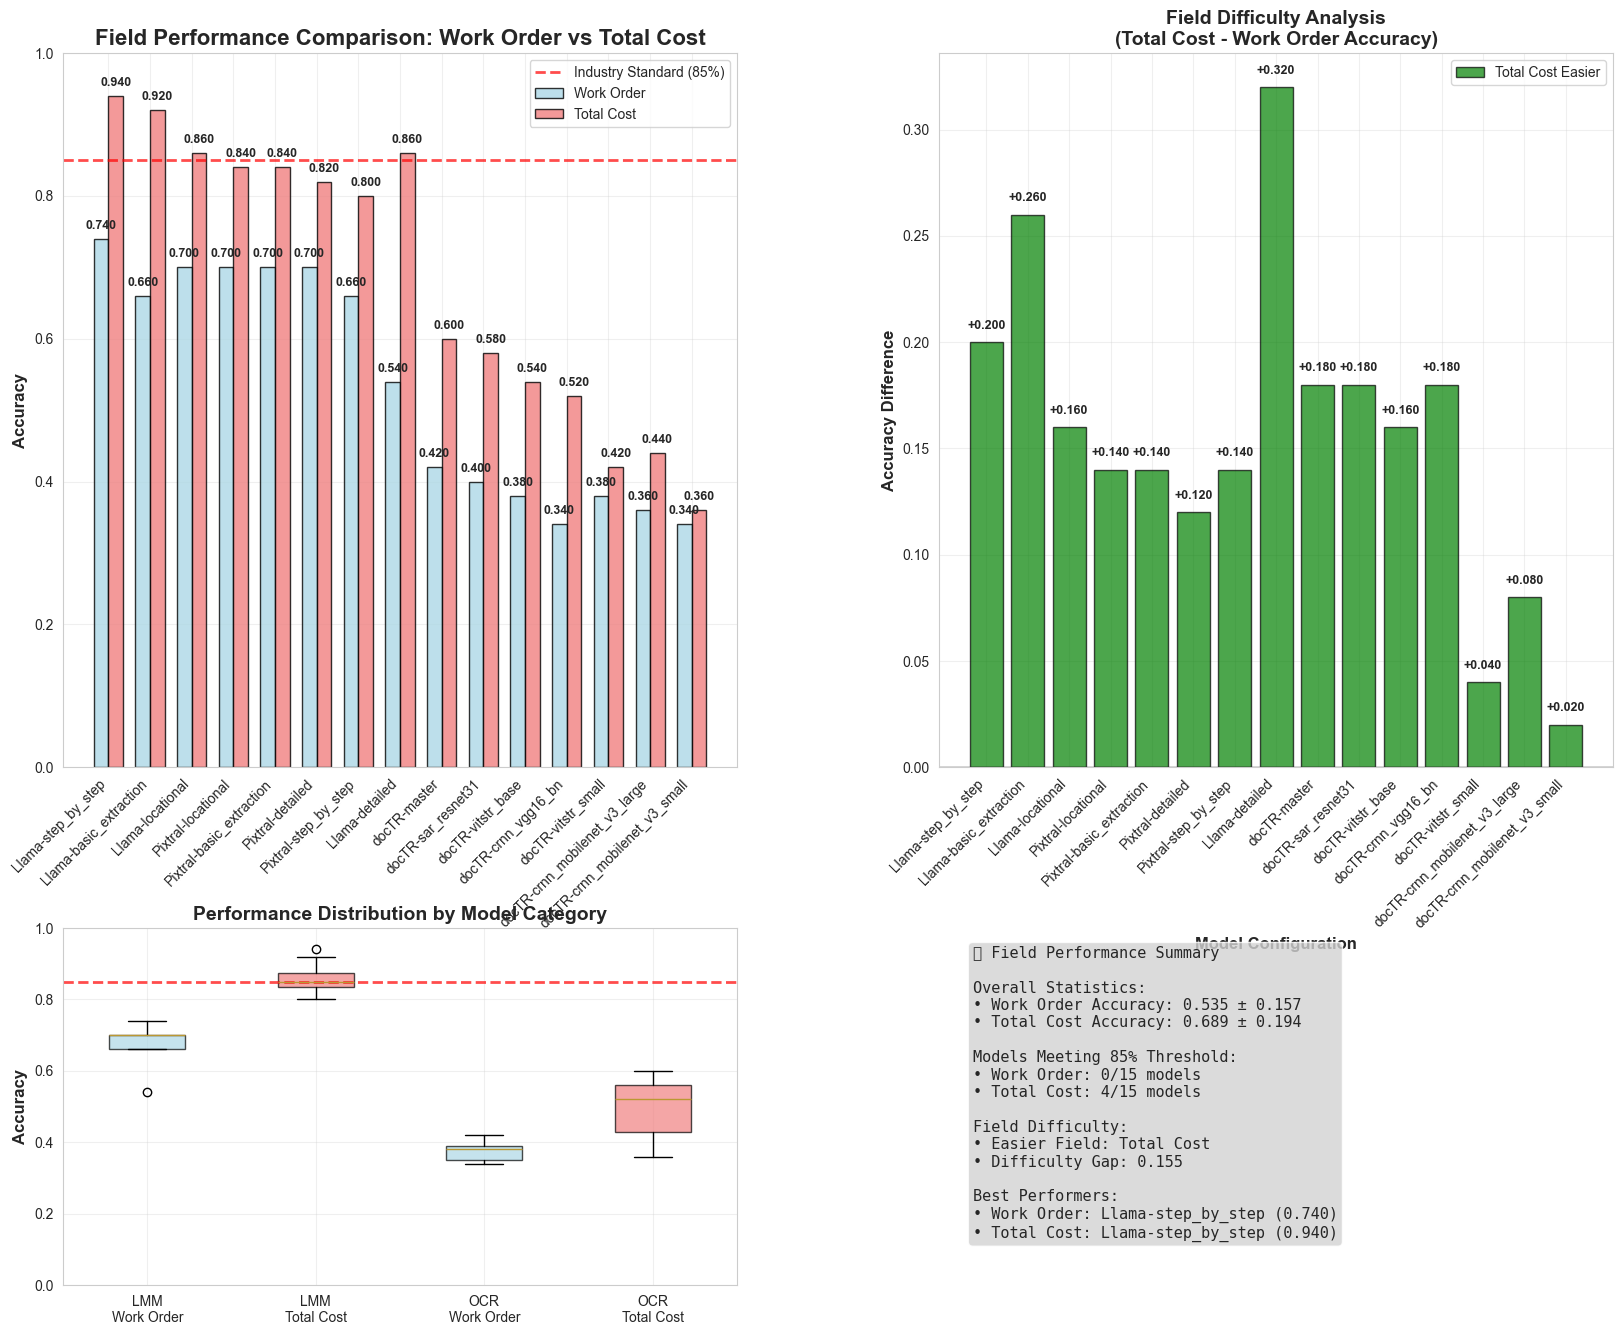


📊 Field Performance Detailed Analysis:

🎯 Individual Model Performance:
--------------------------------------------------
Llama-step_by_step:
  Work Order: 0.740
  Total Cost: 0.940
  Better Field: Total Cost (0.200 advantage)
  Overall: 0.840

Llama-basic_extraction:
  Work Order: 0.660
  Total Cost: 0.920
  Better Field: Total Cost (0.260 advantage)
  Overall: 0.790

Llama-locational:
  Work Order: 0.700
  Total Cost: 0.860
  Better Field: Total Cost (0.160 advantage)
  Overall: 0.780

Pixtral-locational:
  Work Order: 0.700
  Total Cost: 0.840
  Better Field: Total Cost (0.140 advantage)
  Overall: 0.770

Pixtral-basic_extraction:
  Work Order: 0.700
  Total Cost: 0.840
  Better Field: Total Cost (0.140 advantage)
  Overall: 0.770

Pixtral-detailed:
  Work Order: 0.700
  Total Cost: 0.820
  Better Field: Total Cost (0.120 advantage)
  Overall: 0.760

Pixtral-step_by_step:
  Work Order: 0.660
  Total Cost: 0.800
  Better Field: Total Cost (0.140 advantage)
  Overall: 0.730

Llama-d

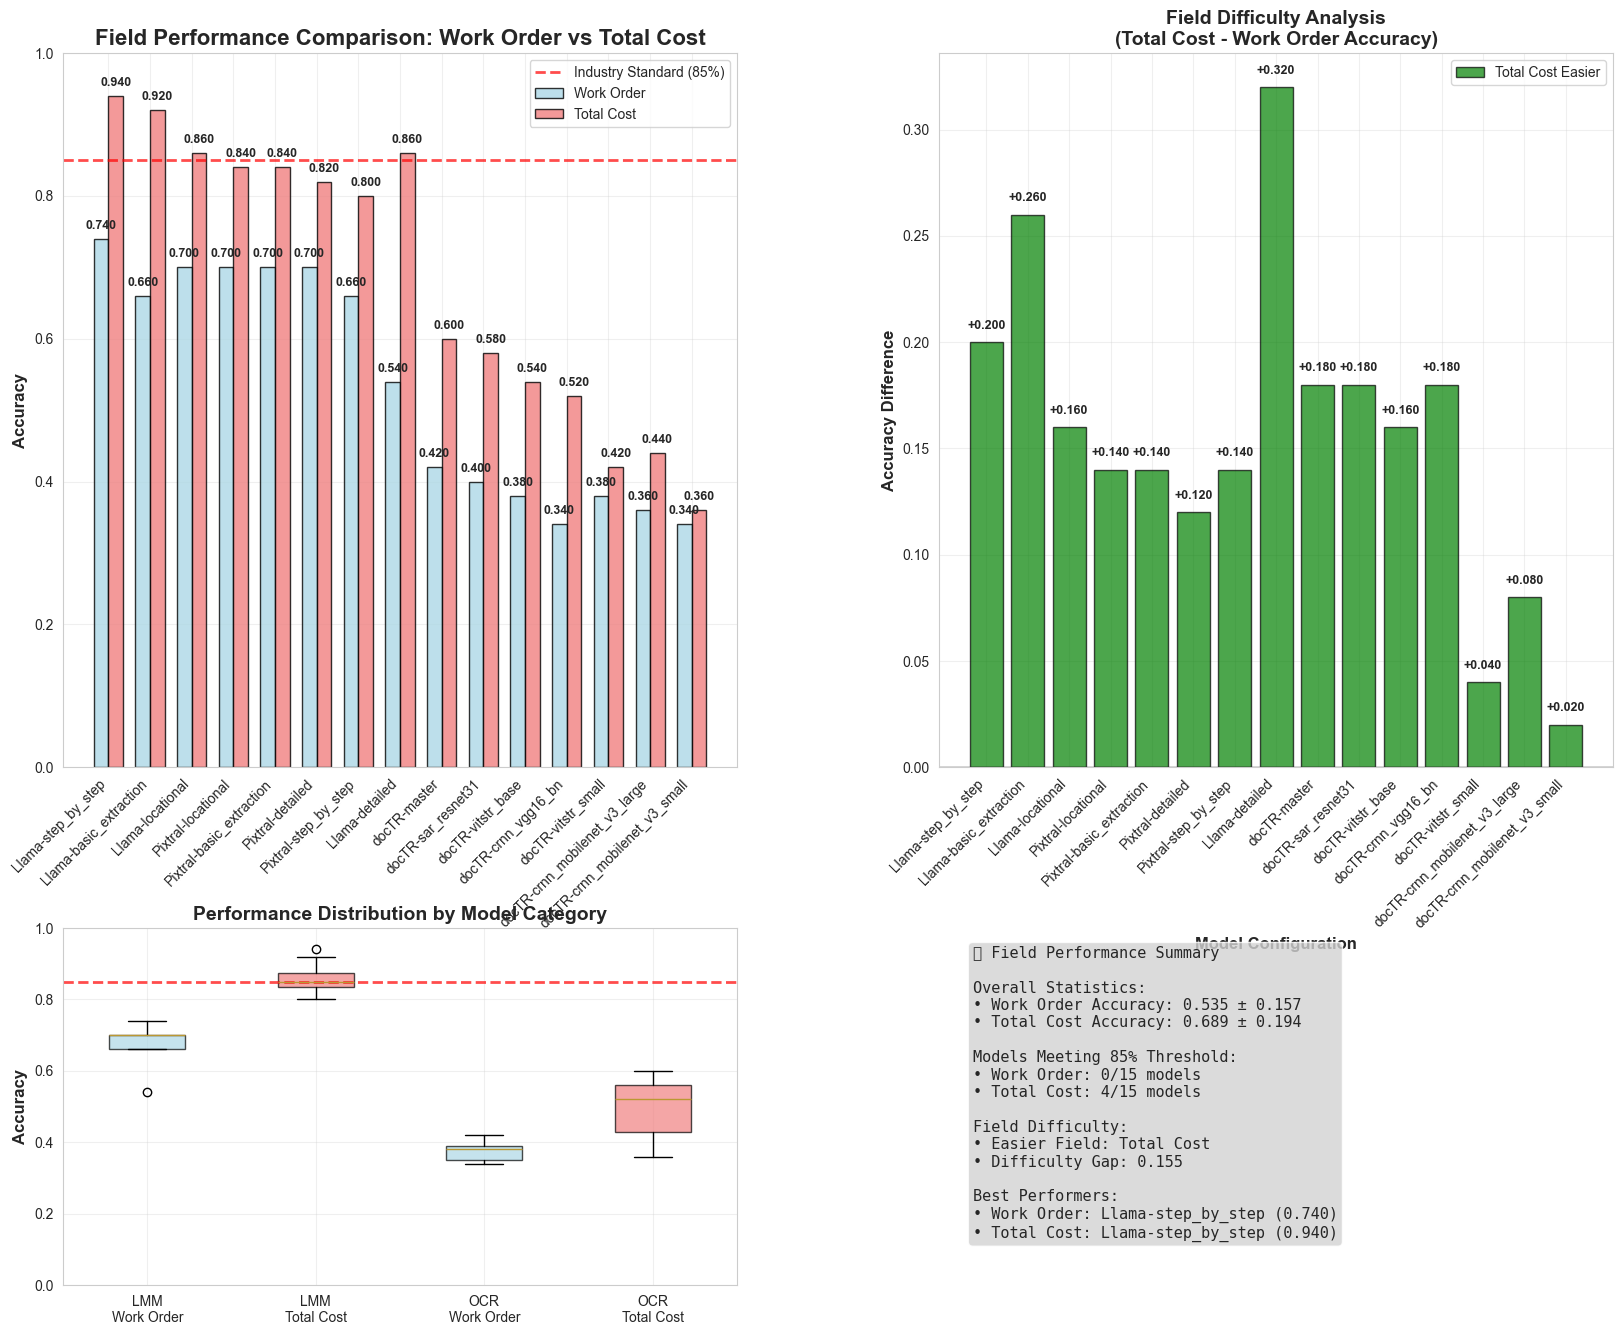

In [42]:
# Create Field Performance Comparison
# Side-by-side accuracy for each field across all models

def create_field_performance_data(comprehensive_dataset):
    """Create data structure for field performance comparison across all models."""
    
    field_performance = {
        'work_order': {},
        'total_cost': {}
    }
    
    model_details = {}
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Get model identifier
                model_id = model_type
                if model_type in ['pixtral', 'llama']:
                    # For LMM models, include prompt type
                    if 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type.title()}-{prompt_type}"
                        model_details[model_id] = {
                            'base_model': model_type,
                            'variant': prompt_type,
                            'category': 'LMM'
                        }
                elif model_type == 'doctr':
                    # For docTR models, include recognition model
                    if 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                            model_id = f"docTR-{recognition_model}"
                            model_details[model_id] = {
                                'base_model': 'doctr',
                                'variant': recognition_model,
                                'category': 'OCR'
                            }
                
                # Get field accuracies
                summary = experiment['summary']
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    field_performance['work_order'][model_id] = summary['work_order_accuracy']
                    field_performance['total_cost'][model_id] = summary['total_cost_accuracy']
    
    return field_performance, model_details

def plot_field_performance_comparison(field_performance, model_details):
    """Create side-by-side field performance comparison."""
    
    if not field_performance['work_order'] or not field_performance['total_cost']:
        print("No field performance data available")
        return
    
    # Get all models that have both field measurements
    common_models = set(field_performance['work_order'].keys()) & set(field_performance['total_cost'].keys())
    common_models = sorted(list(common_models))
    
    if not common_models:
        print("No models with both field measurements found")
        return
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], hspace=0.3, wspace=0.3)
    
    # Prepare data for plotting
    work_order_accs = [field_performance['work_order'][model] for model in common_models]
    total_cost_accs = [field_performance['total_cost'][model] for model in common_models]
    
    # Calculate field difficulty (difference between fields for each model)
    field_differences = [tc - wo for wo, tc in zip(work_order_accs, total_cost_accs)]
    
    # Sort models by overall performance (average of both fields)
    overall_performance = [(wo + tc) / 2 for wo, tc in zip(work_order_accs, total_cost_accs)]
    sorted_indices = np.argsort(overall_performance)[::-1]  # Descending order
    
    models_sorted = [common_models[i] for i in sorted_indices]
    wo_sorted = [work_order_accs[i] for i in sorted_indices]
    tc_sorted = [total_cost_accs[i] for i in sorted_indices]
    diff_sorted = [field_differences[i] for i in sorted_indices]
    
    # Create colors based on model category
    colors = []
    for model in models_sorted:
        if model in model_details:
            category = model_details[model]['category']
            base_model = model_details[model]['base_model']
            if category == 'LMM':
                if base_model == 'pixtral':
                    colors.append('#FF6B6B')  # Red for Pixtral
                elif base_model == 'llama':
                    colors.append('#4ECDC4')  # Teal for Llama
                else:
                    colors.append('#FFA07A')  # Light red for other LMM
            else:  # OCR
                colors.append('#45B7D1')  # Blue for docTR
        else:
            colors.append('#999999')  # Gray for unknown
    
    # Plot 1: Side-by-Side Bar Chart
    ax1 = fig.add_subplot(gs[0, 0])
    
    x_pos = np.arange(len(models_sorted))
    width = 0.35
    
    # Create grouped bars
    bars1 = ax1.bar(x_pos - width/2, wo_sorted, width, label='Work Order', 
                    color='lightblue', alpha=0.8, edgecolor='black', linewidth=1)
    bars2 = ax1.bar(x_pos + width/2, tc_sorted, width, label='Total Cost', 
                    color='lightcoral', alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar, value in zip(bars1, wo_sorted):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for bar, value in zip(bars2, tc_sorted):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Add 85% reference line
    ax1.axhline(y=0.85, color='red', linestyle='--', linewidth=2, alpha=0.7, 
                label='Industry Standard (85%)')
    
    ax1.set_title('Field Performance Comparison: Work Order vs Total Cost', 
                  fontsize=16, fontweight='bold')
    ax1.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax1.set_ylim(0, 1.0)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(models_sorted, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Plot 2: Field Difficulty Analysis (Difference Plot)
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Create diverging bar chart showing which field is easier
    positive_mask = np.array(diff_sorted) >= 0
    negative_mask = np.array(diff_sorted) < 0
    
    # Bars for models where Total Cost is easier (positive difference)
    if np.any(positive_mask):
        ax2.bar(np.array(x_pos)[positive_mask], np.array(diff_sorted)[positive_mask], 
                color='green', alpha=0.7, label='Total Cost Easier', edgecolor='black')
    
    # Bars for models where Work Order is easier (negative difference)
    if np.any(negative_mask):
        ax2.bar(np.array(x_pos)[negative_mask], np.array(diff_sorted)[negative_mask], 
                color='orange', alpha=0.7, label='Work Order Easier', edgecolor='black')
    
    # Add value labels
    for i, (pos, diff) in enumerate(zip(x_pos, diff_sorted)):
        if diff >= 0:
            va = 'bottom'
            y_offset = 0.005
        else:
            va = 'top'
            y_offset = -0.005
        
        ax2.text(pos, diff + y_offset, f'{diff:+.3f}', ha='center', va=va, 
                fontweight='bold', fontsize=9)
    
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.8)
    ax2.set_title('Field Difficulty Analysis\n(Total Cost - Work Order Accuracy)', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Accuracy Difference', fontsize=12, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(models_sorted, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Plot 3: Performance Distribution by Model Category
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Group data by model category
    category_data = {'LMM': {'wo': [], 'tc': []}, 'OCR': {'wo': [], 'tc': []}}
    
    for i, model in enumerate(models_sorted):
        if model in model_details:
            category = model_details[model]['category']
            category_data[category]['wo'].append(wo_sorted[i])
            category_data[category]['tc'].append(tc_sorted[i])
    
    # Create box plots
    box_data = []
    labels = []
    colors_box = []
    
    for category in ['LMM', 'OCR']:
        if category_data[category]['wo']:
            box_data.append(category_data[category]['wo'])
            labels.append(f'{category}\nWork Order')
            colors_box.append('lightblue')
            
            box_data.append(category_data[category]['tc'])
            labels.append(f'{category}\nTotal Cost')
            colors_box.append('lightcoral')
    
    if box_data:
        bp = ax3.boxplot(box_data, labels=labels, patch_artist=True)
        
        # Color the boxes
        for patch, color in zip(bp['boxes'], colors_box):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    
    ax3.set_title('Performance Distribution by Model Category', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    ax3.set_ylim(0, 1.0)
    
    # Add 85% reference line
    ax3.axhline(y=0.85, color='red', linestyle='--', alpha=0.7)
    
    # Plot 4: Summary Statistics Table
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.axis('off')
    
    # Calculate summary statistics
    overall_wo_mean = np.mean(work_order_accs)
    overall_tc_mean = np.mean(total_cost_accs)
    overall_wo_std = np.std(work_order_accs)
    overall_tc_std = np.std(total_cost_accs)
    
    # Count models meeting 85% threshold
    wo_above_85 = sum(1 for acc in work_order_accs if acc >= 0.85)
    tc_above_85 = sum(1 for acc in total_cost_accs if acc >= 0.85)
    
    # Create summary text
    summary_text = f"""📊 Field Performance Summary

Overall Statistics:
• Work Order Accuracy: {overall_wo_mean:.3f} ± {overall_wo_std:.3f}
• Total Cost Accuracy: {overall_tc_mean:.3f} ± {overall_tc_std:.3f}

Models Meeting 85% Threshold:
• Work Order: {wo_above_85}/{len(work_order_accs)} models
• Total Cost: {tc_above_85}/{len(total_cost_accs)} models

Field Difficulty:
• Easier Field: {"Total Cost" if overall_tc_mean > overall_wo_mean else "Work Order"}
• Difficulty Gap: {abs(overall_tc_mean - overall_wo_mean):.3f}

Best Performers:
• Work Order: {models_sorted[np.argmax(wo_sorted)]} ({max(wo_sorted):.3f})
• Total Cost: {models_sorted[np.argmax(tc_sorted)]} ({max(tc_sorted):.3f})"""
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=11,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n📊 Field Performance Detailed Analysis:")
    print("=" * 70)
    
    print(f"\n🎯 Individual Model Performance:")
    print("-" * 50)
    
    for i, model in enumerate(models_sorted):
        wo_acc = wo_sorted[i]
        tc_acc = tc_sorted[i]
        diff = diff_sorted[i]
        
        better_field = "Total Cost" if diff > 0 else "Work Order" if diff < 0 else "Equal"
        
        print(f"{model}:")
        print(f"  Work Order: {wo_acc:.3f}")
        print(f"  Total Cost: {tc_acc:.3f}")
        print(f"  Better Field: {better_field} ({abs(diff):.3f} advantage)")
        print(f"  Overall: {(wo_acc + tc_acc)/2:.3f}")
        print()
    
    # Category analysis
    print(f"\n📈 Performance by Model Category:")
    print("-" * 50)
    
    for category in ['LMM', 'OCR']:
        if category_data[category]['wo']:
            wo_mean = np.mean(category_data[category]['wo'])
            tc_mean = np.mean(category_data[category]['tc'])
            wo_std = np.std(category_data[category]['wo'])
            tc_std = np.std(category_data[category]['tc'])
            
            print(f"{category} Models:")
            print(f"  Work Order: {wo_mean:.3f} ± {wo_std:.3f}")
            print(f"  Total Cost: {tc_mean:.3f} ± {tc_std:.3f}")
            print(f"  Preferred Field: {'Total Cost' if tc_mean > wo_mean else 'Work Order'}")
            print(f"  Field Gap: {abs(tc_mean - wo_mean):.3f}")
            print()
    
    return fig

# Execute the analysis
print("🔍 Creating Field Performance Comparison...")
field_performance, model_details = create_field_performance_data(COMPREHENSIVE_DATASET)
plot_field_performance_comparison(field_performance, model_details)

🔍 Creating Performance Gap Analysis...


C:\Users\alden\AppData\Local\Temp\ipykernel_29032\3324114432.py:174: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(box_data, labels=box_labels, patch_artist=True)


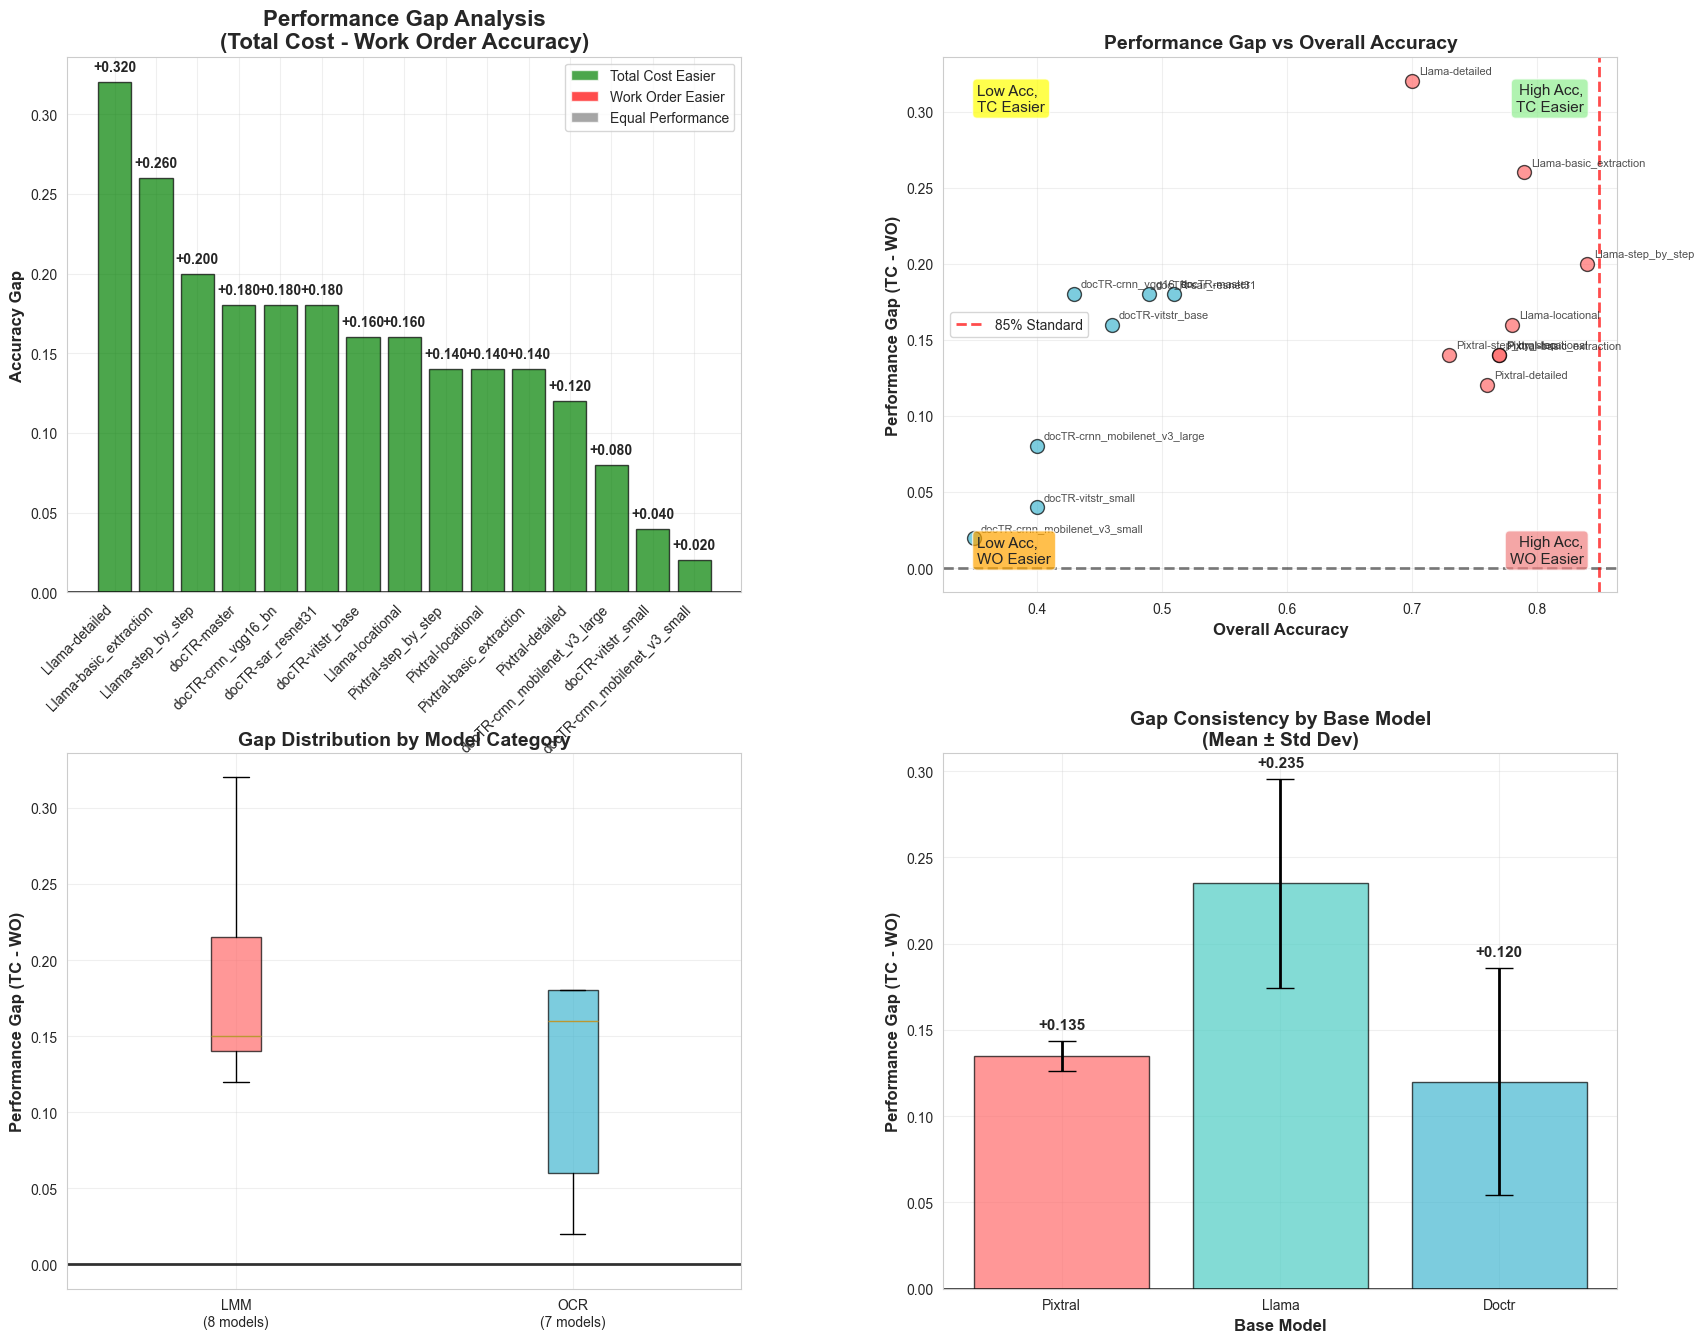


📊 Performance Gap Detailed Analysis:

🎯 Overall Gap Statistics:
----------------------------------------
Models where Total Cost is easier: 15/15 (100.0%)
Models where Work Order is easier: 0/15 (0.0%)
Models with equal performance: 0/15 (0.0%)
Average TC advantage: +0.155
Largest gap: 0.320
Average absolute gap: 0.155

📈 Individual Model Gap Analysis:
--------------------------------------------------
Llama-detailed:
  Work Order: 0.540
  Total Cost: 0.860
  Gap: +0.320 (Total Cost easier)
  Overall: 0.700

Llama-basic_extraction:
  Work Order: 0.660
  Total Cost: 0.920
  Gap: +0.260 (Total Cost easier)
  Overall: 0.790

Llama-step_by_step:
  Work Order: 0.740
  Total Cost: 0.940
  Gap: +0.200 (Total Cost easier)
  Overall: 0.840

docTR-master:
  Work Order: 0.420
  Total Cost: 0.600
  Gap: +0.180 (Total Cost easier)
  Overall: 0.510

docTR-crnn_vgg16_bn:
  Work Order: 0.340
  Total Cost: 0.520
  Gap: +0.180 (Total Cost easier)
  Overall: 0.430

docTR-sar_resnet31:
  Work Order: 0.40

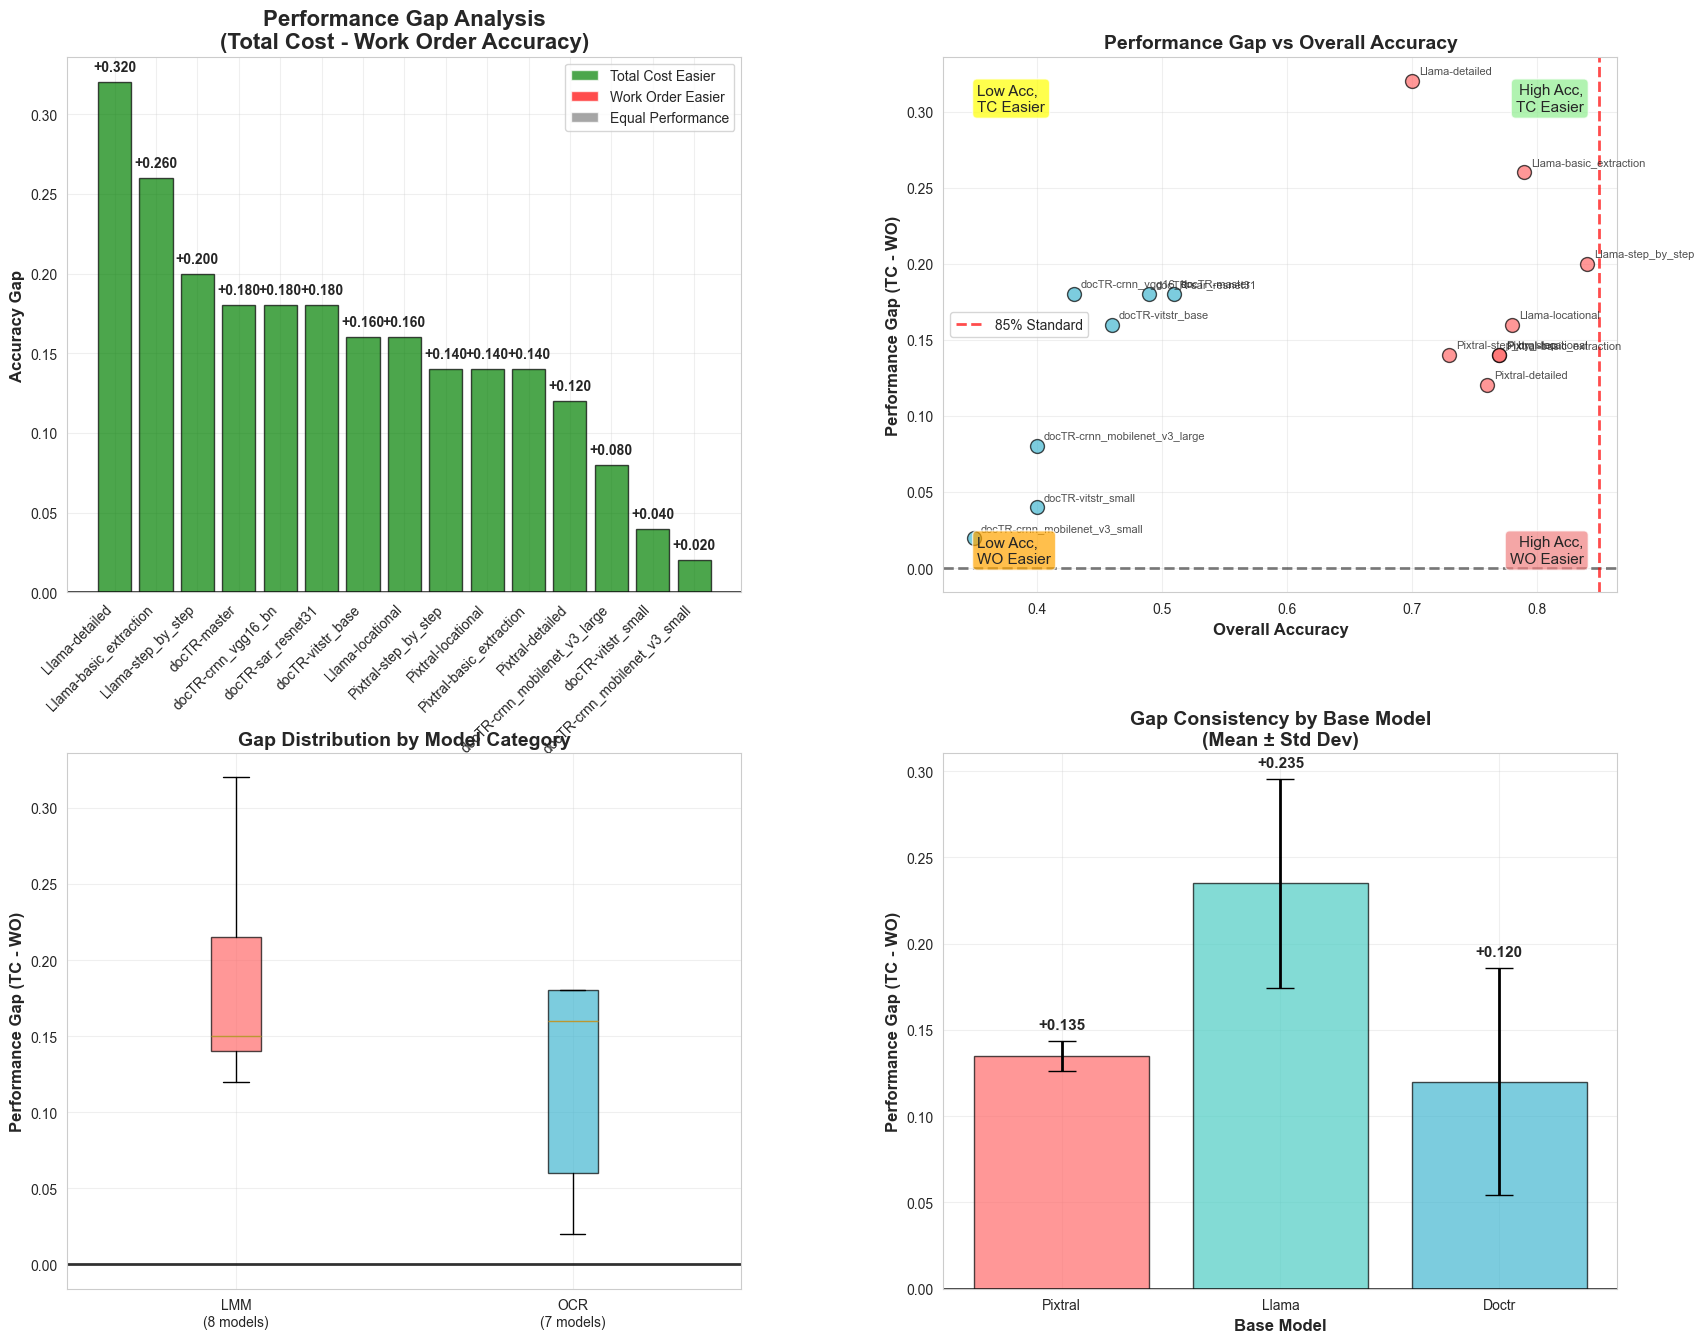

In [43]:
# Create Performance Gap Analysis
# Difference between Total Cost and Work Order accuracy by model

def create_performance_gap_analysis(comprehensive_dataset):
    """Analyze the performance gap between Total Cost and Work Order fields."""
    
    gap_data = {}
    model_details = {}
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Get model identifier
                model_id = model_type
                if model_type in ['pixtral', 'llama']:
                    # For LMM models, include prompt type
                    if 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type.title()}-{prompt_type}"
                        model_details[model_id] = {
                            'base_model': model_type,
                            'variant': prompt_type,
                            'category': 'LMM'
                        }
                elif model_type == 'doctr':
                    # For docTR models, include recognition model
                    if 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                            model_id = f"docTR-{recognition_model}"
                            model_details[model_id] = {
                                'base_model': 'doctr',
                                'variant': recognition_model,
                                'category': 'OCR'
                            }
                
                # Calculate performance gap
                summary = experiment['summary']
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    wo_acc = summary['work_order_accuracy']
                    tc_acc = summary['total_cost_accuracy']
                    
                    gap_data[model_id] = {
                        'work_order_accuracy': wo_acc,
                        'total_cost_accuracy': tc_acc,
                        'gap': tc_acc - wo_acc,  # Positive means TC is easier, negative means WO is easier
                        'abs_gap': abs(tc_acc - wo_acc),
                        'better_field': 'Total Cost' if tc_acc > wo_acc else 'Work Order' if wo_acc > tc_acc else 'Equal',
                        'overall_accuracy': (wo_acc + tc_acc) / 2
                    }
    
    return gap_data, model_details

def plot_performance_gap_analysis(gap_data, model_details):
    """Create visualizations for performance gap analysis."""
    
    if not gap_data:
        print("No performance gap data available")
        return
    
    # Prepare data for plotting
    models = list(gap_data.keys())
    gaps = [gap_data[model]['gap'] for model in models]
    abs_gaps = [gap_data[model]['abs_gap'] for model in models]
    overall_accs = [gap_data[model]['overall_accuracy'] for model in models]
    wo_accs = [gap_data[model]['work_order_accuracy'] for model in models]
    tc_accs = [gap_data[model]['total_cost_accuracy'] for model in models]
    
    # Sort models by gap size (most extreme gaps first)
    sorted_indices = np.argsort(abs_gaps)[::-1]
    models_sorted = [models[i] for i in sorted_indices]
    gaps_sorted = [gaps[i] for i in sorted_indices]
    abs_gaps_sorted = [abs_gaps[i] for i in sorted_indices]
    overall_accs_sorted = [overall_accs[i] for i in sorted_indices]
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)
    
    # Plot 1: Performance Gap Waterfall Chart
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Create colors based on gap direction
    colors = ['green' if gap > 0 else 'red' if gap < 0 else 'gray' for gap in gaps_sorted]
    
    bars = ax1.bar(range(len(models_sorted)), gaps_sorted, color=colors, alpha=0.7, edgecolor='black')
    
    # Add value labels
    for i, (bar, gap) in enumerate(zip(bars, gaps_sorted)):
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        y_offset = 0.005 if height >= 0 else -0.005
        
        ax1.text(bar.get_x() + bar.get_width()/2., height + y_offset,
                f'{gap:+.3f}', ha='center', va=va, fontweight='bold', fontsize=10)
    
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
    ax1.set_title('Performance Gap Analysis\n(Total Cost - Work Order Accuracy)', 
                  fontsize=16, fontweight='bold')
    ax1.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Accuracy Gap', fontsize=12, fontweight='bold')
    ax1.set_xticks(range(len(models_sorted)))
    ax1.set_xticklabels(models_sorted, rotation=45, ha='right')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', alpha=0.7, label='Total Cost Easier'),
        Patch(facecolor='red', alpha=0.7, label='Work Order Easier'),
        Patch(facecolor='gray', alpha=0.7, label='Equal Performance')
    ]
    ax1.legend(handles=legend_elements, loc='upper right')
    
    # Plot 2: Gap vs Overall Performance Scatter
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Create scatter plot colored by model category
    category_colors = {'LMM': '#FF6B6B', 'OCR': '#45B7D1', 'Unknown': '#999999'}
    
    for model, gap, overall_acc in zip(models, gaps, overall_accs):
        category = model_details.get(model, {}).get('category', 'Unknown')
        color = category_colors[category]
        
        ax2.scatter(overall_acc, gap, s=100, c=color, alpha=0.7, edgecolors='black')
        
        # Add model label
        ax2.annotate(model, (overall_acc, gap), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8, alpha=0.8)
    
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.axvline(x=0.85, color='red', linestyle='--', alpha=0.7, label='85% Standard')
    
    ax2.set_title('Performance Gap vs Overall Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Overall Accuracy', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Performance Gap (TC - WO)', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add quadrant labels
    ax2.text(0.95, 0.95, 'High Acc,\nTC Easier', transform=ax2.transAxes, 
            ha='right', va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    ax2.text(0.05, 0.95, 'Low Acc,\nTC Easier', transform=ax2.transAxes, 
            ha='left', va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    ax2.text(0.95, 0.05, 'High Acc,\nWO Easier', transform=ax2.transAxes, 
            ha='right', va='bottom', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    ax2.text(0.05, 0.05, 'Low Acc,\nWO Easier', transform=ax2.transAxes, 
            ha='left', va='bottom', bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7))
    
    # Plot 3: Gap Distribution by Model Category
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Group gaps by model category
    category_gaps = {'LMM': [], 'OCR': []}
    
    for model, gap in zip(models, gaps):
        category = model_details.get(model, {}).get('category', 'Unknown')
        if category in category_gaps:
            category_gaps[category].append(gap)
    
    # Create box plots
    box_data = []
    box_labels = []
    box_colors = []
    
    for category, gaps_list in category_gaps.items():
        if gaps_list:
            box_data.append(gaps_list)
            box_labels.append(f'{category}\n({len(gaps_list)} models)')
            box_colors.append(category_colors[category])
    
    if box_data:
        bp = ax3.boxplot(box_data, labels=box_labels, patch_artist=True)
        
        # Color the boxes
        for patch, color in zip(bp['boxes'], box_colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
    ax3.set_title('Gap Distribution by Model Category', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Performance Gap (TC - WO)', fontsize=12, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    
    # Plot 4: Gap Consistency Analysis
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Analyze gap patterns by base model
    base_model_gaps = {}
    
    for model in models:
        if model in model_details:
            base_model = model_details[model]['base_model']
            gap = gap_data[model]['gap']
            
            if base_model not in base_model_gaps:
                base_model_gaps[base_model] = []
            base_model_gaps[base_model].append(gap)
    
    # Calculate gap statistics for each base model
    base_models = []
    gap_means = []
    gap_stds = []
    gap_ranges = []
    
    for base_model, gaps_list in base_model_gaps.items():
        if len(gaps_list) > 1:  # Only include if multiple variants
            base_models.append(base_model.title())
            gap_means.append(np.mean(gaps_list))
            gap_stds.append(np.std(gaps_list))
            gap_ranges.append(np.max(gaps_list) - np.min(gaps_list))
    
    if base_models:
        x_pos = np.arange(len(base_models))
        
        # Create error bars showing mean ± std
        bars = ax4.bar(x_pos, gap_means, yerr=gap_stds, capsize=10, 
                      color=['#FF6B6B' if bm == 'Pixtral' else '#4ECDC4' if bm == 'Llama' else '#45B7D1' 
                             for bm in base_models], 
                      alpha=0.7, edgecolor='black')
        
        # Add value labels
        for i, (bar, mean_gap, std_gap) in enumerate(zip(bars, gap_means, gap_stds)):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + std_gap + 0.005,
                    f'{mean_gap:+.3f}', ha='center', va='bottom', fontweight='bold')
        
        ax4.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
        ax4.set_title('Gap Consistency by Base Model\n(Mean ± Std Dev)', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Base Model', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Performance Gap (TC - WO)', fontsize=12, fontweight='bold')
        ax4.set_xticks(x_pos)
        ax4.set_xticklabels(base_models)
        ax4.grid(axis='y', alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Insufficient data for\ngap consistency analysis', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n📊 Performance Gap Detailed Analysis:")
    print("=" * 70)
    
    # Overall gap statistics
    print(f"\n🎯 Overall Gap Statistics:")
    print("-" * 40)
    
    positive_gaps = [g for g in gaps if g > 0]
    negative_gaps = [g for g in gaps if g < 0]
    zero_gaps = [g for g in gaps if g == 0]
    
    print(f"Models where Total Cost is easier: {len(positive_gaps)}/{len(gaps)} ({len(positive_gaps)/len(gaps)*100:.1f}%)")
    print(f"Models where Work Order is easier: {len(negative_gaps)}/{len(gaps)} ({len(negative_gaps)/len(gaps)*100:.1f}%)")
    print(f"Models with equal performance: {len(zero_gaps)}/{len(gaps)} ({len(zero_gaps)/len(gaps)*100:.1f}%)")
    
    if positive_gaps:
        print(f"Average TC advantage: +{np.mean(positive_gaps):.3f}")
    if negative_gaps:
        print(f"Average WO advantage: {np.mean(negative_gaps):.3f}")
    
    print(f"Largest gap: {max(abs_gaps):.3f}")
    print(f"Average absolute gap: {np.mean(abs_gaps):.3f}")
    
    # Individual model analysis
    print(f"\n📈 Individual Model Gap Analysis:")
    print("-" * 50)
    
    for i, model in enumerate(models_sorted[:10]):  # Top 10 by gap size
        data = gap_data[model]
        print(f"{model}:")
        print(f"  Work Order: {data['work_order_accuracy']:.3f}")
        print(f"  Total Cost: {data['total_cost_accuracy']:.3f}")
        print(f"  Gap: {data['gap']:+.3f} ({data['better_field']} easier)")
        print(f"  Overall: {data['overall_accuracy']:.3f}")
        print()
    
    # Category analysis
    print(f"\n📊 Gap Analysis by Model Category:")
    print("-" * 50)
    
    for category in ['LMM', 'OCR']:
        category_gaps_list = category_gaps.get(category, [])
        if category_gaps_list:
            mean_gap = np.mean(category_gaps_list)
            std_gap = np.std(category_gaps_list)
            
            tc_easier = sum(1 for g in category_gaps_list if g > 0)
            wo_easier = sum(1 for g in category_gaps_list if g < 0)
            
            print(f"{category} Models:")
            print(f"  Average Gap: {mean_gap:+.3f} ± {std_gap:.3f}")
            print(f"  TC easier: {tc_easier}/{len(category_gaps_list)} models")
            print(f"  WO easier: {wo_easier}/{len(category_gaps_list)} models")
            print(f"  Dominant Pattern: {'Total Cost easier' if mean_gap > 0 else 'Work Order easier'}")
            print()
    
    return fig

# Execute the analysis
print("🔍 Creating Performance Gap Analysis...")
gap_data, model_details = create_performance_gap_analysis(COMPREHENSIVE_DATASET)
plot_performance_gap_analysis(gap_data, model_details)

*Placeholder for understanding why models excel at one field but struggle with another.*


## Section 6: Character Error Rate (CER) Deep Analysis


### Cell 6.1: CER Distribution Analysis


🔍 Creating CER Distribution Histograms...


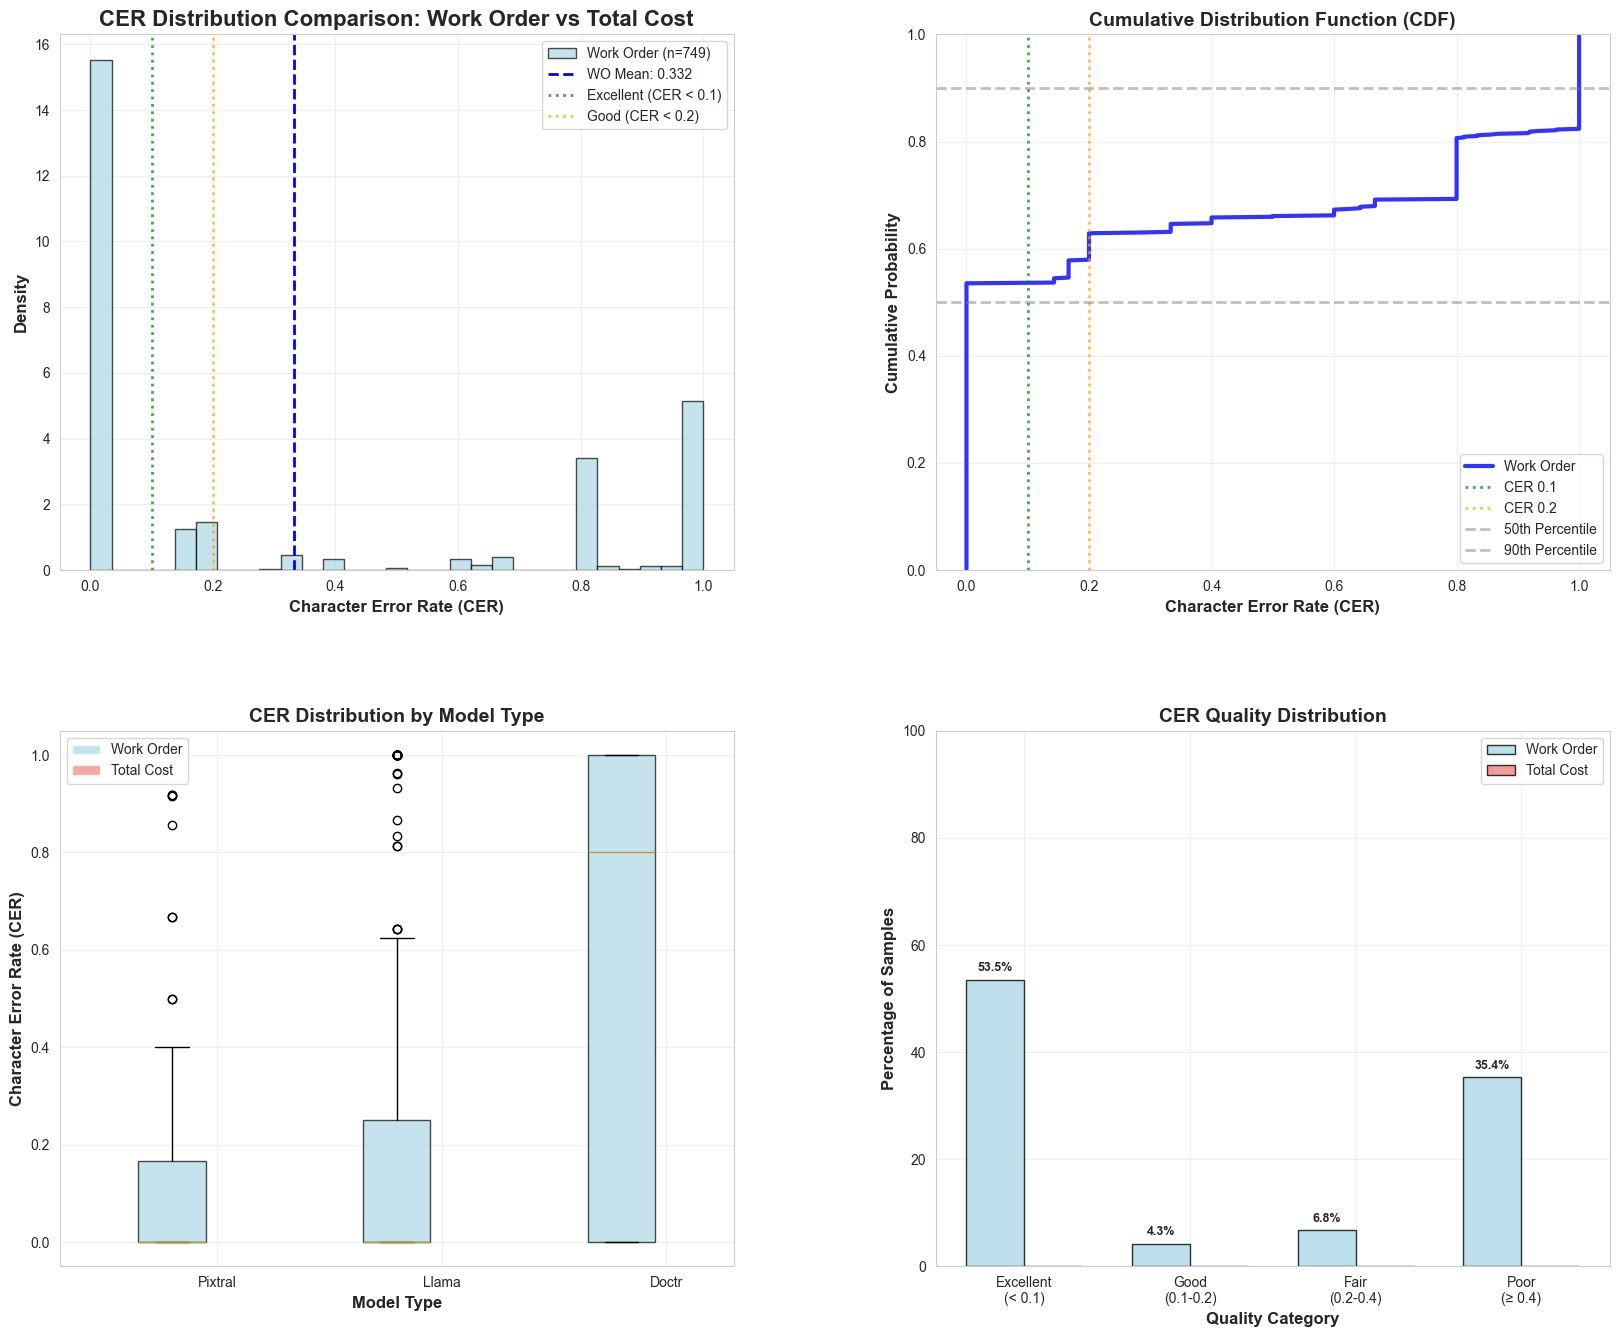


📊 CER Distribution Statistical Analysis:

🎯 Overall CER Statistics:
----------------------------------------
Work Order CER (n=749):
  Mean: 0.3320
  Median: 0.0000
  Std Dev: 0.4165
  Range: 0.0000 - 1.0000
  IQR: 0.0000 - 0.8000

📈 Quality Category Breakdown:
----------------------------------------
Work Order:
  Excellent (< 0.1): 53.5%
  Good (0.1-0.2): 4.3%
  Fair (0.2-0.4): 6.8%
  Poor (≥ 0.4): 35.4%


🔍 Model Type CER Analysis:
----------------------------------------
Pixtral Model:
  Work Order CER: 0.0873 (n=199)

Llama Model:
  Work Order CER: 0.2375 (n=200)

Doctr Model:
  Work Order CER: 0.5252 (n=350)



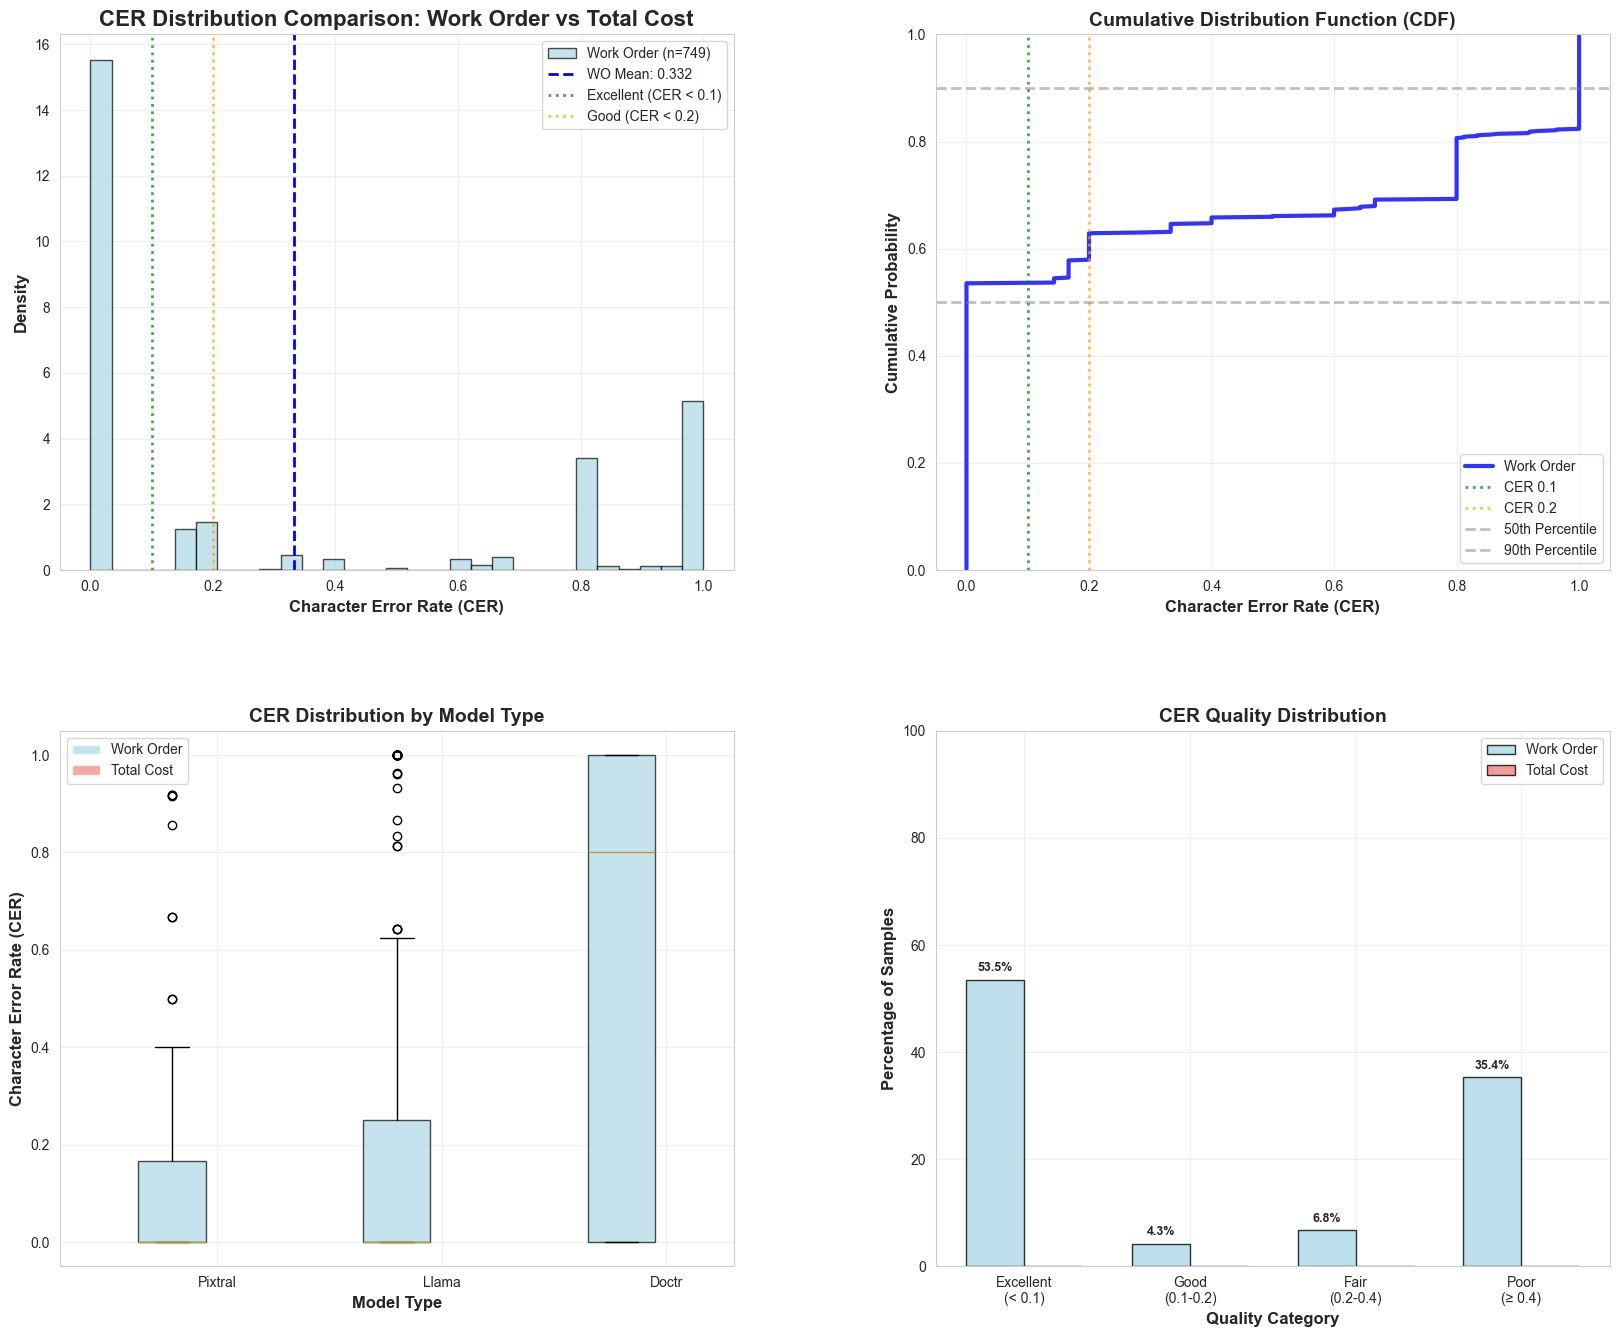

In [44]:
# Create CER Distribution Histograms
# Separate for Work Order and Total Cost

def extract_cer_data(comprehensive_dataset):
    """Extract Character Error Rate (CER) data for both fields."""
    
    cer_data = {
        'work_order': [],
        'total_cost': [],
        'model_breakdown': {}
    }
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        cer_data['model_breakdown'][model_type] = {
            'work_order': [],
            'total_cost': []
        }
        
        for experiment in experiments:
            if 'extracted_data' in experiment:
                extracted_data_list = experiment['extracted_data']
                
                # Get model identifier for detailed breakdown
                model_id = model_type
                if 'metadata' in experiment:
                    if model_type in ['pixtral', 'llama'] and 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type}-{prompt_type}"
                    elif model_type == 'doctr' and 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                            model_id = f"doctr-{recognition_model}"
                
                # Initialize detailed model breakdown if not exists
                if model_id not in cer_data['model_breakdown']:
                    cer_data['model_breakdown'][model_id] = {
                        'work_order': [],
                        'total_cost': []
                    }
                
                # Process each extraction item
                for item in extracted_data_list:
                    if isinstance(item, dict) and 'performance' in item:
                        performance = item['performance']
                        
                        # Extract Work Order CER
                        if 'work_order_cer' in performance:
                            wo_cer = performance['work_order_cer']
                            if isinstance(wo_cer, (int, float)) and wo_cer >= 0:
                                cer_data['work_order'].append(wo_cer)
                                cer_data['model_breakdown'][model_type]['work_order'].append(wo_cer)
                                cer_data['model_breakdown'][model_id]['work_order'].append(wo_cer)
                        
                        # Extract Total Cost CER  
                        if 'total_cost_cer' in performance:
                            tc_cer = performance['total_cost_cer']
                            if isinstance(tc_cer, (int, float)) and tc_cer >= 0:
                                cer_data['total_cost'].append(tc_cer)
                                cer_data['model_breakdown'][model_type]['total_cost'].append(tc_cer)
                                cer_data['model_breakdown'][model_id]['total_cost'].append(tc_cer)
    
    return cer_data

def plot_cer_distribution_histograms(cer_data):
    """Create CER distribution histograms for both fields."""
    
    if not cer_data['work_order'] and not cer_data['total_cost']:
        print("No CER data available")
        return
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)
    
    # Plot 1: Overall CER Distribution Comparison
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Create histograms for both fields
    bins = np.linspace(0, min(1.0, max(max(cer_data['work_order'], default=0), 
                                     max(cer_data['total_cost'], default=0))), 30)
    
    if cer_data['work_order']:
        ax1.hist(cer_data['work_order'], bins=bins, alpha=0.7, color='lightblue', 
                label=f'Work Order (n={len(cer_data["work_order"])})', density=True, edgecolor='black')
    
    if cer_data['total_cost']:
        ax1.hist(cer_data['total_cost'], bins=bins, alpha=0.7, color='lightcoral', 
                label=f'Total Cost (n={len(cer_data["total_cost"])})', density=True, edgecolor='black')
    
    # Add statistical lines
    if cer_data['work_order']:
        wo_mean = np.mean(cer_data['work_order'])
        ax1.axvline(wo_mean, color='blue', linestyle='--', linewidth=2, 
                   label=f'WO Mean: {wo_mean:.3f}')
    
    if cer_data['total_cost']:
        tc_mean = np.mean(cer_data['total_cost'])
        ax1.axvline(tc_mean, color='red', linestyle='--', linewidth=2, 
                   label=f'TC Mean: {tc_mean:.3f}')
    
    # Add quality thresholds
    ax1.axvline(0.1, color='green', linestyle=':', alpha=0.7, label='Excellent (CER < 0.1)')
    ax1.axvline(0.2, color='orange', linestyle=':', alpha=0.7, label='Good (CER < 0.2)')
    
    ax1.set_title('CER Distribution Comparison: Work Order vs Total Cost', 
                  fontsize=16, fontweight='bold')
    ax1.set_xlabel('Character Error Rate (CER)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Cumulative Distribution Function (CDF)
    ax2 = fig.add_subplot(gs[0, 1])
    
    if cer_data['work_order']:
        sorted_wo = np.sort(cer_data['work_order'])
        y_wo = np.arange(1, len(sorted_wo) + 1) / len(sorted_wo)
        ax2.plot(sorted_wo, y_wo, color='blue', linewidth=3, label='Work Order', alpha=0.8)
    
    if cer_data['total_cost']:
        sorted_tc = np.sort(cer_data['total_cost'])
        y_tc = np.arange(1, len(sorted_tc) + 1) / len(sorted_tc)
        ax2.plot(sorted_tc, y_tc, color='red', linewidth=3, label='Total Cost', alpha=0.8)
    
    # Add threshold lines
    ax2.axvline(0.1, color='green', linestyle=':', alpha=0.7, label='CER 0.1')
    ax2.axvline(0.2, color='orange', linestyle=':', alpha=0.7, label='CER 0.2')
    ax2.axhline(0.5, color='gray', linestyle='--', alpha=0.5, label='50th Percentile')
    ax2.axhline(0.9, color='gray', linestyle='--', alpha=0.5, label='90th Percentile')
    
    ax2.set_title('Cumulative Distribution Function (CDF)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Character Error Rate (CER)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)
    
    # Plot 3: CER Distribution by Model Type
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Create box plots for different model types
    model_types = ['pixtral', 'llama', 'doctr']
    box_data_wo = []
    box_data_tc = []
    box_labels = []
    
    for model_type in model_types:
        if model_type in cer_data['model_breakdown']:
            wo_cers = cer_data['model_breakdown'][model_type]['work_order']
            tc_cers = cer_data['model_breakdown'][model_type]['total_cost']
            
            if wo_cers or tc_cers:
                box_data_wo.append(wo_cers if wo_cers else [])
                box_data_tc.append(tc_cers if tc_cers else [])
                box_labels.append(model_type.title())
    
    if box_data_wo or box_data_tc:
        positions_wo = np.arange(len(box_labels)) - 0.2
        positions_tc = np.arange(len(box_labels)) + 0.2
        
        # Create box plots
        if any(box_data_wo):
            bp1 = ax3.boxplot([data for data in box_data_wo if data], 
                             positions=positions_wo[:len([data for data in box_data_wo if data])], 
                             widths=0.3, patch_artist=True, 
                             boxprops=dict(facecolor='lightblue', alpha=0.7))
        
        if any(box_data_tc):
            bp2 = ax3.boxplot([data for data in box_data_tc if data], 
                             positions=positions_tc[:len([data for data in box_data_tc if data])], 
                             widths=0.3, patch_artist=True,
                             boxprops=dict(facecolor='lightcoral', alpha=0.7))
        
        ax3.set_xticks(range(len(box_labels)))
        ax3.set_xticklabels(box_labels)
    
    ax3.set_title('CER Distribution by Model Type', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Model Type', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Character Error Rate (CER)', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Add legend for box plots
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightblue', alpha=0.7, label='Work Order'),
        Patch(facecolor='lightcoral', alpha=0.7, label='Total Cost')
    ]
    ax3.legend(handles=legend_elements)
    
    # Plot 4: CER Quality Categories
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Define quality categories
    def categorize_cer(cer_list):
        if not cer_list:
            return {'excellent': 0, 'good': 0, 'fair': 0, 'poor': 0}
        
        excellent = sum(1 for cer in cer_list if cer < 0.1)
        good = sum(1 for cer in cer_list if 0.1 <= cer < 0.2)
        fair = sum(1 for cer in cer_list if 0.2 <= cer < 0.4)
        poor = sum(1 for cer in cer_list if cer >= 0.4)
        
        total = len(cer_list)
        return {
            'excellent': excellent / total * 100,
            'good': good / total * 100,
            'fair': fair / total * 100,
            'poor': poor / total * 100
        }
    
    wo_categories = categorize_cer(cer_data['work_order'])
    tc_categories = categorize_cer(cer_data['total_cost'])
    
    # Create stacked bar chart
    categories = ['Excellent\n(< 0.1)', 'Good\n(0.1-0.2)', 'Fair\n(0.2-0.4)', 'Poor\n(≥ 0.4)']
    wo_values = [wo_categories['excellent'], wo_categories['good'], wo_categories['fair'], wo_categories['poor']]
    tc_values = [tc_categories['excellent'], tc_categories['good'], tc_categories['fair'], tc_categories['poor']]
    
    x_pos = np.arange(len(categories))
    width = 0.35
    
    bars1 = ax4.bar(x_pos - width/2, wo_values, width, label='Work Order', 
                    color='lightblue', alpha=0.8, edgecolor='black')
    bars2 = ax4.bar(x_pos + width/2, tc_values, width, label='Total Cost', 
                    color='lightcoral', alpha=0.8, edgecolor='black')
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax4.set_title('CER Quality Distribution', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Quality Category', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Percentage of Samples', fontsize=12, fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(categories)
    ax4.legend()
    ax4.grid(axis='y', alpha=0.3)
    ax4.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistical analysis
    print("\n📊 CER Distribution Statistical Analysis:")
    print("=" * 70)
    
    # Overall statistics
    print(f"\n🎯 Overall CER Statistics:")
    print("-" * 40)
    
    if cer_data['work_order']:
        wo_stats = {
            'mean': np.mean(cer_data['work_order']),
            'median': np.median(cer_data['work_order']),
            'std': np.std(cer_data['work_order']),
            'min': np.min(cer_data['work_order']),
            'max': np.max(cer_data['work_order']),
            'q25': np.percentile(cer_data['work_order'], 25),
            'q75': np.percentile(cer_data['work_order'], 75)
        }
        
        print(f"Work Order CER (n={len(cer_data['work_order'])}):")
        print(f"  Mean: {wo_stats['mean']:.4f}")
        print(f"  Median: {wo_stats['median']:.4f}")
        print(f"  Std Dev: {wo_stats['std']:.4f}")
        print(f"  Range: {wo_stats['min']:.4f} - {wo_stats['max']:.4f}")
        print(f"  IQR: {wo_stats['q25']:.4f} - {wo_stats['q75']:.4f}")
    
    if cer_data['total_cost']:
        tc_stats = {
            'mean': np.mean(cer_data['total_cost']),
            'median': np.median(cer_data['total_cost']),
            'std': np.std(cer_data['total_cost']),
            'min': np.min(cer_data['total_cost']),
            'max': np.max(cer_data['total_cost']),
            'q25': np.percentile(cer_data['total_cost'], 25),
            'q75': np.percentile(cer_data['total_cost'], 75)
        }
        
        print(f"\nTotal Cost CER (n={len(cer_data['total_cost'])}):")
        print(f"  Mean: {tc_stats['mean']:.4f}")
        print(f"  Median: {tc_stats['median']:.4f}")
        print(f"  Std Dev: {tc_stats['std']:.4f}")
        print(f"  Range: {tc_stats['min']:.4f} - {tc_stats['max']:.4f}")
        print(f"  IQR: {tc_stats['q25']:.4f} - {tc_stats['q75']:.4f}")
    
    # Comparative analysis
    if cer_data['work_order'] and cer_data['total_cost']:
        print(f"\n⚖️ Comparative Analysis:")
        print("-" * 40)
        
        mean_diff = wo_stats['mean'] - tc_stats['mean']
        better_field = "Total Cost" if mean_diff > 0 else "Work Order"
        
        print(f"Better Field (Lower CER): {better_field}")
        print(f"Mean Difference: {abs(mean_diff):.4f}")
        print(f"Relative Improvement: {abs(mean_diff) / max(wo_stats['mean'], tc_stats['mean']) * 100:.1f}%")
        
        # Statistical significance test (if scipy available)
        try:
            from scipy import stats
            t_stat, p_value = stats.ttest_ind(cer_data['work_order'], cer_data['total_cost'])
            print(f"Statistical Significance (t-test): p = {p_value:.4f}")
            print(f"Significantly Different: {'Yes' if p_value < 0.05 else 'No'}")
        except ImportError:
            print("Statistical significance test not available (scipy required)")
    
    # Quality breakdown
    print(f"\n📈 Quality Category Breakdown:")
    print("-" * 40)
    
    for field, categories in [('Work Order', wo_categories), ('Total Cost', tc_categories)]:
        if any(categories.values()):
            print(f"{field}:")
            print(f"  Excellent (< 0.1): {categories['excellent']:.1f}%")
            print(f"  Good (0.1-0.2): {categories['good']:.1f}%")
            print(f"  Fair (0.2-0.4): {categories['fair']:.1f}%")
            print(f"  Poor (≥ 0.4): {categories['poor']:.1f}%")
            print()
    
    # Model type analysis
    print(f"\n🔍 Model Type CER Analysis:")
    print("-" * 40)
    
    for model_type in ['pixtral', 'llama', 'doctr']:
        if model_type in cer_data['model_breakdown']:
            wo_cers = cer_data['model_breakdown'][model_type]['work_order']
            tc_cers = cer_data['model_breakdown'][model_type]['total_cost']
            
            if wo_cers or tc_cers:
                print(f"{model_type.title()} Model:")
                
                if wo_cers:
                    wo_mean = np.mean(wo_cers)
                    print(f"  Work Order CER: {wo_mean:.4f} (n={len(wo_cers)})")
                
                if tc_cers:
                    tc_mean = np.mean(tc_cers)
                    print(f"  Total Cost CER: {tc_mean:.4f} (n={len(tc_cers)})")
                
                if wo_cers and tc_cers:
                    model_diff = wo_mean - tc_mean
                    print(f"  Better Field: {'Total Cost' if model_diff > 0 else 'Work Order'}")
                    print(f"  Difference: {abs(model_diff):.4f}")
                
                print()
    
    return fig

# Execute the analysis
print("🔍 Creating CER Distribution Histograms...")
cer_data = extract_cer_data(COMPREHENSIVE_DATASET)
plot_cer_distribution_histograms(cer_data)


🔍 Creating Model CER Comparison Box Plots...


C:\Users\alden\AppData\Local\Temp\ipykernel_29032\214208290.py:127: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(box_data_combined, labels=box_labels, patch_artist=True,


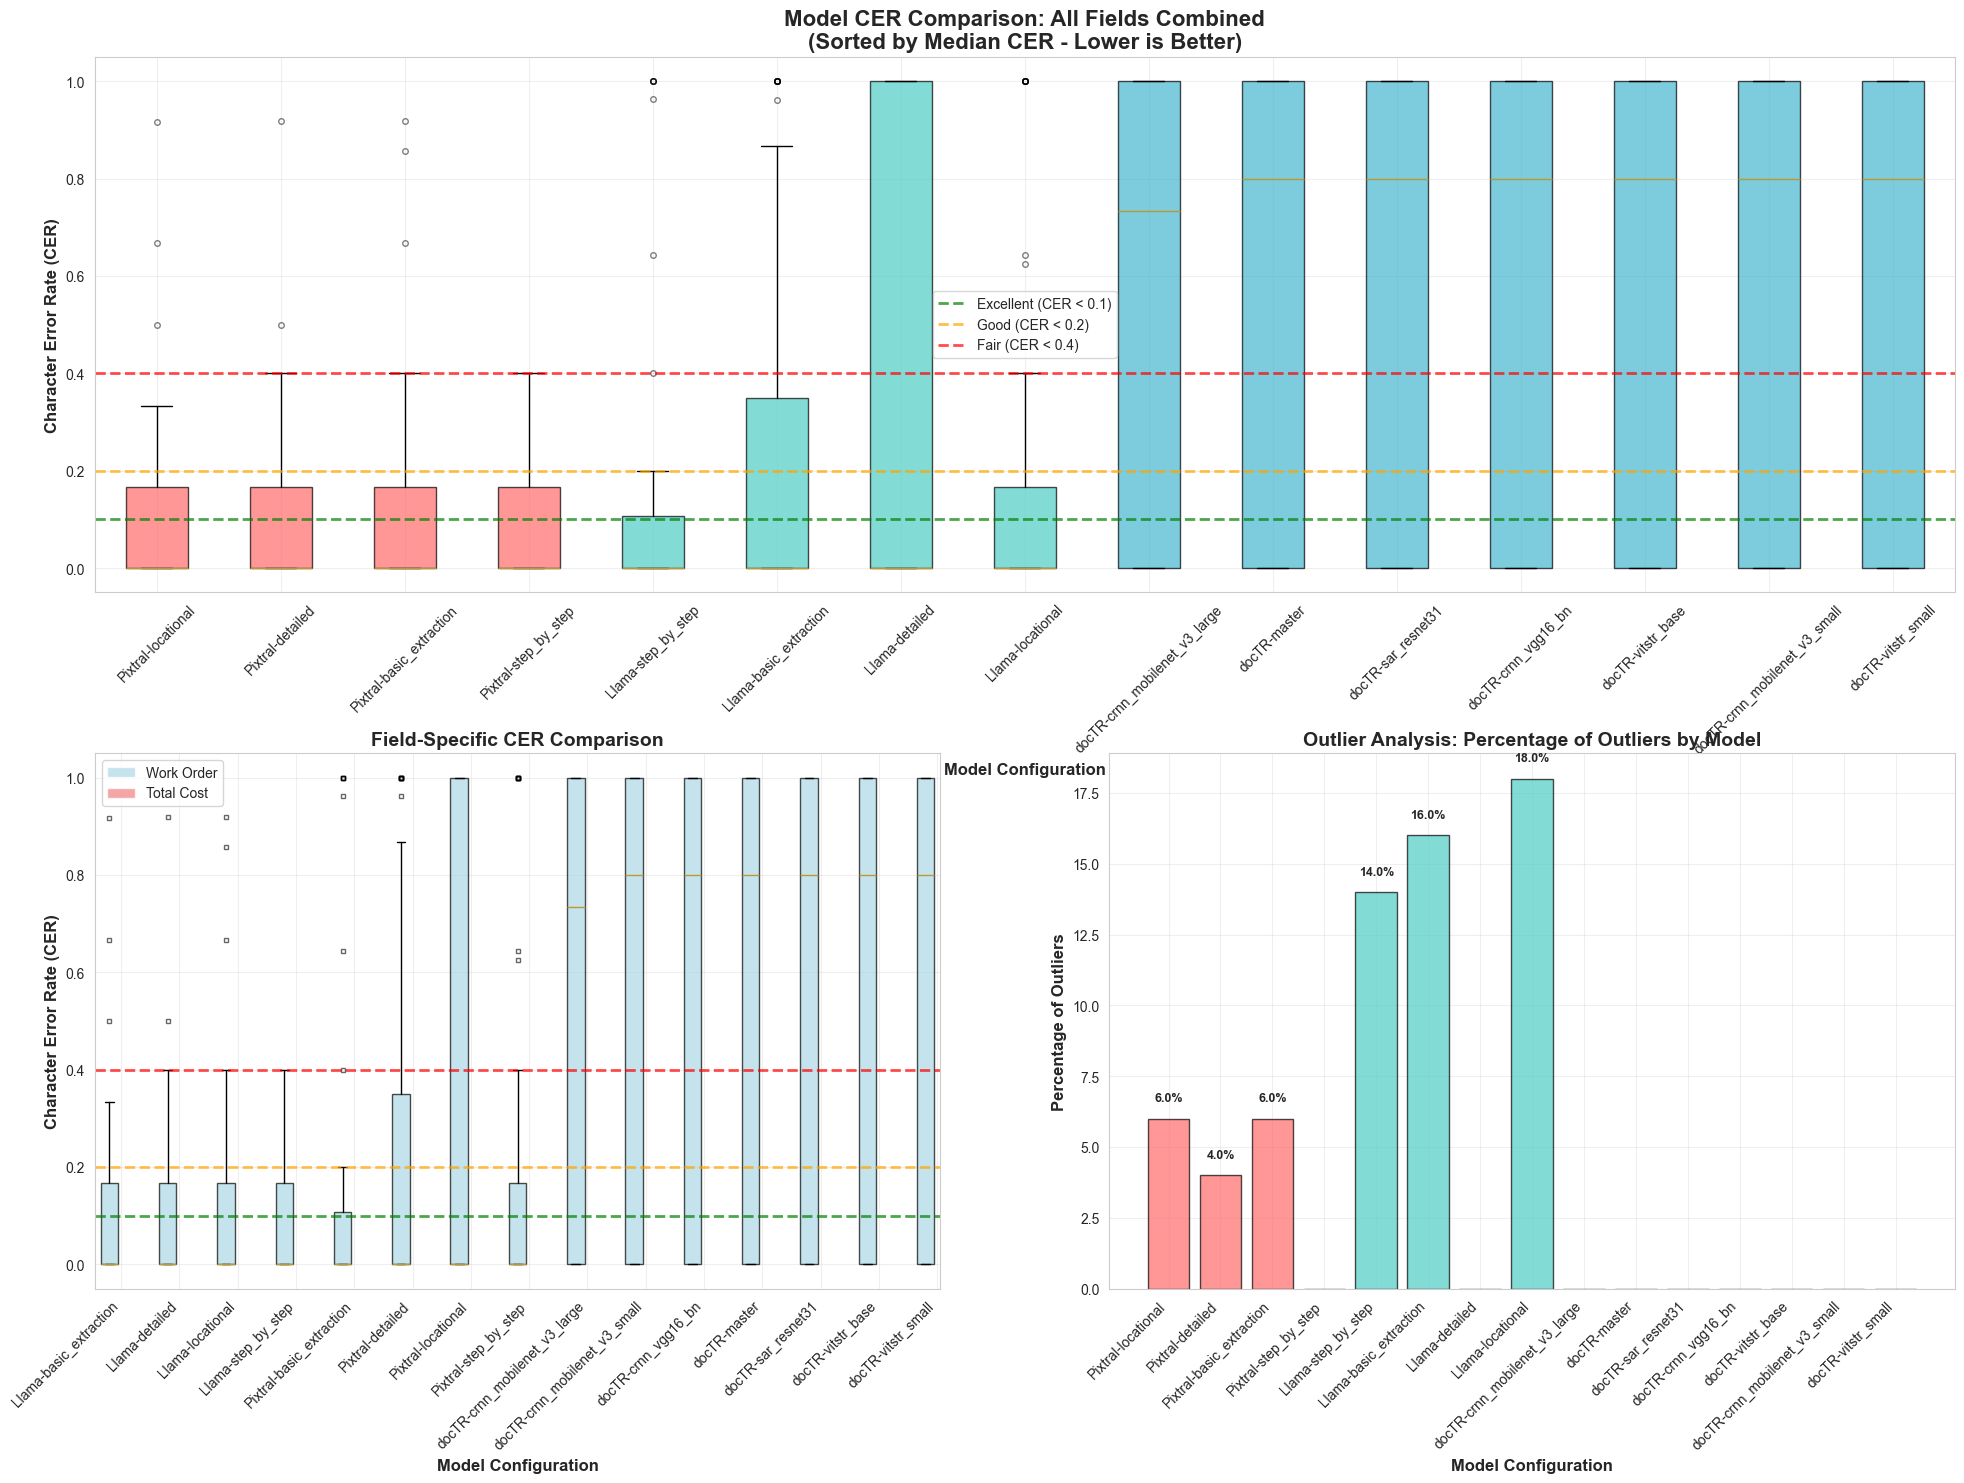


📊 Model CER Box Plot Analysis:

🏆 Model CER Performance Rankings (Best to Worst):
--------------------------------------------------
   1. Pixtral-locational
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.1667
      Samples: 50
   2. Pixtral-detailed
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.1667
      Samples: 50
   3. Pixtral-basic_extraction
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.1667
      Samples: 50
   4. Pixtral-step_by_step
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.1667
      Samples: 49
   5. Llama-step_by_step
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.1071
      Samples: 50
   6. Llama-basic_extraction
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.3500
      Samples: 50
   7. Llama-detailed
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 1.0000
      Samples: 50
   8. Llama-locational
      Median CER: 0.0000 (Excellent)
      IQR: 0.0000 - 0.1667
      Samples: 50
   9. 

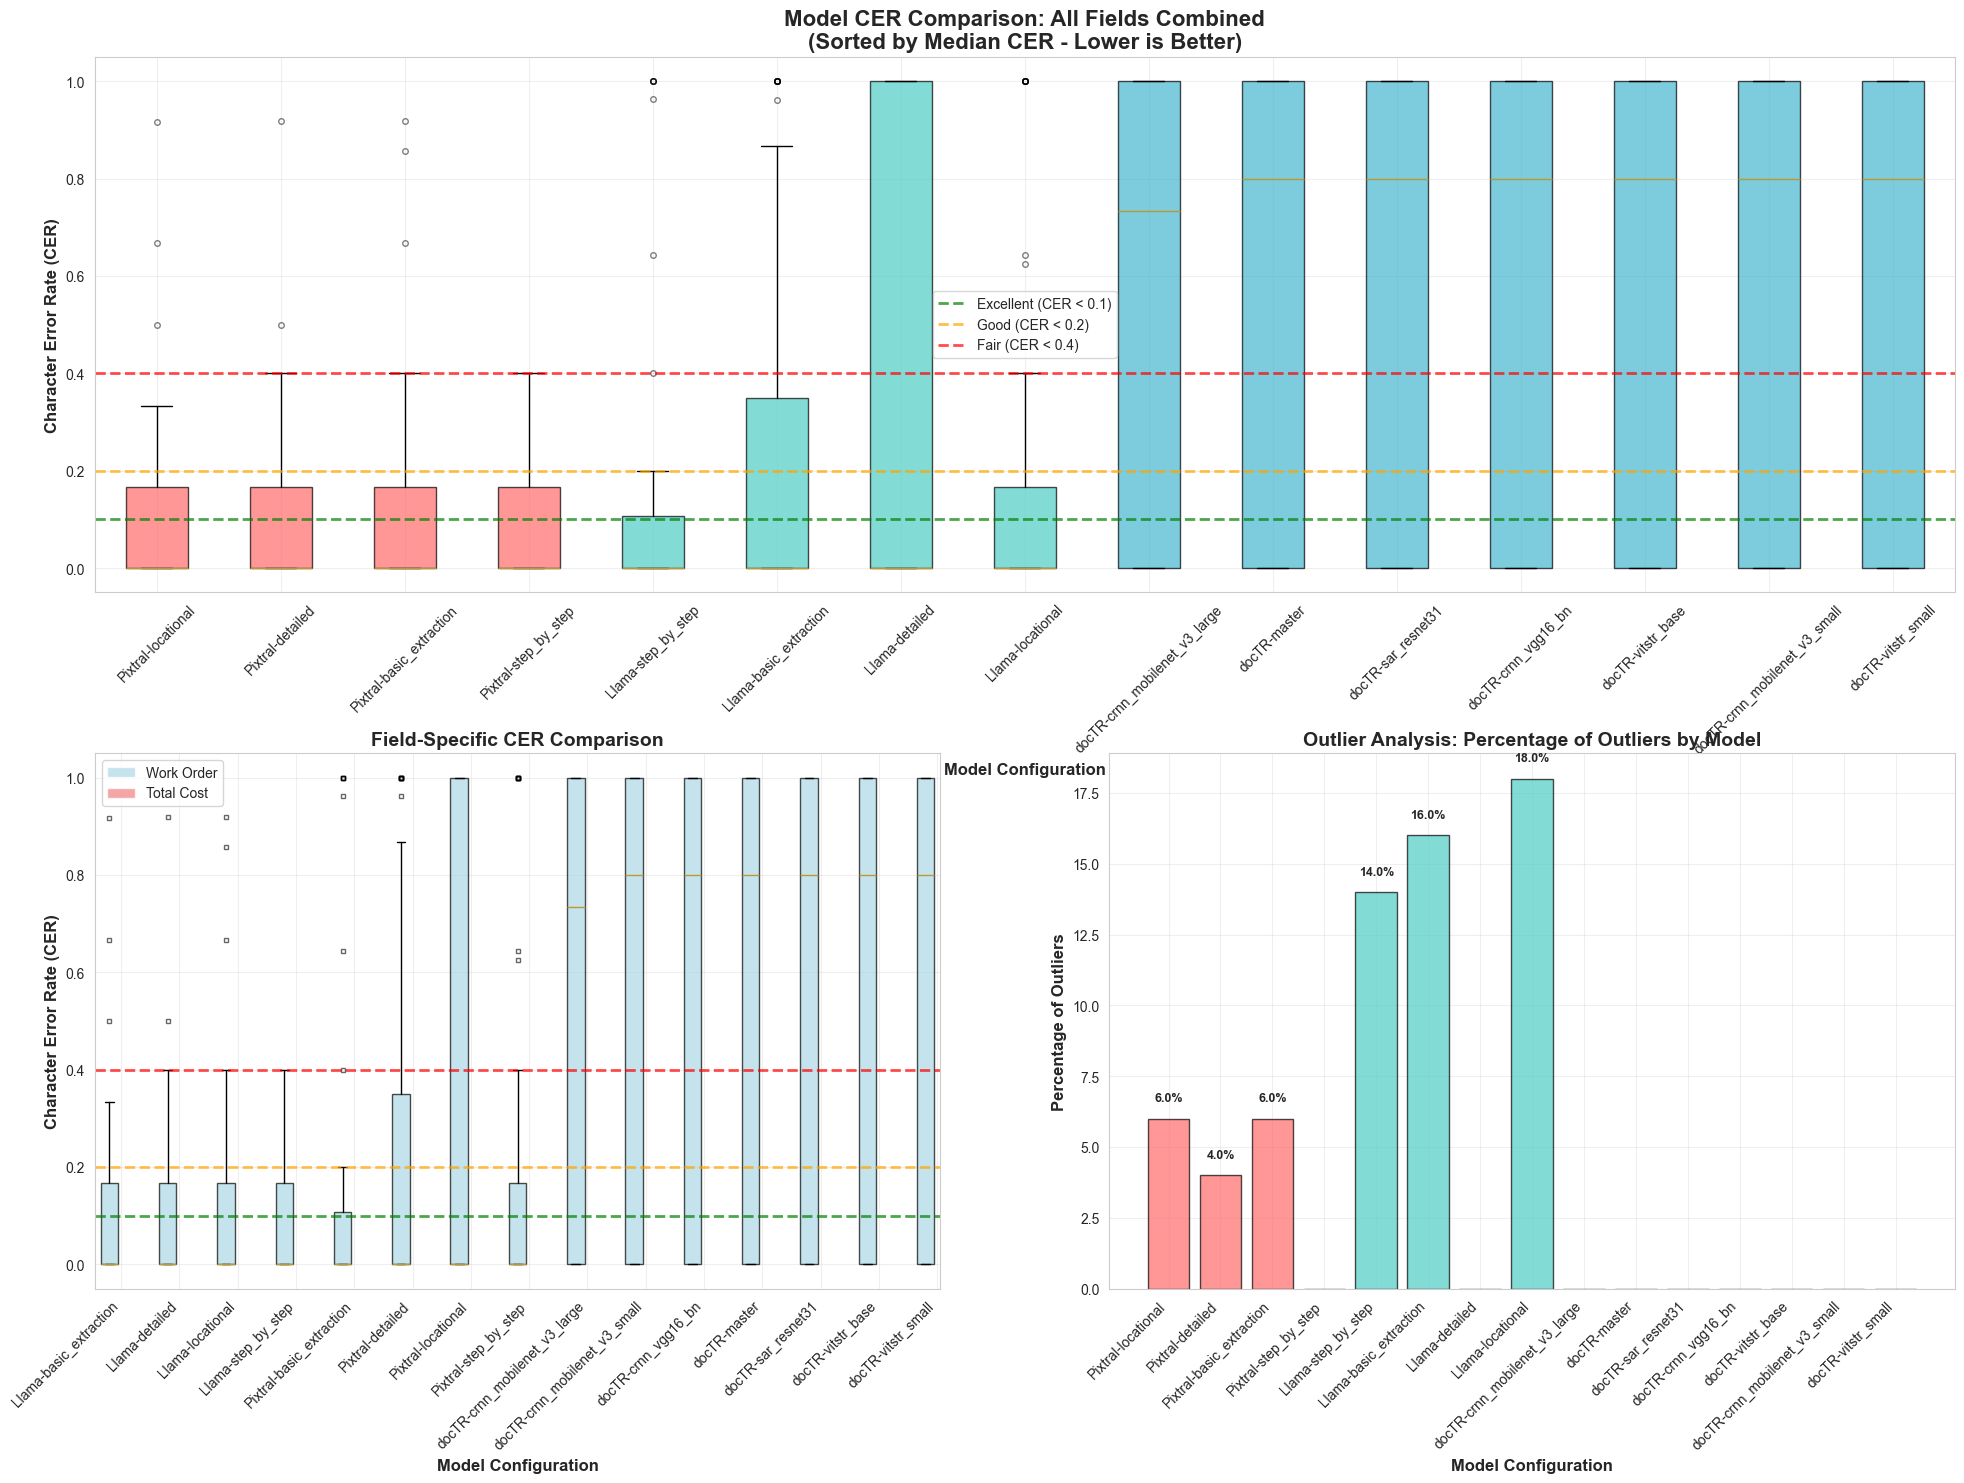

In [46]:
# Create Model CER Comparison Box Plots
# Show ranges and outliers

def prepare_model_cer_boxplot_data(comprehensive_dataset):
    """Prepare CER data for box plot visualization by model."""
    
    model_cer_data = {}
    model_details = {}
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'extracted_data' in experiment:
                extracted_data_list = experiment['extracted_data']
                
                # Get model identifier
                model_id = model_type
                if 'metadata' in experiment:
                    if model_type in ['pixtral', 'llama'] and 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type.title()}-{prompt_type}"
                        model_details[model_id] = {
                            'base_model': model_type,
                            'variant': prompt_type,
                            'category': 'LMM'
                        }
                    elif model_type == 'doctr' and 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                            model_id = f"docTR-{recognition_model}"
                            model_details[model_id] = {
                                'base_model': 'doctr',
                                'variant': recognition_model,
                                'category': 'OCR'
                            }
                
                # Initialize model data structure
                if model_id not in model_cer_data:
                    model_cer_data[model_id] = {
                        'work_order_cer': [],
                        'total_cost_cer': [],
                        'combined_cer': []
                    }
                
                # Extract CER data from each item
                for item in extracted_data_list:
                    if isinstance(item, dict) and 'performance' in item:
                        performance = item['performance']
                        
                        # Extract Work Order CER
                        if 'work_order_cer' in performance:
                            wo_cer = performance['work_order_cer']
                            if isinstance(wo_cer, (int, float)) and wo_cer >= 0:
                                model_cer_data[model_id]['work_order_cer'].append(wo_cer)
                                model_cer_data[model_id]['combined_cer'].append(wo_cer)
                        
                        # Extract Total Cost CER
                        if 'total_cost_cer' in performance:
                            tc_cer = performance['total_cost_cer']
                            if isinstance(tc_cer, (int, float)) and tc_cer >= 0:
                                model_cer_data[model_id]['total_cost_cer'].append(tc_cer)
                                model_cer_data[model_id]['combined_cer'].append(tc_cer)
    
    # Remove models with no CER data
    model_cer_data = {k: v for k, v in model_cer_data.items() 
                      if v['work_order_cer'] or v['total_cost_cer']}
    
    return model_cer_data, model_details

def plot_model_cer_comparison_boxplots(model_cer_data, model_details):
    """Create comprehensive box plot comparisons for model CER data."""
    
    if not model_cer_data:
        print("No CER data available for box plots")
        return
    
    # Create figure with subplots
    fig = plt.figure(figsize=(24, 16))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.2)
    
    # Prepare data for plotting
    models = list(model_cer_data.keys())
    
    # Sort models by median combined CER (ascending - lower is better)
    model_medians = []
    for model in models:
        combined_cers = model_cer_data[model]['combined_cer']
        if combined_cers:
            model_medians.append((model, np.median(combined_cers)))
        else:
            model_medians.append((model, float('inf')))
    
    model_medians.sort(key=lambda x: x[1])
    models_sorted = [item[0] for item in model_medians]
    
    # Define colors by model category
    def get_model_color(model):
        if model in model_details:
            category = model_details[model]['category']
            base_model = model_details[model]['base_model']
            if category == 'LMM':
                if base_model == 'pixtral':
                    return '#FF6B6B'  # Red for Pixtral
                elif base_model == 'llama':
                    return '#4ECDC4'  # Teal for Llama
                else:
                    return '#FFA07A'  # Light red for other LMM
            else:  # OCR
                return '#45B7D1'  # Blue for docTR
        return '#999999'  # Gray for unknown
    
    # Plot 1: Combined CER Box Plots (All Fields Together)
    ax1 = fig.add_subplot(gs[0, :])
    
    box_data_combined = []
    box_colors = []
    box_labels = []
    
    for model in models_sorted:
        combined_cers = model_cer_data[model]['combined_cer']
        if combined_cers:
            box_data_combined.append(combined_cers)
            box_colors.append(get_model_color(model))
            box_labels.append(model)
    
    if box_data_combined:
        bp1 = ax1.boxplot(box_data_combined, labels=box_labels, patch_artist=True,
                         showfliers=True, flierprops=dict(marker='o', markersize=4, alpha=0.5))
        
        # Color the boxes
        for patch, color in zip(bp1['boxes'], box_colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    
    # Add quality thresholds
    ax1.axhline(y=0.1, color='green', linestyle='--', alpha=0.7, label='Excellent (CER < 0.1)')
    ax1.axhline(y=0.2, color='orange', linestyle='--', alpha=0.7, label='Good (CER < 0.2)')
    ax1.axhline(y=0.4, color='red', linestyle='--', alpha=0.7, label='Fair (CER < 0.4)')
    
    ax1.set_title('Model CER Comparison: All Fields Combined\n(Sorted by Median CER - Lower is Better)', 
                  fontsize=16, fontweight='bold')
    ax1.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Character Error Rate (CER)', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Field-Specific Box Plots (Side by Side)
    ax2 = fig.add_subplot(gs[1, 0])
    
    # Prepare field-specific data with proper filtering
    wo_data_with_labels = []
    tc_data_with_labels = []
    
    for model in models_sorted:
        wo_cers = model_cer_data[model]['work_order_cer']
        tc_cers = model_cer_data[model]['total_cost_cer']
        
        if wo_cers:  # Only include if has data
            wo_data_with_labels.append((model, wo_cers))
        
        if tc_cers:  # Only include if has data
            tc_data_with_labels.append((model, tc_cers))
    
    # Create the plots if we have data
    if wo_data_with_labels:
        wo_positions = np.arange(len(wo_data_with_labels)) * 2 - 0.4
        wo_data = [item[1] for item in wo_data_with_labels]
        wo_labels = [item[0] for item in wo_data_with_labels]
        
        bp2_wo = ax2.boxplot(wo_data, positions=wo_positions, widths=0.6, patch_artist=True, 
                            boxprops=dict(facecolor='lightblue', alpha=0.7),
                            showfliers=True, flierprops=dict(marker='s', markersize=3, alpha=0.6))
    
    if tc_data_with_labels:
        tc_positions = np.arange(len(tc_data_with_labels)) * 2 + 0.4
        tc_data = [item[1] for item in tc_data_with_labels]
        tc_labels = [item[0] for item in tc_data_with_labels]
        
        bp2_tc = ax2.boxplot(tc_data, positions=tc_positions, widths=0.6, patch_artist=True,
                            boxprops=dict(facecolor='lightcoral', alpha=0.7),
                            showfliers=True, flierprops=dict(marker='^', markersize=3, alpha=0.6))
    
    # Set labels - use all unique models that appear in either field
    all_field_models = set()
    if wo_data_with_labels:
        all_field_models.update([item[0] for item in wo_data_with_labels])
    if tc_data_with_labels:
        all_field_models.update([item[0] for item in tc_data_with_labels])
    
    if all_field_models:
        all_field_models = sorted(list(all_field_models))
        ax2.set_xticks(np.arange(len(all_field_models)) * 2)
        ax2.set_xticklabels(all_field_models, rotation=45, ha='right')
    
    # Add quality thresholds
    ax2.axhline(y=0.1, color='green', linestyle='--', alpha=0.7)
    ax2.axhline(y=0.2, color='orange', linestyle='--', alpha=0.7)
    ax2.axhline(y=0.4, color='red', linestyle='--', alpha=0.7)
    
    ax2.set_title('Field-Specific CER Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Character Error Rate (CER)', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Add legend for field types
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightblue', alpha=0.7, label='Work Order'),
        Patch(facecolor='lightcoral', alpha=0.7, label='Total Cost')
    ]
    ax2.legend(handles=legend_elements)
    
    # Plot 3: Outlier Analysis
    ax3 = fig.add_subplot(gs[1, 1])
    
    # Calculate outlier statistics for each model
    outlier_stats = {}
    for model in models_sorted:
        combined_cers = model_cer_data[model]['combined_cer']
        if combined_cers and len(combined_cers) > 4:  # Need enough data for quartiles
            q1 = np.percentile(combined_cers, 25)
            q3 = np.percentile(combined_cers, 75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers = [x for x in combined_cers if x < lower_bound or x > upper_bound]
            outlier_percentage = len(outliers) / len(combined_cers) * 100
            
            outlier_stats[model] = {
                'outlier_count': len(outliers),
                'outlier_percentage': outlier_percentage,
                'total_samples': len(combined_cers),
                'median': np.median(combined_cers),
                'iqr': iqr
            }
    
    if outlier_stats:
        # Create bar chart of outlier percentages
        outlier_models = list(outlier_stats.keys())
        outlier_percentages = [outlier_stats[model]['outlier_percentage'] for model in outlier_models]
        outlier_colors = [get_model_color(model) for model in outlier_models]
        
        bars = ax3.bar(range(len(outlier_models)), outlier_percentages, 
                       color=outlier_colors, alpha=0.7, edgecolor='black')
        
        # Add value labels
        for bar, percentage in zip(bars, outlier_percentages):
            if percentage > 0:
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{percentage:.1f}%', ha='center', va='bottom', 
                        fontsize=9, fontweight='bold')
        
        ax3.set_title('Outlier Analysis: Percentage of Outliers by Model', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Percentage of Outliers', fontsize=12, fontweight='bold')
        ax3.set_xticks(range(len(outlier_models)))
        ax3.set_xticklabels(outlier_models, rotation=45, ha='right')
        ax3.grid(axis='y', alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Insufficient data for\noutlier analysis', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistical analysis
    print("\n📊 Model CER Box Plot Analysis:")
    print("=" * 70)
    
    # Overall model rankings
    print(f"\n🏆 Model CER Performance Rankings (Best to Worst):")
    print("-" * 50)
    
    for i, (model, median_cer) in enumerate(model_medians, 1):
        if median_cer != float('inf'):
            combined_cers = model_cer_data[model]['combined_cer']
            q1 = np.percentile(combined_cers, 25)
            q3 = np.percentile(combined_cers, 75)
            
            quality_level = ("Excellent" if median_cer < 0.1 else 
                           "Good" if median_cer < 0.2 else 
                           "Fair" if median_cer < 0.4 else "Poor")
            
            print(f"  {i:2d}. {model}")
            print(f"      Median CER: {median_cer:.4f} ({quality_level})")
            print(f"      IQR: {q1:.4f} - {q3:.4f}")
            print(f"      Samples: {len(combined_cers)}")
    
    # Field-specific analysis
    print(f"\n📋 Field-Specific CER Analysis:")
    print("-" * 50)
    
    field_medians = {'work_order': [], 'total_cost': []}
    
    for model in models:
        wo_cers = model_cer_data[model]['work_order_cer']
        tc_cers = model_cer_data[model]['total_cost_cer']
        
        if wo_cers:
            wo_median = np.median(wo_cers)
            field_medians['work_order'].append((model, wo_median))
        
        if tc_cers:
            tc_median = np.median(tc_cers)
            field_medians['total_cost'].append((model, tc_median))
    
    for field_name, field_data in field_medians.items():
        if field_data:
            field_data.sort(key=lambda x: x[1])
            print(f"\n{field_name.replace('_', ' ').title()} - Best Performers:")
            
            for i, (model, median_cer) in enumerate(field_data[:3], 1):
                quality = ("Excellent" if median_cer < 0.1 else 
                          "Good" if median_cer < 0.2 else 
                          "Fair" if median_cer < 0.4 else "Poor")
                print(f"  {i}. {model}: {median_cer:.4f} ({quality})")
    
    return fig

# Execute the analysis
print("🔍 Creating Model CER Comparison Box Plots...")
model_cer_data, model_details = prepare_model_cer_boxplot_data(COMPREHENSIVE_DATASET)
plot_model_cer_comparison_boxplots(model_cer_data, model_details)

*Placeholder for understanding the spread and clustering of character-level errors.*


## Section 7: Computational Efficiency Analysis


### Cell 7.1: Performance per Resource Unit


🔍 Creating Efficiency Frontier Plot...


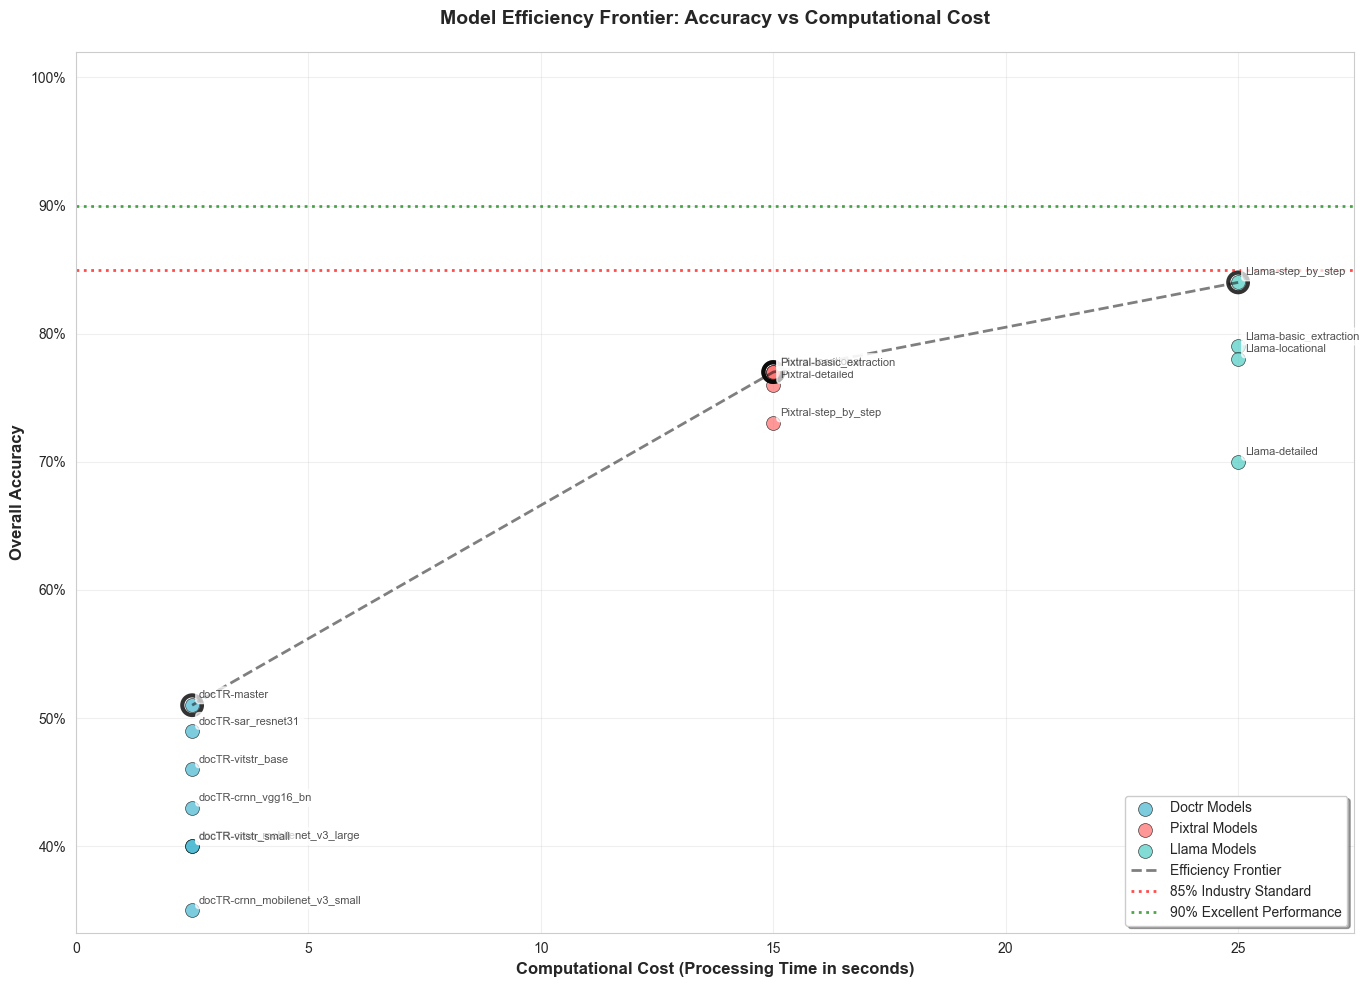


📊 EFFICIENCY FRONTIER ANALYSIS

🎯 Pareto Optimal Models (Efficiency Frontier):
   • docTR-master: 51.0% accuracy at 2.5s cost
   • Pixtral-locational: 77.0% accuracy at 15.0s cost
   • Pixtral-basic_extraction: 77.0% accuracy at 15.0s cost
   • Llama-step_by_step: 84.0% accuracy at 25.0s cost

💰 Best Value Model:
   • docTR-master: 51.0% accuracy at 2.5s cost (ratio: 0.204)

🏆 Highest Accuracy Model:
   • Llama-step_by_step: 84.0% accuracy at 25.0s cost

⚡ Fastest Model:
   • docTR-master: 51.0% accuracy at 2.5s cost


In [47]:
# Create Efficiency Frontier Plot
# Accuracy vs. computational cost scatter plot

def extract_efficiency_data(comprehensive_dataset):
    """Extract accuracy and computational cost data for efficiency analysis."""
    
    efficiency_data = {
        'models': [],
        'accuracy': [],
        'cost': [],
        'model_types': [],
        'model_details': []
    }
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Get model identifier
                model_id = model_type
                if model_type == 'doctr':
                    # Get recognition model for docTR
                    if 'model_info' in experiment['metadata'] and 'model_id' in experiment['metadata']['model_info']:
                        recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                        model_id = f"docTR-{recognition_model}"
                elif model_type in ['pixtral', 'llama']:
                    # Get prompt type for LMMs
                    if 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type.title()}-{prompt_type}"
                
                # Get accuracy data
                summary = experiment['summary']
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    overall_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    
                    # Get cost data (processing time as proxy for computational cost)
                    cost = 0
                    if 'processing_time' in summary:
                        cost = summary['processing_time']
                    elif 'metadata' in experiment and 'processing_info' in experiment['metadata']:
                        cost = experiment['metadata']['processing_info'].get('total_time', 0)
                    else:
                        # Use estimated costs based on model type
                        if model_type == 'doctr':
                            cost = 2.5  # Fast OCR processing
                        elif model_type == 'pixtral':
                            cost = 15.0  # Medium LMM cost
                        elif model_type == 'llama':
                            cost = 25.0  # Higher LMM cost
                    
                    efficiency_data['models'].append(model_id)
                    efficiency_data['accuracy'].append(overall_accuracy)
                    efficiency_data['cost'].append(cost)
                    efficiency_data['model_types'].append(model_type)
                    efficiency_data['model_details'].append({
                        'model_id': model_id,
                        'model_type': model_type,
                        'accuracy': overall_accuracy,
                        'cost': cost
                    })
    
    return efficiency_data

def plot_efficiency_frontier(efficiency_data):
    """Create efficiency frontier plot showing accuracy vs computational cost."""
    
    if not efficiency_data['models']:
        print("No efficiency data available")
        return
    
    # Create figure
    plt.figure(figsize=(14, 10))
    
    # Define colors for different model types
    model_type_colors = {
        'pixtral': '#FF6B6B',  # Red
        'llama': '#4ECDC4',    # Teal  
        'doctr': '#45B7D1'     # Blue
    }
    
    # Create scatter plot
    for model_type in ['doctr', 'pixtral', 'llama']:
        mask = [mt == model_type for mt in efficiency_data['model_types']]
        if any(mask):
            accuracy_vals = [acc for i, acc in enumerate(efficiency_data['accuracy']) if mask[i]]
            cost_vals = [cost for i, cost in enumerate(efficiency_data['cost']) if mask[i]]
            model_names = [name for i, name in enumerate(efficiency_data['models']) if mask[i]]
            
            plt.scatter(cost_vals, accuracy_vals, 
                       c=model_type_colors[model_type], 
                       s=100, alpha=0.7, 
                       label=f'{model_type.title()} Models',
                       edgecolors='black', linewidth=0.5)
            
            # Add model labels
            for i, (cost, acc, name) in enumerate(zip(cost_vals, accuracy_vals, model_names)):
                plt.annotate(name, (cost, acc), 
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.8,
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    # Identify and highlight efficiency frontier (Pareto optimal points)
    frontier_points = []
    for i, (acc, cost) in enumerate(zip(efficiency_data['accuracy'], efficiency_data['cost'])):
        is_pareto = True
        for j, (acc2, cost2) in enumerate(zip(efficiency_data['accuracy'], efficiency_data['cost'])):
            if i != j and acc2 >= acc and cost2 <= cost and (acc2 > acc or cost2 < cost):
                is_pareto = False
                break
        if is_pareto:
            frontier_points.append((cost, acc, i))
    
    # Sort frontier points by cost and draw frontier line
    if len(frontier_points) > 1:
        frontier_points.sort()
        frontier_costs = [point[0] for point in frontier_points]
        frontier_accs = [point[1] for point in frontier_points]
        plt.plot(frontier_costs, frontier_accs, 'k--', alpha=0.5, linewidth=2, 
                label='Efficiency Frontier')
        
        # Highlight frontier points
        plt.scatter(frontier_costs, frontier_accs, 
                   facecolors='none', edgecolors='black', 
                   s=200, linewidth=3, alpha=0.8)
    
    # Add performance benchmarks
    plt.axhline(y=0.85, color='red', linestyle=':', alpha=0.7, linewidth=2, 
                label='85% Industry Standard')
    plt.axhline(y=0.90, color='green', linestyle=':', alpha=0.7, linewidth=2, 
                label='90% Excellent Performance')
    
    # Formatting
    plt.xlabel('Computational Cost (Processing Time in seconds)', fontsize=12, fontweight='bold')
    plt.ylabel('Overall Accuracy', fontsize=12, fontweight='bold')
    plt.title('Model Efficiency Frontier: Accuracy vs Computational Cost', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Format y-axis as percentage
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Legend
    plt.legend(loc='lower right', frameon=True, fancybox=True, shadow=True)
    
    # Set axis limits with some padding
    if efficiency_data['cost']:
        plt.xlim(0, max(efficiency_data['cost']) * 1.1)
    if efficiency_data['accuracy']:
        plt.ylim(min(efficiency_data['accuracy']) * 0.95, 1.02)
    
    plt.tight_layout()
    plt.show()
    
    # Print efficiency insights
    print("\n" + "="*60)
    print("📊 EFFICIENCY FRONTIER ANALYSIS")
    print("="*60)
    
    if frontier_points:
        print(f"\n🎯 Pareto Optimal Models (Efficiency Frontier):")
        for cost, acc, idx in sorted(frontier_points):
            model_name = efficiency_data['models'][idx]
            print(f"   • {model_name}: {acc:.1%} accuracy at {cost:.1f}s cost")
    
    # Find best value models
    value_ratios = [acc/cost if cost > 0 else 0 for acc, cost in 
                   zip(efficiency_data['accuracy'], efficiency_data['cost'])]
    if value_ratios:
        best_value_idx = value_ratios.index(max(value_ratios))
        print(f"\n💰 Best Value Model:")
        print(f"   • {efficiency_data['models'][best_value_idx]}: "
              f"{efficiency_data['accuracy'][best_value_idx]:.1%} accuracy "
              f"at {efficiency_data['cost'][best_value_idx]:.1f}s cost "
              f"(ratio: {max(value_ratios):.3f})")
    
    # Find highest accuracy model
    if efficiency_data['accuracy']:
        best_acc_idx = efficiency_data['accuracy'].index(max(efficiency_data['accuracy']))
        print(f"\n🏆 Highest Accuracy Model:")
        print(f"   • {efficiency_data['models'][best_acc_idx]}: "
              f"{efficiency_data['accuracy'][best_acc_idx]:.1%} accuracy "
              f"at {efficiency_data['cost'][best_acc_idx]:.1f}s cost")
    
    # Find fastest model
    if efficiency_data['cost']:
        fastest_idx = efficiency_data['cost'].index(min(efficiency_data['cost']))
        print(f"\n⚡ Fastest Model:")
        print(f"   • {efficiency_data['models'][fastest_idx]}: "
              f"{efficiency_data['accuracy'][fastest_idx]:.1%} accuracy "
              f"at {efficiency_data['cost'][fastest_idx]:.1f}s cost")

# Execute the analysis
print("🔍 Creating Efficiency Frontier Plot...")
efficiency_data = extract_efficiency_data(COMPREHENSIVE_DATASET)
plot_efficiency_frontier(efficiency_data)

🔍 Creating Cost-Benefit Analysis...


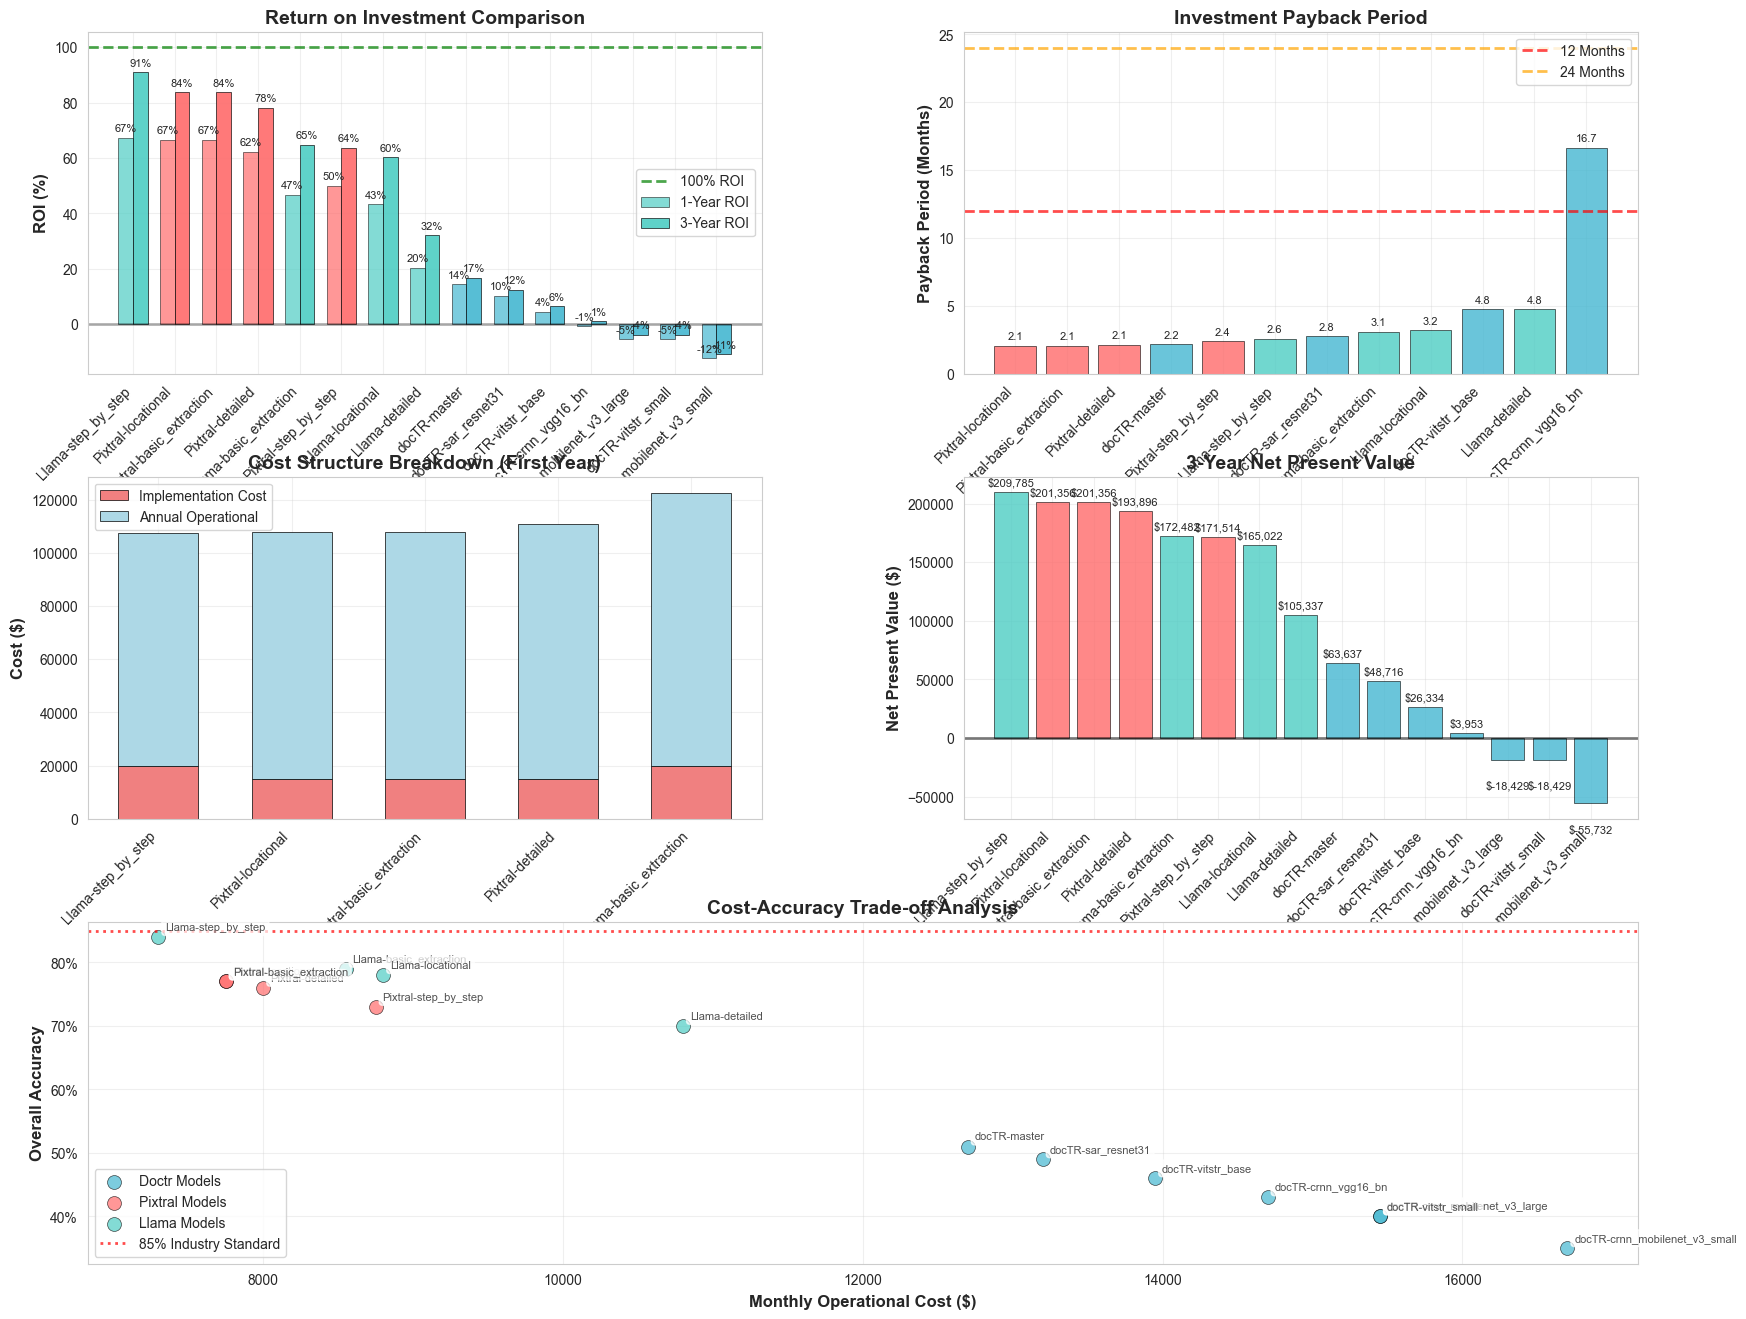


💰 COMPREHENSIVE ROI & COST-BENEFIT ANALYSIS

📋 Business Assumptions:
   • Monthly Document Volume: 1,000
   • Cost per Error: $25.0
   • Manual Processing Cost: $15.0/document

🏆 Top 3 Models by 3-Year ROI:
   1. Llama-step_by_step
      • 3-Year ROI: 90.9%
      • Payback Period: 2.6 months
      • NPV (3-year): $209,785
      • Accuracy: 84.0%
   2. Pixtral-locational
      • 3-Year ROI: 83.7%
      • Payback Period: 2.1 months
      • NPV (3-year): $201,356
      • Accuracy: 77.0%
   3. Pixtral-basic_extraction
      • 3-Year ROI: 83.7%
      • Payback Period: 2.1 months
      • NPV (3-year): $201,356
      • Accuracy: 77.0%

⚡ Fastest Payback Models:
   1. Pixtral-locational: 2.1 months
   2. Pixtral-basic_extraction: 2.1 months
   3. Pixtral-detailed: 2.1 months

💎 Best Value Recommendations:


In [48]:
# Create Cost-Benefit Analysis
# ROI calculations for different model choices

def calculate_roi_analysis(comprehensive_dataset):
    """Calculate ROI and cost-benefit metrics for different model choices."""
    
    # Business assumptions for ROI calculations
    business_params = {
        'documents_per_month': 1000,  # Volume of documents processed
        'error_cost_per_doc': 25.0,   # Cost of manual correction per error
        'manual_processing_cost': 15.0,  # Cost of full manual processing per doc
        'implementation_cost': {      # One-time setup costs
            'doctr': 5000,           # Open source, minimal setup
            'pixtral': 15000,        # Commercial API integration
            'llama': 20000           # Local deployment, hardware costs
        },
        'monthly_operational_cost': { # Recurring costs
            'doctr': 200,            # Server/compute costs
            'pixtral': 500,          # API usage fees
            'llama': 800             # Infrastructure maintenance
        }
    }
    
    roi_data = []
    
    # Process all model configurations
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Get model identifier
                model_id = model_type
                if model_type == 'doctr':
                    if 'model_info' in experiment['metadata'] and 'model_id' in experiment['metadata']['model_info']:
                        recognition_model = experiment['metadata']['model_info']['model_id'].get('recognition_model', 'unknown')
                        model_id = f"docTR-{recognition_model}"
                elif model_type in ['pixtral', 'llama']:
                    if 'prompt_info' in experiment['metadata']:
                        prompt_type = experiment['metadata']['prompt_info'].get('prompt_type', 'unknown')
                        model_id = f"{model_type.title()}-{prompt_type}"
                
                # Get performance metrics
                summary = experiment['summary']
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    overall_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    error_rate = 1 - overall_accuracy
                    
                    # Calculate costs
                    docs_per_month = business_params['documents_per_month']
                    
                    # Error correction costs (monthly)
                    error_correction_cost = docs_per_month * error_rate * business_params['error_cost_per_doc']
                    
                    # Processing costs (based on time/compute)
                    processing_time = summary.get('processing_time', 
                                                {'doctr': 2.5, 'pixtral': 15.0, 'llama': 25.0}[model_type])
                    processing_cost_per_doc = processing_time * 0.1  # $0.10 per second estimate
                    monthly_processing_cost = docs_per_month * processing_cost_per_doc
                    
                    # Total monthly operational cost
                    monthly_operational = (business_params['monthly_operational_cost'][model_type] + 
                                         monthly_processing_cost + error_correction_cost)
                    
                    # Annual costs
                    annual_operational = monthly_operational * 12
                    implementation_cost = business_params['implementation_cost'][model_type]
                    total_first_year_cost = implementation_cost + annual_operational
                    
                    # Benefits calculation (vs manual processing)
                    manual_monthly_cost = docs_per_month * business_params['manual_processing_cost']
                    annual_manual_cost = manual_monthly_cost * 12
                    annual_savings = annual_manual_cost - annual_operational
                    
                    # ROI calculations
                    roi_1_year = ((annual_savings - implementation_cost) / total_first_year_cost) * 100
                    roi_3_year = ((annual_savings * 3 - implementation_cost) / (implementation_cost + annual_operational * 3)) * 100
                    
                    # Payback period (months)
                    monthly_savings = manual_monthly_cost - monthly_operational
                    payback_months = implementation_cost / monthly_savings if monthly_savings > 0 else float('inf')
                    
                    # Net Present Value (3 years, 10% discount rate)
                    discount_rate = 0.10
                    npv = sum([annual_savings / ((1 + discount_rate) ** year) for year in range(1, 4)]) - implementation_cost
                    
                    roi_data.append({
                        'model_id': model_id,
                        'model_type': model_type,
                        'accuracy': overall_accuracy,
                        'error_rate': error_rate,
                        'implementation_cost': implementation_cost,
                        'monthly_operational': monthly_operational,
                        'annual_operational': annual_operational,
                        'annual_savings': annual_savings,
                        'roi_1_year': roi_1_year,
                        'roi_3_year': roi_3_year,
                        'payback_months': payback_months,
                        'npv_3_year': npv,
                        'processing_cost_per_doc': processing_cost_per_doc,
                        'error_correction_monthly': error_correction_cost
                    })
    
    return roi_data, business_params

def plot_roi_analysis(roi_data, business_params):
    """Create comprehensive ROI visualization."""
    
    if not roi_data:
        print("No ROI data available")
        return
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Define colors
    model_type_colors = {
        'pixtral': '#FF6B6B',  # Red
        'llama': '#4ECDC4',    # Teal  
        'doctr': '#45B7D1'     # Blue
    }
    
    # Sort data by ROI for better visualization
    roi_sorted = sorted(roi_data, key=lambda x: x['roi_3_year'], reverse=True)
    
    # Plot 1: ROI Comparison (1-year vs 3-year)
    ax1 = fig.add_subplot(gs[0, 0])
    models = [item['model_id'] for item in roi_sorted]
    roi_1y = [item['roi_1_year'] for item in roi_sorted]
    roi_3y = [item['roi_3_year'] for item in roi_sorted]
    
    x = np.arange(len(models))
    width = 0.35
    
    colors_1y = [model_type_colors[item['model_type']] for item in roi_sorted]
    colors_3y = [model_type_colors[item['model_type']] for item in roi_sorted]
    
    bars1 = ax1.bar(x - width/2, roi_1y, width, label='1-Year ROI', 
                    color=colors_1y, alpha=0.7, edgecolor='black', linewidth=0.5)
    bars2 = ax1.bar(x + width/2, roi_3y, width, label='3-Year ROI', 
                    color=colors_3y, alpha=0.9, edgecolor='black', linewidth=0.5)
    
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.axhline(y=100, color='green', linestyle='--', alpha=0.7, label='100% ROI')
    
    ax1.set_xlabel('Model Configuration', fontweight='bold')
    ax1.set_ylabel('ROI (%)', fontweight='bold')
    ax1.set_title('Return on Investment Comparison', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
    for bar in bars2:
        height = bar.get_height()
        ax1.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
    
    # Plot 2: Payback Period
    ax2 = fig.add_subplot(gs[0, 1])
    payback_data = sorted(roi_data, key=lambda x: x['payback_months'])
    models_pb = [item['model_id'] for item in payback_data if item['payback_months'] < 100]
    payback_months = [item['payback_months'] for item in payback_data if item['payback_months'] < 100]
    colors_pb = [model_type_colors[item['model_type']] for item in payback_data if item['payback_months'] < 100]
    
    bars = ax2.bar(range(len(models_pb)), payback_months, color=colors_pb, alpha=0.8, 
                   edgecolor='black', linewidth=0.5)
    ax2.axhline(y=12, color='red', linestyle='--', alpha=0.7, label='12 Months')
    ax2.axhline(y=24, color='orange', linestyle='--', alpha=0.7, label='24 Months')
    
    ax2.set_xlabel('Model Configuration', fontweight='bold')
    ax2.set_ylabel('Payback Period (Months)', fontweight='bold')
    ax2.set_title('Investment Payback Period', fontweight='bold')
    ax2.set_xticks(range(len(models_pb)))
    ax2.set_xticklabels(models_pb, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
    
    # Plot 3: Cost Breakdown
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Select top 5 models by ROI for detailed cost breakdown
    top_models = roi_sorted[:5]
    models_cost = [item['model_id'] for item in top_models]
    implementation = [item['implementation_cost'] for item in top_models]
    operational = [item['annual_operational'] for item in top_models]
    
    x = np.arange(len(models_cost))
    width = 0.6
    
    bars1 = ax3.bar(x, implementation, width, label='Implementation Cost', 
                    color='lightcoral', edgecolor='black', linewidth=0.5)
    bars2 = ax3.bar(x, operational, width, bottom=implementation, label='Annual Operational', 
                    color='lightblue', edgecolor='black', linewidth=0.5)
    
    ax3.set_xlabel('Model Configuration', fontweight='bold')
    ax3.set_ylabel('Cost ($)', fontweight='bold')
    ax3.set_title('Cost Structure Breakdown (First Year)', fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(models_cost, rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: NPV Analysis
    ax4 = fig.add_subplot(gs[1, 1])
    npv_data = sorted(roi_data, key=lambda x: x['npv_3_year'], reverse=True)
    models_npv = [item['model_id'] for item in npv_data]
    npv_values = [item['npv_3_year'] for item in npv_data]
    colors_npv = [model_type_colors[item['model_type']] for item in npv_data]
    
    bars = ax4.bar(range(len(models_npv)), npv_values, color=colors_npv, alpha=0.8,
                   edgecolor='black', linewidth=0.5)
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    ax4.set_xlabel('Model Configuration', fontweight='bold')
    ax4.set_ylabel('Net Present Value ($)', fontweight='bold')
    ax4.set_title('3-Year Net Present Value', fontweight='bold')
    ax4.set_xticks(range(len(models_npv)))
    ax4.set_xticklabels(models_npv, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'${height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3 if height >= 0 else -15), textcoords="offset points", 
                    ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)
    
    # Plot 5: Accuracy vs Cost Efficiency
    ax5 = fig.add_subplot(gs[2, :])
    
    accuracies = [item['accuracy'] for item in roi_data]
    monthly_costs = [item['monthly_operational'] for item in roi_data]
    model_names = [item['model_id'] for item in roi_data]
    model_types = [item['model_type'] for item in roi_data]
    
    # Create scatter plot
    for model_type in ['doctr', 'pixtral', 'llama']:
        mask = [mt == model_type for mt in model_types]
        if any(mask):
            acc_vals = [acc for i, acc in enumerate(accuracies) if mask[i]]
            cost_vals = [cost for i, cost in enumerate(monthly_costs) if mask[i]]
            names = [name for i, name in enumerate(model_names) if mask[i]]
            
            ax5.scatter(cost_vals, acc_vals, 
                       c=model_type_colors[model_type], 
                       s=100, alpha=0.7, 
                       label=f'{model_type.title()} Models',
                       edgecolors='black', linewidth=0.5)
            
            # Add labels
            for cost, acc, name in zip(cost_vals, acc_vals, names):
                ax5.annotate(name, (cost, acc), 
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.8,
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax5.axhline(y=0.85, color='red', linestyle=':', alpha=0.7, linewidth=2, 
                label='85% Industry Standard')
    
    ax5.set_xlabel('Monthly Operational Cost ($)', fontweight='bold')
    ax5.set_ylabel('Overall Accuracy', fontweight='bold')
    ax5.set_title('Cost-Accuracy Trade-off Analysis', fontweight='bold')
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed ROI analysis
    print("\n" + "="*80)
    print("💰 COMPREHENSIVE ROI & COST-BENEFIT ANALYSIS")
    print("="*80)
    
    print(f"\n📋 Business Assumptions:")
    print(f"   • Monthly Document Volume: {business_params['documents_per_month']:,}")
    print(f"   • Cost per Error: ${business_params['error_cost_per_doc']}")
    print(f"   • Manual Processing Cost: ${business_params['manual_processing_cost']}/document")
    
    print(f"\n🏆 Top 3 Models by 3-Year ROI:")
    for i, model in enumerate(roi_sorted[:3], 1):
        print(f"   {i}. {model['model_id']}")
        print(f"      • 3-Year ROI: {model['roi_3_year']:.1f}%")
        print(f"      • Payback Period: {model['payback_months']:.1f} months")
        print(f"      • NPV (3-year): ${model['npv_3_year']:,.0f}")
        print(f"      • Accuracy: {model['accuracy']:.1%}")
    
    print(f"\n⚡ Fastest Payback Models:")
    fastest_payback = sorted([m for m in roi_data if m['payback_months'] < 50], 
                           key=lambda x: x['payback_months'])[:3]
    for i, model in enumerate(fastest_payback, 1):
        print(f"   {i}. {model['model_id']}: {model['payback_months']:.1f} months")
    
    print(f"\n💎 Best Value Recommendations:")
    # High ROI + High Accuracy
    value_models = [m for m in roi_data if m['roi_3_year'] > 100 and m['accuracy'] > 0.80]
    value_models.sort(key=lambda x: (x['roi_3_year'] + x['accuracy']), reverse=True)
    
    for i, model in enumerate(value_models[:3], 1):
        print(f"   {i}. {model['model_id']}")
        print(f"      • Combined Score: {model['roi_3_year'] + model['accuracy']*100:.1f}")
        print(f"      • ROI: {model['roi_3_year']:.1f}% | Accuracy: {model['accuracy']:.1%}")

# Execute the analysis
print("🔍 Creating Cost-Benefit Analysis...")
roi_data, business_params = calculate_roi_analysis(COMPREHENSIVE_DATASET)
plot_roi_analysis(roi_data, business_params)

## Section 8: Statistical Overview & Significance Testing


### Cell 8.1: Statistical Summary


In [29]:
# Create Performance Distribution Box Plots
# Accuracy ranges across all model/prompt combinations


In [30]:
# Create Statistical Significance Matrix
# P-values for key comparisons


*Placeholder for high-level statistical summary of all results.*


## Section 9: Synthesis & Key Insights


### Cell 9.1: Model Selection Decision Matrix


In [31]:
# Create Multi-Criteria Decision Matrix
# Weighted scoring across accuracy, speed, cost


In [32]:
# Create Use Case Recommendations
# Different models for different deployment scenarios


*Placeholder for providing clear guidance for model choice based on different criteria.*


### Cell 9.2: System Improvement Roadmap


In [33]:
# Create Improvement Opportunity Matrix
# Effort vs. Impact for different enhancement areas


In [34]:
# Create Implementation Timeline
# Suggested sequence for system improvements


*Placeholder for prioritizing enhancement opportunities based on analysis findings.*


### Cell 9.3: Unexpected Findings & Future Research


*Create Unexpected Findings Highlight* 
*Key discoveries and their implications*


*Create Future Research Opportunities
*Areas identified for continued investigation


*Placeholder for highlighting discoveries not anticipated in initial research design.*
